In [1]:
#install.packages("readxl")
#install.packages("dplyr")
#install.packages("stringr")

library(readxl)
library(dplyr)
library(stringr)
library(fdth)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'fdth'

The following objects are masked from 'package:stats':

    sd, var



In [2]:
options(warn=-1)
dataset_sin_limpiar <- read_excel("./LAPAZ3.xlsx")

In [3]:
str(dataset_sin_limpiar)

Classes 'tbl_df', 'tbl' and 'data.frame':	485086 obs. of  25 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ departamento      : chr  "LA PAZ" "LA PAZ" "LA PAZ" "LA PAZ" ...
 $ localidad         : chr  "LA PAZ" "LA PAZ" "LA PAZ" "LA PAZ" ...
 $ EsPrivada         : chr  "N" "N" "N" "N" ...
 $ turno             : chr  "TARDE" "TARDE" "TARDE" "TARDE" ...
 $ curso             : chr  "3 - U Prim" "1 - U Prim" "1 - U Prim" "1 - U Prim" ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Segundo Trimestre" "Segundo Trimestre" "Segundo Trimestre" ...
 $ idalumno          : num  726939 875616 875604 875614 875612 ...
 $ Documento         : num  53360157 55445296 55243932 54712732 55445366 ...
 $ anioLectivo       : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "LENGUA" "ARTES VISUALES" "ARTES VISUALES" "ARTES VISUALES" ...
 $ nota              : chr  "6" "9" "9" "7" ...
 $ observaciones     : chr  NA NA NA NA ...
 $ idSubOrganizacion : num  41 41 41 4

In [4]:
ftable(dataset_sin_limpiar$ModEnsenaza, dataset_sin_limpiar$Modalidad)

                       Inicial   NULL Primaria Secundaria Secundaria 3 años
                                                                           
Adultos                      0      0        0      10685             14267
Agrotécnica                  0      0        0      11553                 0
Comun                       34     30   174067     218517              4752
Ed.Especial                  0      0       35          0                 0
Escuelas NINA                0      0     6155          0                 0
Formacion Profesional        0     30        0          0                 0
NULL                         0    708        0          0                 0
Técnica                      0      0        0      44253                 0

## Antes de comenzar a trabajar, hacemos una copia de nuestro dataset

In [5]:
dataset <- dataset_sin_limpiar

## Remplazamos los valores de EsPrivada a "T" y "F", verdadero y falso respectivamente, para poder transformarlos a variables lógicas. 

In [6]:
ftable(dataset$EsPrivada)

      N      S
              
 427312  57774

In [7]:
dataset$EsPrivada <- str_replace_all(dataset$EsPrivada, "S", "T")
dataset$EsPrivada <- str_replace_all(dataset$EsPrivada, "N", "F")
ftable(dataset$EsPrivada)

      F      T
              
 427312  57774

## Renombramos las columnas necesarias

In [8]:
dataset_rename <- rename(dataset, año = anioLectivo, NivelEnseñanza = NivelEnsenanza, ModEnseñanza = ModEnsenaza)

In [9]:
str(dataset_rename)

Classes 'tbl_df', 'tbl' and 'data.frame':	485086 obs. of  25 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ departamento      : chr  "LA PAZ" "LA PAZ" "LA PAZ" "LA PAZ" ...
 $ localidad         : chr  "LA PAZ" "LA PAZ" "LA PAZ" "LA PAZ" ...
 $ EsPrivada         : chr  "F" "F" "F" "F" ...
 $ turno             : chr  "TARDE" "TARDE" "TARDE" "TARDE" ...
 $ curso             : chr  "3 - U Prim" "1 - U Prim" "1 - U Prim" "1 - U Prim" ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Segundo Trimestre" "Segundo Trimestre" "Segundo Trimestre" ...
 $ idalumno          : num  726939 875616 875604 875614 875612 ...
 $ Documento         : num  53360157 55445296 55243932 54712732 55445366 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "LENGUA" "ARTES VISUALES" "ARTES VISUALES" "ARTES VISUALES" ...
 $ nota              : chr  "6" "9" "9" "7" ...
 $ observaciones     : chr  NA NA NA NA ...
 $ idSubOrganizacion : num  41 41 41 4

## Agregamos una columna de año de cursado que tomará solo el año del curso. En este caso es el primer elemento del string de "curso", luego transformamos a numeric.

In [10]:
dataset_rename_curso <- mutate(dataset_rename, AñoCursado= as.numeric(str_sub(dataset_rename$curso, 1, 1)))
str(dataset_rename_curso)

Classes 'tbl_df', 'tbl' and 'data.frame':	485086 obs. of  26 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ departamento      : chr  "LA PAZ" "LA PAZ" "LA PAZ" "LA PAZ" ...
 $ localidad         : chr  "LA PAZ" "LA PAZ" "LA PAZ" "LA PAZ" ...
 $ EsPrivada         : chr  "F" "F" "F" "F" ...
 $ turno             : chr  "TARDE" "TARDE" "TARDE" "TARDE" ...
 $ curso             : chr  "3 - U Prim" "1 - U Prim" "1 - U Prim" "1 - U Prim" ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Segundo Trimestre" "Segundo Trimestre" "Segundo Trimestre" ...
 $ idalumno          : num  726939 875616 875604 875614 875612 ...
 $ Documento         : num  53360157 55445296 55243932 54712732 55445366 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "LENGUA" "ARTES VISUALES" "ARTES VISUALES" "ARTES VISUALES" ...
 $ nota              : chr  "6" "9" "9" "7" ...
 $ observaciones     : chr  NA NA NA NA ...
 $ idSubOrganizacion : num  41 41 41 4

## Modificamos el tipo de dato de las columnas que nos interesan

In [11]:
dataset_rename_curso$turno <- as.factor(dataset_rename_curso$turno)
dataset_rename_curso$Modalidad <- as.factor(dataset_rename_curso$Modalidad)
dataset_rename_curso$nota <- as.numeric(dataset_rename_curso$nota)
dataset_rename_curso$EsPrivada <- as.logical(dataset_rename_curso$EsPrivada)
dataset_rename_curso$ModEnseñanza <- as.factor(dataset_rename_curso$ModEnseñanza)

In [12]:
str(dataset_rename_curso)

Classes 'tbl_df', 'tbl' and 'data.frame':	485086 obs. of  26 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ departamento      : chr  "LA PAZ" "LA PAZ" "LA PAZ" "LA PAZ" ...
 $ localidad         : chr  "LA PAZ" "LA PAZ" "LA PAZ" "LA PAZ" ...
 $ EsPrivada         : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ turno             : Factor w/ 8 levels "COMPLETO","DIURNO",..: 7 7 7 7 7 7 7 7 7 4 ...
 $ curso             : chr  "3 - U Prim" "1 - U Prim" "1 - U Prim" "1 - U Prim" ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Segundo Trimestre" "Segundo Trimestre" "Segundo Trimestre" ...
 $ idalumno          : num  726939 875616 875604 875614 875612 ...
 $ Documento         : num  53360157 55445296 55243932 54712732 55445366 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "LENGUA" "ARTES VISUALES" "ARTES VISUALES" "ARTES VISUALES" ...
 $ nota              : num  6 9 9 7 9 8 9 9 7 6 ...
 $ observaciones     : chr  NA 

In [13]:
dataset_nuevo <- select(dataset_rename_curso, CUE, EsPrivada, turno, periodoEvaluatorio, Documento, año, asignatura, nota, NivelEnseñanza, Nivel, Modalidad, ModEnseñanza, AñoCursado)
str(dataset_nuevo)

Classes 'tbl_df', 'tbl' and 'data.frame':	485086 obs. of  13 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ EsPrivada         : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ turno             : Factor w/ 8 levels "COMPLETO","DIURNO",..: 7 7 7 7 7 7 7 7 7 4 ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Segundo Trimestre" "Segundo Trimestre" "Segundo Trimestre" ...
 $ Documento         : num  53360157 55445296 55243932 54712732 55445366 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "LENGUA" "ARTES VISUALES" "ARTES VISUALES" "ARTES VISUALES" ...
 $ nota              : num  6 9 9 7 9 8 9 9 7 6 ...
 $ NivelEnseñanza    : chr  "PRIMARIO" "PRIMARIO" "PRIMARIO" "PRIMARIO" ...
 $ Nivel             : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Modalidad         : Factor w/ 5 levels "Inicial","NULL",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ ModEnseñanza      : Factor w/ 8 levels "Adultos","Agrotécnica",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ AñoCur

## Ahora calculamos el promedio de cada estudiante usando las notas del primer, segundo y tercer trimestre

In [ ]:
PrimerT <- filter(dataset_nuevo, periodoEvaluatorio=="Primer Trimestre")
PrimerT <- rename(PrimerT, NotasPrimerT=nota)

SegundoT <- filter(dataset_nuevo, periodoEvaluatorio=="Segundo Trimestre")
SegundoT <- rename(SegundoT, NotasSegundoT=nota)

TercerT <- filter(dataset_nuevo, periodoEvaluatorio=="Tercer Trimestre")
TercerT <- rename(TercerT, NotasTercerT=nota)

In [ ]:
dataset_merge_trimestres <- merge(x = PrimerT, y = SegundoT, by = c("Documento", "asignatura"))
dataset_merge_trimestres <- merge(x = dataset_merge_trimestres, y = TercerT, by = c("Documento", "asignatura"))
dataset_notas <- select(dataset_merge_trimestres, CUE, EsPrivada, turno, periodoEvaluatorio, Documento, año, asignatura, NivelEnseñanza, Nivel, Modalidad, ModEnseñanza, AñoCursado, NotasPrimerT, NotasSegundoT, NotasTercerT)

In [ ]:
dataset_notas_promedio <- mutate(dataset_notas, Promedio = (NotasPrimerT+NotasSegundoT+NotasTercerT)/3)

## A partir del promedio, sabremos la condición final para la materia

In [17]:
dataset_condicion_final <- mutate(dataset_notas_promedio, CondicionFinal = case_when(
    Promedio < 6 ~ "DESAPROBADO",
    Promedio >= 6 & NotasTercerT < 6 ~ "DESAPROBADO",
    Promedio >= 6 & NotasTercerT >= 6 ~ "APROBADO" ,
    TRUE ~ "SIN DATOS"))

In [18]:
ftable(dataset_condicion_final$CondicionFinal)

 APROBADO DESAPROBADO SIN DATOS
                               
   172242       30879      8659

## La cantidad de filas con notas mal cargadas es de 8659. Esto representa un 4.26% de las notas cargadas, por lo que no consideramos que sea significativa la cantidad de notas mal cargadas.

In [19]:
dataset_condicion_final <- filter(dataset_condicion_final, CondicionFinal != "SIN DATOS")
ftable(dataset_condicion_final$CondicionFinal)

 APROBADO DESAPROBADO
                     
   172242       30879

## Ahora veremos las distribuciones entre las diferentes variables

### Por modalidad de enseñanza:

In [20]:
ftable((dataset_condicion_final %>% distinct(Documento, .keep_all = TRUE))$Modalidad)

 Inicial NULL Primaria Secundaria Secundaria 3 años
                                                   
       1    9     5247       5559               390

### Por turno

In [21]:
ftable((dataset_condicion_final %>% distinct(Documento, .keep_all = TRUE))$turno)

 COMPLETO DIURNO INTERMEDIO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                                                  
      112     79          2   5692   765      150  4347         59

## Ahora vemos por turno pero tomando en cuenta si es secundaria o primaria:

In [22]:
ftable((dataset_condicion_final %>% distinct(Documento, .keep_all = TRUE))$turno,
       (dataset_condicion_final %>% distinct(Documento, .keep_all = TRUE))$Modalidad)

            Inicial NULL Primaria Secundaria Secundaria 3 años
                                                              
COMPLETO          0    0      112          0                 0
DIURNO            0    0        0         79                 0
INTERMEDIO        0    0        2          0                 0
MAÑANA            1    2     1962       3717                10
NOCHE             0    0        0        387               378
ROTATIVO          0    0      137         13                 0
TARDE             0    7     3034       1304                 2
VESPERTINO        0    0        0         59                 0

## Ahora veremos la distribución entre público y privado dependiendo del nivel de enseñanza

In [23]:
ftable((dataset_condicion_final %>% distinct(Documento, .keep_all = TRUE))$EsPrivada,
       (dataset_condicion_final %>% distinct(Documento, .keep_all = TRUE))$Modalidad)

       Inicial NULL Primaria Secundaria Secundaria 3 años
                                                         
FALSE        1    9     4630       4767               390
TRUE         0    0      617        792                 0

## Separamos el dataset en primaria y secundaria

In [24]:
dataset_primaria <- filter(dataset_condicion_final, ModEnseñanza == "Comun" & Modalidad == "Primaria")
dataset_secundaria <- filter(dataset_condicion_final, (ModEnseñanza == "Comun" | ModEnseñanza == "Técnica" | ModEnseñanza == "Agrotécnica") & Modalidad == "Secundaria")
ftable(dataset_secundaria$Modalidad, dataset_secundaria$ModEnseñanza)

                   Adultos Agrotécnica  Comun Ed.Especial Escuelas NINA Formacion Profesional   NULL Técnica
                                                                                                            
Inicial                  0           0      0           0             0                     0      0       0
NULL                     0           0      0           0             0                     0      0       0
Primaria                 0           0      0           0             0                     0      0       0
Secundaria               0        3800 134738           0             0                     0      0   12432
Secundaria 3 años        0           0      0           0             0                     0      0       0

## Tomamos solamente el año 2022 para cada dataset

In [25]:
dataset_primaria_2022 <- filter(dataset_primaria, año == 2022)
dataset_secundaria_2022 <- filter(dataset_secundaria, año == 2022)

In [26]:
ftable(dataset_primaria_2022$asignatura)

 Acompañamiento al Estudio ACOMPAÑAMIENTO AL ESTUDIO ARTES VISUALES Catequesis CIENCIAS NATURALES CIENCIAS SOCIALES Educación Agropecuaria EDUCACION FISICA EDUCACIÓN FÍSICA EDUCACION MUSICAL EDUCACIÓN MUSICAL EDUCACION TECNOLOGICA EDUCACIÓN TECNOLÓGICA EDUCACUÓN FÍSICA IDIOMA EXTRANJERO IDIOMA EXTRANJERO INGLES ingles INGLES Inglés LENGUA MATEMATICA Talle Tic Taller Acompañamiento al estudio Taller Arte Taller Danzarte TALLER DE ARTES VISUALES TALLER DE DEPORTE TALLER DE HUERTA Taller de Idioma Extranjero-Inglés Taller de idioma Inglés Taller de Ingles Taller de inglés TALLER DE INGLÉS Taller de JC TALLER DE TIC Taller Deporte Taller Idioma Ingles Taller Lengua Extranjera Inglés Taller Marroquineria
                                                                                                                                                                                                                                                                                                   

## Acondicionamos los nombres de las asignaturas de primaria para que queden homogeneas

In [27]:
# Pasamos todo a mayúsculas
dataset_primaria_2022_asignatura <- mutate(dataset_primaria_2022, asignatura = str_to_upper(dataset_primaria_2022$asignatura, locale="es"))

# Matemática
dataset_primaria_2022_asignatura <- mutate(dataset_primaria_2022_asignatura, asignatura = str_replace_all(dataset_primaria_2022_asignatura$asignatura, ".*MATEM[ÁA]TICAS?", "MATEMÁTICA"))
# Inglés
dataset_primaria_2022_asignatura <- mutate(dataset_primaria_2022_asignatura, asignatura = str_replace_all(dataset_primaria_2022_asignatura$asignatura, ".*INGL[ÉE]S", "INGLÉS"))
# Educación física
dataset_primaria_2022_asignatura <- mutate(dataset_primaria_2022_asignatura, asignatura = str_replace_all(dataset_primaria_2022_asignatura$asignatura, ".+F[IÍ]SICA", "EDUCACIÓN FÍSICA"))
sort(table(dataset_primaria_2022_asignatura$asignatura))


                      CATEQUESIS                EDUCACIÓN MUSICAL 
                              13                               31 
           EDUCACIÓN TECNOLÓGICA TALLER ACOMPAÑAMIENTO AL ESTUDIO 
                              31                               55 
               TALLER DE DEPORTE             TALLER MARROQUINERIA 
                              55                               55 
                  TALLER DEPORTE                 TALLER DE HUERTA 
                              59                               65 
                       TALLE TIC                      TALLER ARTE 
                              70                               70 
                 TALLER DANZARTE           EDUCACIÓN AGROPECUARIA 
                              70                              100 
                    TALLER DE JC         TALLER DE ARTES VISUALES 
                             100                              116 
                   TALLER DE TIC        ACOMPAÑAMIENTO AL EST

In [28]:
sort(table(dataset_secundaria_2022$asignatura))


                                           CONTABILIDAD 
                                                      2 
                                                 DIBUJO 
                                                      2 
                                    DIBUJO Y CARICATURA 
                                                      2 
                        ETICA Y DEONTOLOGIA PROFESIONAL 
                                                      2 
                                                 Inglés 
                                                      2 
                            LENGUA EXTRANJERA (FRANCES) 
                                                      2 
                       SOCIOLOGIA DE LAS ORGANIZACIONES 
                                                      2 
         TALLER EXPERIMENTAL DE PRODUCCIONES VISUALES I 
                                                      2 
        TALLER EXPERIMENTAL DE PRODUCCIONES VISUALES II 
                              

## Ahora haremos lo mismo con el dataset de secundaria

In [29]:
dataset_secundaria_2022_asignatura <- mutate(dataset_secundaria_2022, asignatura = str_to_upper(dataset_secundaria_2022$asignatura, locale="es"))

# Biologia
dataset_secundaria_2022_asignatura <- mutate(dataset_secundaria_2022_asignatura, asignatura = str_replace_all(dataset_secundaria_2022_asignatura$asignatura, ".+BIOLOGIA.?", "BIOLOGIA"))
# Fisica y quimica
dataset_secundaria_2022_asignatura <- mutate(dataset_secundaria_2022_asignatura, asignatura = str_replace_all(dataset_secundaria_2022_asignatura$asignatura, ".+FISICO.QUIMICA.?", "FISICA Y QUIMICA"))
# Historia
dataset_secundaria_2022_asignatura <- mutate(dataset_secundaria_2022_asignatura, asignatura = str_replace_all(dataset_secundaria_2022_asignatura$asignatura, ".+HISTORIA.?", "HISTORIA"))
# Geografía
dataset_secundaria_2022_asignatura <- mutate(dataset_secundaria_2022_asignatura, asignatura = str_replace_all(dataset_secundaria_2022_asignatura$asignatura, ".+GEOGRAF[IÍ]A.?", "GEOGRAFIA"))
# Geografía
dataset_secundaria_2022_asignatura <- mutate(dataset_secundaria_2022_asignatura, asignatura = str_replace_all(dataset_secundaria_2022_asignatura$asignatura, ".*INGL[ÉE]S.?", "INGLÉS"))

sort(table(dataset_secundaria_2022_asignatura$asignatura))


                                           CONTABILIDAD 
                                                      2 
                                                 DIBUJO 
                                                      2 
                                    DIBUJO Y CARICATURA 
                                                      2 
                        ETICA Y DEONTOLOGIA PROFESIONAL 
                                                      2 
                            LENGUA EXTRANJERA (FRANCES) 
                                                      2 
                       SOCIOLOGIA DE LAS ORGANIZACIONES 
                                                      2 
         TALLER EXPERIMENTAL DE PRODUCCIONES VISUALES I 
                                                      2 
        TALLER EXPERIMENTAL DE PRODUCCIONES VISUALES II 
                                                      2 
                                       DIBUJO ARTISTICO 
                              

## Ahora filtramos por materias troncales

In [30]:
dataset_primaria_2022_troncales <- filter(dataset_primaria_2022_asignatura, asignatura %in%
                                         c("CIENCIAS NATURALES", "CIENCIAS SOCIALES", "MATEMÁTICA", "LENGUA", 
                                           "EDUCACIÓN FÍSICA", "INGLÉS"))
dataset_secundaria_2022_troncales <- filter(dataset_secundaria_2022_asignatura, asignatura %in%
                                           c("MATEMATICA", "EDUCACION FISICA", "GEOGRAFIA", "HISTORIA", "BIOLOGIA",
                                            "LENGUA Y LITERATURA", "FISICA Y QUIMICA", "QUIMICA", "FISICA", "INGLÉS"))

In [31]:
dataset_limpio <- rbind(dataset_primaria_2022_troncales, dataset_secundaria_2022_troncales)
dim(dataset_limpio)

[1] 67700    17

In [32]:
#install.packages("writexl")

library(writexl)
write_xlsx(dataset_limpio, "./lapaz_troncales_limpio.xlsx")

## Escuelas totales, primaria y secundaria

In [33]:
length(unique(dataset_primaria_2022_troncales$CUE))

[1] 47

In [34]:
length(unique(dataset_secundaria_2022_troncales$CUE))

[1] 22

In [35]:
length(unique(dataset_limpio$CUE))

[1] 63

In [36]:
sort(table(dataset_secundaria_2022_troncales$CUE))


6003786 6002170 6000576 6003816 6002746 6006732 6006256 6005300 6006402 6001922 
      5      10      15      17      28      58     388     426     482     638 
6001904 6005388 6005384 6002178 6005302 6001912 6002222 6003782 6002172 6002732 
    787    1067    1104    1767    1975    2209    2399    2484    2931    4201 
6002220 6003776 
   5100   15435 

In [37]:
sort(table(dataset_primaria_2022_troncales$CUE))


6002138 6002128 6006026 6002124 6002122 6002130 6002140 6002142 6001842 6001924 
      4       5       6       8      10      10      10      14      15      16 
6001846 6001852 6002102 6002120 6001916 6001850 6004014 6001908 6001840 6002114 
     20      20      25      25      30      33      33      39      41      45 
6002108 6001848 6002104 6001838 6003778 6002118 6003790 6002106 6002744 6000576 
     50      55      56      71     107     115     168     174     213     388 
6003816 6003780 6000044 6005840 6002750 6000046 6003788 6003758 6002746 6002180 
    493     531     622     644     654     758     812     844     927    1241 
6003820 6002170 6002176 6003794 6003786 6002182 6003776 
   1327    1733    1889    2108    2358    2617    2810 

## Cantidad de alumnos de la matricula por nivel en primaria

In [38]:
for (i in 1:6)
{
    rm(dataset_primaria_1)
    print(i)
    dataset_primaria_1 <- filter(dataset_primaria_2022_troncales, AñoCursado == i)
    print("Cantidad de alumnos totales:")
    print(length(unique(dataset_primaria_1$Documento)))
    print("Cantidad de alumnos totales con notas:")
    dataset_primaria_1_con_notas <- filter(dataset_primaria_1, CondicionFinal %in% c("APROBADO", "DESAPROBADO"))
    print(length(unique(dataset_primaria_1_con_notas$Documento)))
    print("--------------------------------")
}

[1] 1
[1] "Cantidad de alumnos totales:"
[1] 964
[1] "Cantidad de alumnos totales con notas:"
[1] 964
[1] "--------------------------------"
[1] 2
[1] "Cantidad de alumnos totales:"
[1] 814
[1] "Cantidad de alumnos totales con notas:"
[1] 814
[1] "--------------------------------"
[1] 3
[1] "Cantidad de alumnos totales:"
[1] 846
[1] "Cantidad de alumnos totales con notas:"
[1] 846
[1] "--------------------------------"
[1] 4
[1] "Cantidad de alumnos totales:"
[1] 827
[1] "Cantidad de alumnos totales con notas:"
[1] 827
[1] "--------------------------------"
[1] 5
[1] "Cantidad de alumnos totales:"
[1] 783
[1] "Cantidad de alumnos totales con notas:"
[1] 783
[1] "--------------------------------"
[1] 6
[1] "Cantidad de alumnos totales:"
[1] 829
[1] "Cantidad de alumnos totales con notas:"
[1] 829
[1] "--------------------------------"


## Cantidad de alumnos de la matricula por nivel en secundaria

In [39]:
for (i in 1:7)
{
    rm(dataset_secundaria_1)
    print(i)
    dataset_secundaria_1 <- filter(dataset_secundaria_2022_troncales, AñoCursado == i)
    print("Cantidad de alumnos totales:")
    print(length(unique(dataset_secundaria_1$Documento)))
    print("Cantidad de alumnos totales con notas:")
    dataset_secundaria_1_con_notas <- filter(dataset_secundaria_1, CondicionFinal %in% c("APROBADO", "DESAPROBADO"))
    print(length(unique(dataset_secundaria_1_con_notas$Documento)))
    print("--------------------------------")
}

[1] 1
[1] "Cantidad de alumnos totales:"
[1] 890
[1] "Cantidad de alumnos totales con notas:"
[1] 890
[1] "--------------------------------"
[1] 2
[1] "Cantidad de alumnos totales:"
[1] 841
[1] "Cantidad de alumnos totales con notas:"
[1] 841
[1] "--------------------------------"
[1] 3
[1] "Cantidad de alumnos totales:"
[1] 847
[1] "Cantidad de alumnos totales con notas:"
[1] 847
[1] "--------------------------------"
[1] 4
[1] "Cantidad de alumnos totales:"
[1] 762
[1] "Cantidad de alumnos totales con notas:"
[1] 762
[1] "--------------------------------"
[1] 5
[1] "Cantidad de alumnos totales:"
[1] 589
[1] "Cantidad de alumnos totales con notas:"
[1] 589
[1] "--------------------------------"
[1] 6
[1] "Cantidad de alumnos totales:"
[1] 559
[1] "Cantidad de alumnos totales con notas:"
[1] 559
[1] "--------------------------------"
[1] 7
[1] "Cantidad de alumnos totales:"
[1] 57
[1] "Cantidad de alumnos totales con notas:"
[1] 57
[1] "--------------------------------"


In [40]:
names(dataset_rename_curso)

[1] "CUE"                "departamento"       "localidad"         
 [4] "EsPrivada"          "turno"              "curso"             
 [7] "periodoEvaluatorio" "idalumno"           "Documento"         
[10] "año"                "asignatura"         "nota"              
[13] "observaciones"      "idSubOrganizacion"  "idDivision"        
[16] "NivelEnseñanza"     "orden"              "motivo_ausente"    
[19] "idOrganizaciones"   "ddivision"          "Nivel"             
[22] "esMultianio"        "IdModEnsenanza"     "Modalidad"         
[25] "ModEnseñanza"       "AñoCursado"

In [41]:
str(dataset_secundaria)

'data.frame':	150970 obs. of  17 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ EsPrivada         : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ turno             : Factor w/ 8 levels "COMPLETO","DIURNO",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" ...
 $ Documento         : num  10948172 10948172 10948172 12896526 12896526 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "PRACTICA PROFESIONAL" "PRODUCCION MULTIMEDIAL EN LENGUAJES ARTISTICOS" "TALLER DE PRODUCCION III" "DIBUJO Y COMPOSICION VISUAL II" ...
 $ NivelEnseñanza    : chr  "SECUNDARIO" "SECUNDARIO" "SECUNDARIO" "SECUNDARIO" ...
 $ Nivel             : num  3 3 3 3 3 3 3 3 3 3 ...
 $ Modalidad         : Factor w/ 5 levels "Inicial","NULL",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ ModEnseñanza      : Factor w/ 8 levels "Adultos","Agrotécnica",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ AñoCursad

## Procedemos a armar tablas de frecuencia para matemática y lengua, para cada año en cada nivel de enseñanza.

### Primaria:

In [42]:
for (i in 1:6)
{
    print(i)
    filtrado <- dplyr::filter(dataset_primaria_2022_troncales, AñoCursado == i)
    print("Tabla de frecuencia para los promedios de matemáticas")
    tf_mat <- fdt(dplyr::filter(filtrado, asignatura == "MATEMÁTICA")$Promedio, k=5, na.rm = TRUE)
    print(tf_mat)
    print("Tabla de frecuencia para los promedios de lengua")
    tf_len <- fdt(dplyr::filter(filtrado, asignatura == "LENGUA")$Promedio, k=5, na.rm = TRUE)
    print(tf_len)
}

[1] 1
[1] "Tabla de frecuencia para los promedios de matemáticas"
 Class limits   f   rf rf(%)  cf  cf(%)
    [5.9,6.8)  79 0.10  9.79  79   9.79
    [6.8,7.6)  97 0.12 12.02 176  21.81
    [7.6,8.4) 189 0.23 23.42 365  45.23
    [8.4,9.3) 186 0.23 23.05 551  68.28
     [9.3,10) 256 0.32 31.72 807 100.00
[1] "Tabla de frecuencia para los promedios de lengua"
 Class limits   f   rf rf(%)  cf  cf(%)
    [5.9,6.8)  89 0.12 11.62  89  11.62
    [6.8,7.6)  98 0.13 12.79 187  24.41
    [7.6,8.4) 192 0.25 25.07 379  49.48
    [8.4,9.3) 160 0.21 20.89 539  70.37
     [9.3,10) 227 0.30 29.63 766 100.00
[1] 2
[1] "Tabla de frecuencia para los promedios de matemáticas"
 Class limits   f   rf rf(%)  cf  cf(%)
    [5.9,6.8)  63 0.09  9.32  63   9.32
    [6.8,7.6)  97 0.14 14.35 160  23.67
    [7.6,8.4) 142 0.21 21.01 302  44.67
    [8.4,9.3) 140 0.21 20.71 442  65.38
     [9.3,10) 234 0.35 34.62 676 100.00
[1] "Tabla de frecuencia para los promedios de lengua"
 Class limits   f   rf rf(%)  cf  cf(%

### Secundaria

In [43]:
for (i in 1:7)
{
    print(i)
    filtrado <- dplyr::filter(dataset_secundaria_2022_troncales, AñoCursado == i)
    print("Tabla de frecuencia para los promedios de matemáticas")
    tf_mat <- fdt(dplyr::filter(filtrado, asignatura == "MATEMATICA")$Promedio, k=5, na.rm = TRUE)
    print(tf_mat)
    print("Tabla de frecuencia para los promedios de lengua")
    tf_len <- fdt(dplyr::filter(filtrado, asignatura == "LENGUA Y LITERATURA")$Promedio, k=5, na.rm = TRUE)
    print(tf_len)
}

[1] 1
[1] "Tabla de frecuencia para los promedios de matemáticas"
 Class limits   f   rf rf(%)  cf  cf(%)
   [0.99,2.8)  20 0.02  2.26  20   2.26
    [2.8,4.6)  65 0.07  7.35  85   9.62
    [4.6,6.5) 300 0.34 33.94 385  43.55
    [6.5,8.3) 297 0.34 33.60 682  77.15
     [8.3,10) 202 0.23 22.85 884 100.00
[1] "Tabla de frecuencia para los promedios de lengua"
 Class limits   f   rf rf(%)  cf  cf(%)
    [2.3,3.9)  28 0.03  3.30  28   3.30
    [3.9,5.4) 135 0.16 15.90 163  19.20
      [5.4,7) 238 0.28 28.03 401  47.23
      [7,8.5) 283 0.33 33.33 684  80.57
     [8.5,10) 165 0.19 19.43 849 100.00
[1] 2
[1] "Tabla de frecuencia para los promedios de matemáticas"
 Class limits   f   rf rf(%)  cf  cf(%)
    [1.6,3.3)  81 0.10  9.68  81   9.68
      [3.3,5) 161 0.19 19.24 242  28.91
      [5,6.7) 254 0.30 30.35 496  59.26
    [6.7,8.4) 218 0.26 26.05 714  85.30
     [8.4,10) 123 0.15 14.70 837 100.00
[1] "Tabla de frecuencia para los promedios de lengua"
 Class limits   f   rf rf(%)  cf  cf(%

## Ahora procederemos a sacar summaries de la variable Promedio de cada materia, para cada nivel en su respectivo año de cursado

### Primaria

In [44]:
for (i in 1:6)
{
    print(i)
    filtrado <- dplyr::filter(dataset_primaria_2022_troncales, AñoCursado == i & asignatura %in% c("MATEMÁTICA", "LENGUA"))
    sum <- filtrado %>% group_by(asignatura) %>%
            summarise(conteo=n(),
                     media=mean(Promedio, na.rm=TRUE),
                     varianza=var(Promedio, na.rm=TRUE),
                     desvio=sd(Promedio, na.rm=TRUE),
                     minimo=min(Promedio, na.rm=TRUE),
                     maximo=max(Promedio, na.rm=TRUE),
                     IQR=IQR(Promedio, na.rm=TRUE),
                     rango=maximo-minimo,
                     mediana=median(Promedio, na.rm=TRUE),
                     Q1=quantile(Promedio, 0, 25, na.rm=TRUE),
                     Q3=quantile(Promedio, 0, 75, na.rm=TRUE),
                     sup=Q3 + 1.5 * IQR,
                     inf=Q1 - 1.5 * IQR,
                     cv=desvio / media * 100)
    print(sum)
    
    print("---------------------------------")
}

[1] 1
# A tibble: 2 x 15
  asignatura conteo media varianza desvio minimo maximo   IQR rango mediana
  <chr>       <int> <dbl>    <dbl>  <dbl>  <dbl>  <dbl> <dbl> <dbl>   <dbl>
1 LENGUA        766  8.36     1.29   1.14      6     10  1.67     4    8.67
2 MATEMÁTICA    807  8.47     1.25   1.12      6     10  1.67     4    8.67
# ... with 5 more variables: Q1 <dbl>, Q3 <dbl>, sup <dbl>, inf <dbl>, cv <dbl>
[1] "---------------------------------"
[1] 2
# A tibble: 2 x 15
  asignatura conteo media varianza desvio minimo maximo   IQR rango mediana
  <chr>       <int> <dbl>    <dbl>  <dbl>  <dbl>  <dbl> <dbl> <dbl>   <dbl>
1 LENGUA        683  8.50     1.30   1.14      6     10  1.67     4    8.67
2 MATEMÁTICA    676  8.49     1.35   1.16      6     10  1.67     4    8.67
# ... with 5 more variables: Q1 <dbl>, Q3 <dbl>, sup <dbl>, inf <dbl>, cv <dbl>
[1] "---------------------------------"
[1] 3
# A tibble: 2 x 15
  asignatura conteo media varianza desvio minimo maximo   IQR rango mediana
 

### Secundaria

In [45]:
for (i in 1:6)
{
    print(i)
    filtrado <- dplyr::filter(dataset_secundaria_2022_troncales, AñoCursado == i & asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA"))
    sum <- filtrado %>% group_by(asignatura) %>%
            summarise(conteo=n(),
                     media=mean(Promedio, na.rm=TRUE),
                     varianza=var(Promedio, na.rm=TRUE),
                     desvio=sd(Promedio, na.rm=TRUE),
                     minimo=min(Promedio, na.rm=TRUE),
                     maximo=max(Promedio, na.rm=TRUE),
                     IQR=IQR(Promedio, na.rm=TRUE),
                     rango=maximo-minimo,
                     mediana=median(Promedio, na.rm=TRUE),
                     Q1=quantile(Promedio, 0, 25, na.rm=TRUE),
                     Q3=quantile(Promedio, 0, 75, na.rm=TRUE),
                     sup=Q3 + 1.5 * IQR,
                     inf=Q1 - 1.5 * IQR,
                     cv=desvio / media * 100)
    print(print.data.frame(sum), width = Inf)
    
    print("---------------------------------")
}

[1] 1
           asignatura conteo    media varianza   desvio   minimo maximo
1 LENGUA Y LITERATURA    849 6.946996 2.588251 1.608804 2.333333     10
2          MATEMATICA    884 6.797888 2.984146 1.727468 1.000000     10
       IQR    rango  mediana       Q1       Q3      sup       inf       cv
1 2.333333 7.666667 7.000000 2.333333 2.333333 5.833333 -1.166667 23.15827
2 2.000000 9.000000 6.666667 1.000000 1.000000 4.000000 -2.000000 25.41183
# A tibble: 2 x 15
  asignatura          conteo media varianza desvio minimo maximo   IQR rango
  <chr>                <int> <dbl>    <dbl>  <dbl>  <dbl>  <dbl> <dbl> <dbl>
1 LENGUA Y LITERATURA    849  6.95     2.59   1.61   2.33     10  2.33  7.67
2 MATEMATICA             884  6.80     2.98   1.73   1        10  2     9   
  mediana    Q1    Q3   sup   inf    cv
    <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1    7     2.33  2.33  5.83 -1.17  23.2
2    6.67  1     1     4    -2     25.4
[1] "---------------------------------"
[1] 2
           asignatur

# Segunda parte

In [46]:
rm(list = ls())

library(readxl)
library(sjmisc)
library(fdth)
library(dplyr)

In [47]:
options(warn=-1)

In [48]:
dataset <- read_excel("./lapaz_troncales_limpio.xlsx")
dim(dataset)

[1] 67700    17

In [49]:
str(dataset)

Classes 'tbl_df', 'tbl' and 'data.frame':	67700 obs. of  17 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ EsPrivada         : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ turno             : chr  "MAÑANA" "MAÑANA" "MAÑANA" "MAÑANA" ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" ...
 $ Documento         : num  1.14e+08 1.14e+08 1.14e+08 1.14e+08 1.14e+08 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "CIENCIAS NATURALES" "CIENCIAS SOCIALES" "EDUCACIÓN FÍSICA" "LENGUA" ...
 $ NivelEnseñanza    : chr  "PRIMARIO" "PRIMARIO" "PRIMARIO" "PRIMARIO" ...
 $ Nivel             : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Modalidad         : chr  "Primaria" "Primaria" "Primaria" "Primaria" ...
 $ ModEnseñanza      : chr  "Comun" "Comun" "Comun" "Comun" ...
 $ AñoCursado        : num  3 3 3 3 3 5 5 5 5 5 ...
 $ NotasPrimerT      : num  8 8 9 9 10 8 8 7 8 8 ...
 $ NotasSegund

In [50]:
ftable(dataset$turno )

 COMPLETO DIURNO INTERMEDIO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                                                  
      588    645         10  42606   193      788 22786         84

In [51]:
ftable(dataset$AñoCursado)

     1     2     3     4     5     6     7
                                          
 10721  9720 10463 13677 12314 10605   122

In [52]:
ftable(dataset$NivelEnseñanza)

 EGB 3 PRIMARIO SECUNDARIO
                          
  2653    24249      40798

## Eliminamos la columna de Nivel, ya que NivelEnseñanza nos brinda más información que la anterior y están relacionadas.
## También eliminamos la columna de año ya que todos nuestros datos son del 2022, sería redundante dejarla.

In [53]:
dataset_mas_limpio <- dplyr::select(dataset, -c(año, Nivel))

In [54]:
head(dataset_mas_limpio)

CUE,EsPrivada,turno,periodoEvaluatorio,Documento,asignatura,NivelEnseñanza,Modalidad,ModEnseñanza,AñoCursado,NotasPrimerT,NotasSegundoT,NotasTercerT,Promedio,CondicionFinal
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,CIENCIAS NATURALES,PRIMARIO,Primaria,Comun,3,8,10,10,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,CIENCIAS SOCIALES,PRIMARIO,Primaria,Comun,3,8,10,10,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,EDUCACIÓN FÍSICA,PRIMARIO,Primaria,Comun,3,9,9,9,9.000000,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,LENGUA,PRIMARIO,Primaria,Comun,3,9,8,10,9.000000,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,MATEMÁTICA,PRIMARIO,Primaria,Comun,3,10,9,9,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,14082908,CIENCIAS NATURALES,PRIMARIO,Primaria,Comun,5,8,8,8,8.000000,APROBADO


In [55]:
names(dataset_mas_limpio)

[1] "CUE"                "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "asignatura"        
 [7] "NivelEnseñanza"     "Modalidad"          "ModEnseñanza"      
[10] "AñoCursado"         "NotasPrimerT"       "NotasSegundoT"     
[13] "NotasTercerT"       "Promedio"           "CondicionFinal"

In [56]:
dim(dataset_mas_limpio)

[1] 67700    15

# Gráficos

In [57]:
ftable(dataset_mas_limpio$Modalidad)

 Primaria Secundaria
                    
    24174      43526

### Graficos de sectores, primaria y secundaria, para analizar la distribución de estudiantes

### Primaria

In [58]:
dataset_mas_limpio_matricula <- dataset_mas_limpio %>% dplyr::distinct(Documento, .keep_all = TRUE)
sectores<-filter(dataset_mas_limpio_matricula, (AñoCursado == "1" |  AñoCursado == "2" |  AñoCursado == "3" |
                     AñoCursado == "4" |  AñoCursado == "5" |  AñoCursado == "6") & Modalidad == "Primaria")

In [59]:
library(ggplot2)
pie_commute <- round(100 * table(sectores$AñoCursado) / length(sectores$AñoCursado))
pie_commute
porc <- c(pie_commute)
frec<- c(table(sectores$AñoCursado))
D1<-data.frame(frec,porc)
D1
Años<-rownames(D1)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



 1  2  3  4  5  6 
19 16 17 16 15 16 

frec,porc
964,19
814,16
846,17
827,16
783,15
829,16


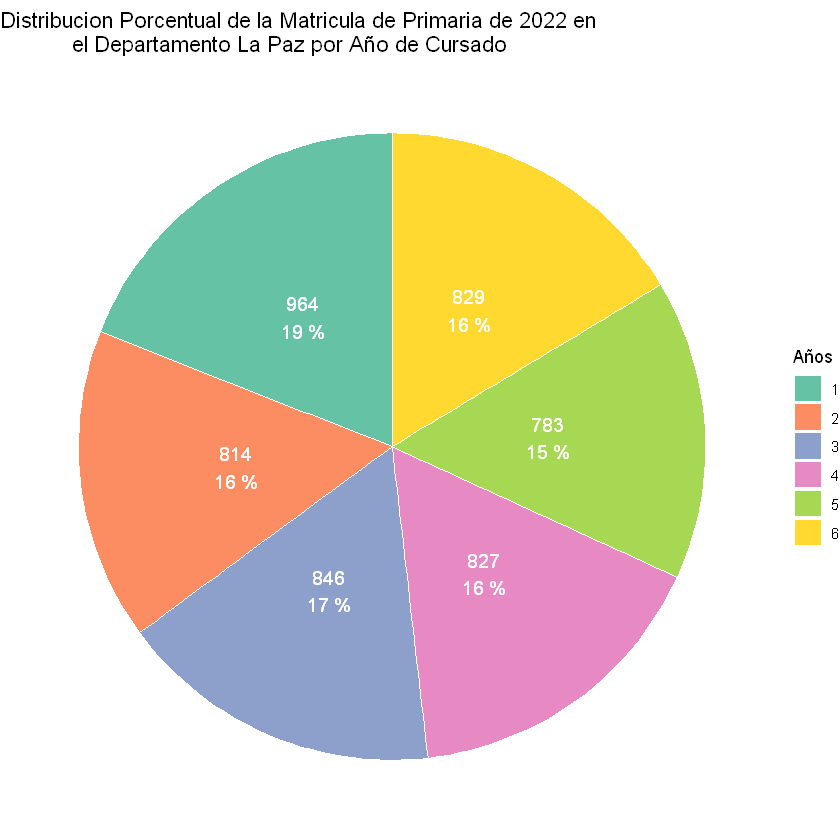

In [60]:
ggplot(D1, aes(x="", y=frec, fill=Años)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de Primaria de 2022 en
            el Departamento La Paz por Año de Cursado")

### Secundaria

In [61]:
sectores_secu<-filter(dataset_mas_limpio_matricula, (AñoCursado == "1" |  AñoCursado == "2" |  AñoCursado == "3" |
                     AñoCursado == "4" |  AñoCursado == "5" |  AñoCursado == "6") & Modalidad == "Secundaria")

In [62]:
pie <- round(100 * table(sectores_secu$AñoCursado) / length(sectores_secu$AñoCursado))
pie
porc <- c(pie)
frec<- c(table(sectores_secu$AñoCursado))
D1<-data.frame(frec,porc)
D1
Años<-rownames(D1)


 1  2  3  4  5  6 
20 19 19 17 13 12 

frec,porc
890,20
841,19
847,19
762,17
589,13
559,12


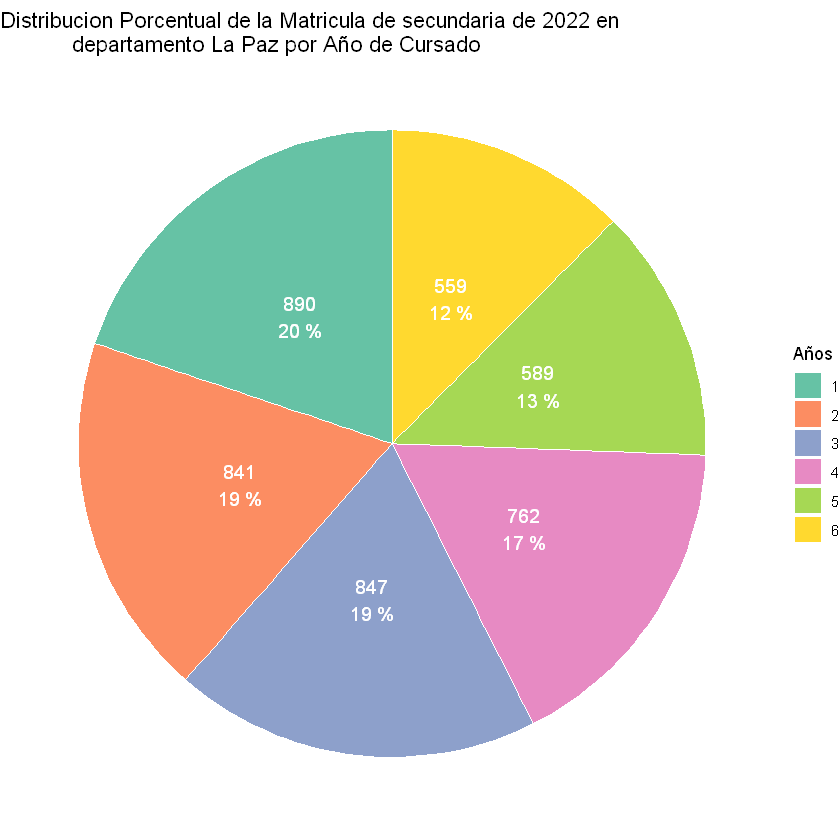

In [63]:
ggplot(D1, aes(x="", y=frec, fill=Años)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de secundaria de 2022 en
            departamento La Paz por Año de Cursado")

### Distribución por turno 

### Primaria

In [64]:
sector_por_turno_p <- filter(dataset_mas_limpio_matricula, Modalidad == 'Primaria')

In [65]:
sector_por_turno_p$turno <- ifelse(sector_por_turno_p$turno %in% c("INTERMEDIO", "ROTATIVO", "COMPLETO"), "OTROS", sector_por_turno_p$turno)
ftable(sector_por_turno_p$turno)

 MAÑANA OTROS TARDE
                   
   1886   255  2922

In [66]:
pie <- round(100 * table(sector_por_turno_p$turno) / length(sector_por_turno_p$turno))
porc <- c(pie)
frec <- c(table(sector_por_turno_p$turno))
D1 <- data.frame(frec, porc)
rownames(D1) <- names(table(sector_por_turno_p$turno))
D1
turnos<-rownames(D1)

,frec,porc
MAÑANA,1886,37
OTROS,255,5
TARDE,2922,58


In [67]:
pie <- round(100 * table(sector_por_turno_p$turno) / length(sector_por_turno_p$turno))
pie
porc <- c(pie)
frec<- c(table(sector_por_turno_p$turno))
D1<-data.frame(frec,porc)
D1
turnos<-rownames(D1)


MAÑANA  OTROS  TARDE 
    37      5     58 

,frec,porc
MAÑANA,1886,37
OTROS,255,5
TARDE,2922,58


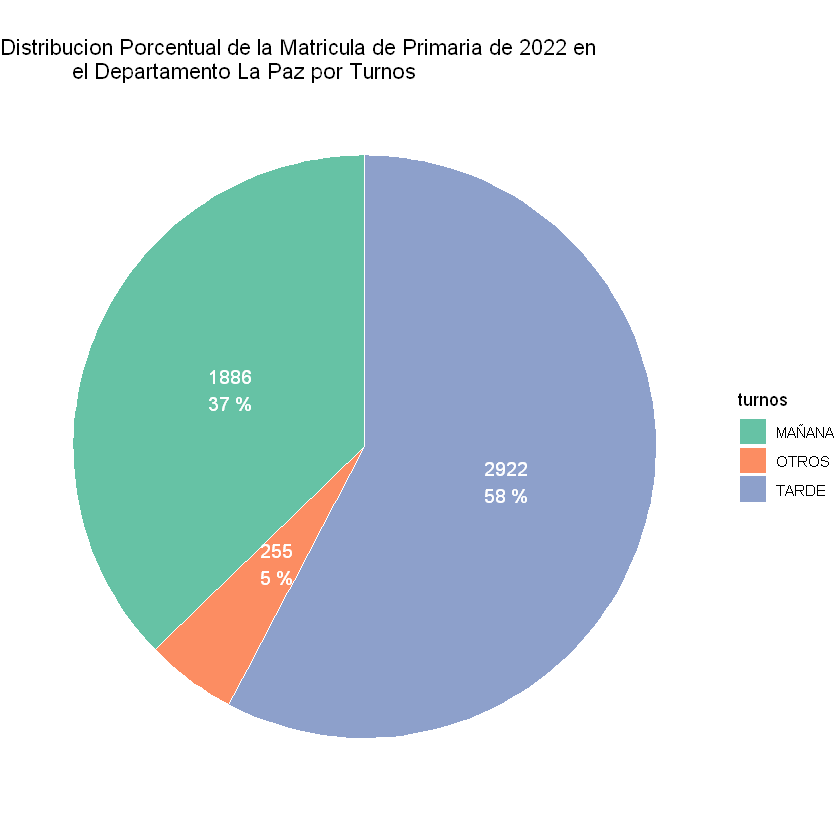

In [68]:
ggplot(D1, aes(x="", y=frec, fill=turnos)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.50))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de Primaria de 2022 en
            el Departamento La Paz por Turnos")

### Secundaria

In [69]:
sector_por_turno_s <- filter(dataset_mas_limpio_matricula, Modalidad == 'Secundaria')
ftable(sector_por_turno_s$turno)

 DIURNO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                              
     79   3166    50       12  1233         17

In [70]:
sector_por_turno_s$turno <- ifelse(sector_por_turno_s$turno %in% c("DIURNO", "NOCHE", "ROTATIVO","VESPERTINO"), "OTROS", sector_por_turno_s$turno)
ftable(sector_por_turno_p$turno)
pie <- round(100 * table(sector_por_turno_s$turno) / length(sector_por_turno_s$turno))
pie
porc <- c(pie)
frec<- c(table(sector_por_turno_s$turno))
D1<-data.frame(frec,porc)
D1
Turnos<-rownames(D1)

 MAÑANA OTROS TARDE
                   
   1886   255  2922


MAÑANA  OTROS  TARDE 
    69      3     27 

,frec,porc
MAÑANA,3166,69
OTROS,158,3
TARDE,1233,27


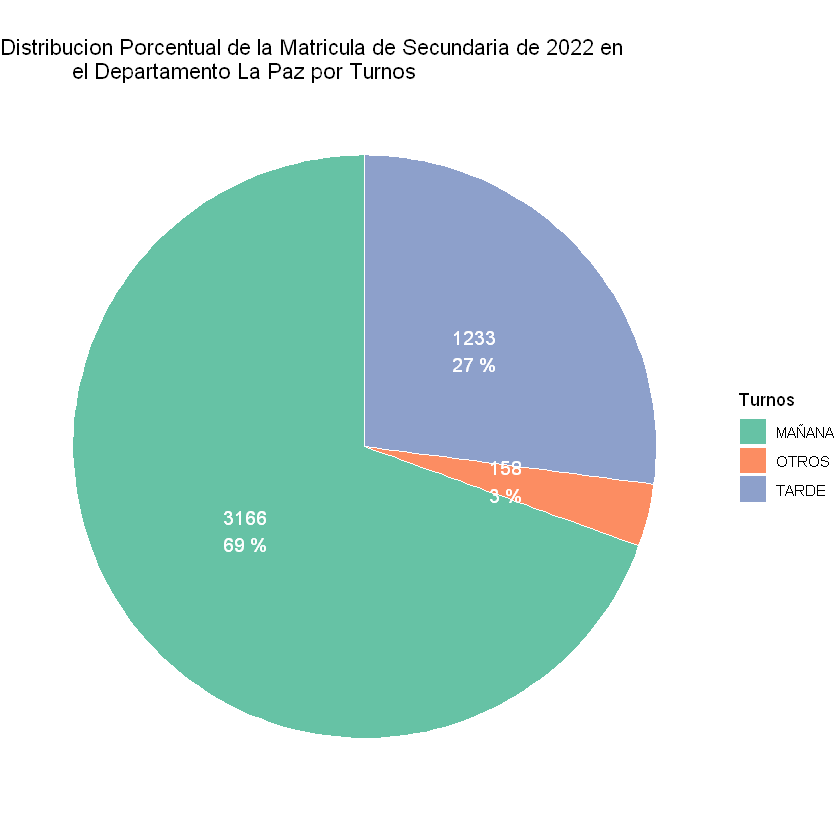

In [71]:
ggplot(D1, aes(x="", y=frec, fill=Turnos)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de Secundaria de 2022 en
            el Departamento La Paz por Turnos")

# Distribucion por sector publico y privado


FALSE  TRUE 
 4446   617 

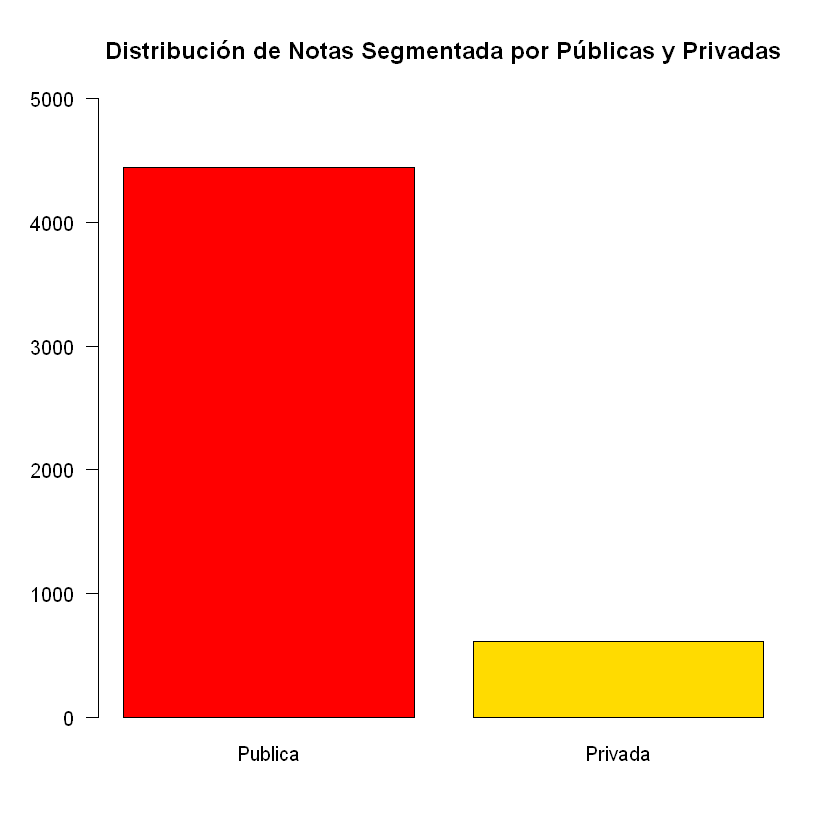

In [72]:
#Gráfico de barras de frecuencia absoluta
nombres <- c("Publica", "Privada")
escu_primaria <- filter(dataset_mas_limpio_matricula,Modalidad == "Primaria")
tabla <- table(escu_primaria$EsPrivada)
tabla
#barplot(tabla,main="Distribucion segmentado por publicas y privadas",col=rainbow(6),ylim=c(0,30000),las=2)
# Crear el gráfico de barras con nombres de columnas
barplot(tabla, 
        main = "Distribución de Notas Segmentada por Públicas y Privadas",
        col = rainbow(7), 
        ylim = c(0, 5000), 
        las = 1,
        names.arg = nombres)

In [73]:
sector_pp <- filter(dataset_mas_limpio_matricula, Modalidad == 'Primaria')
pie <- round(100 * table(sector_pp$EsPrivada) / length(sector_pp$EsPrivada))
pie
porc <- c(pie)
frec<- c(table(sector_pp$EsPrivada))
D1<-data.frame(frec,porc)
D1

Sector<-rownames(D1)


FALSE  TRUE 
   88    12 

,frec,porc
FALSE,4446,88
TRUE,617,12


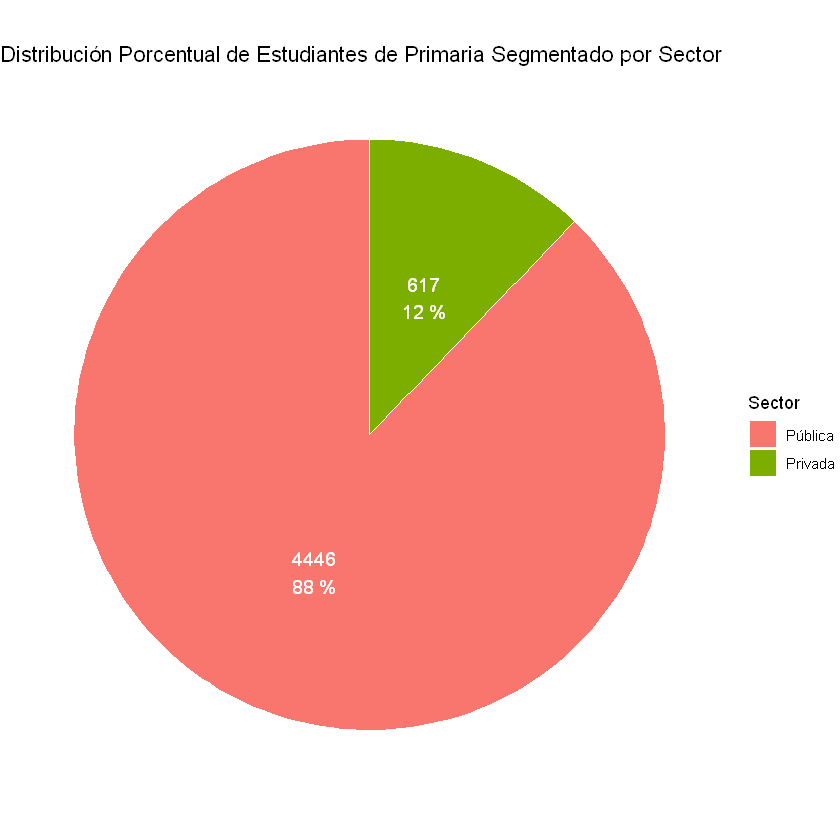

In [74]:
ggplot(D1, aes(x="", y=frec, fill=Sector)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
    scale_fill_manual(values=c("#F8766D", "#7CAE00"), labels=c("Pública","Privada"))+
  #scale_fill_brewer(palette="Set2")+
  labs(title="Distribución Porcentual de Estudiantes de Primaria Segmentado por Sector")



In [75]:
escu_secu<- filter(dataset_mas_limpio_matricula, Modalidad == 'Secundaria')
pie <- round(100 * table(escu_secu$EsPrivada) / length(escu_secu$EsPrivada))
pie
porc <- c(pie)
frec<- c(table(escu_secu$EsPrivada))
D1_s<-data.frame(frec,porc)
D1_s

Sector<-rownames(D1_s)


FALSE  TRUE 
   83    17 

,frec,porc
FALSE,3801,83
TRUE,756,17


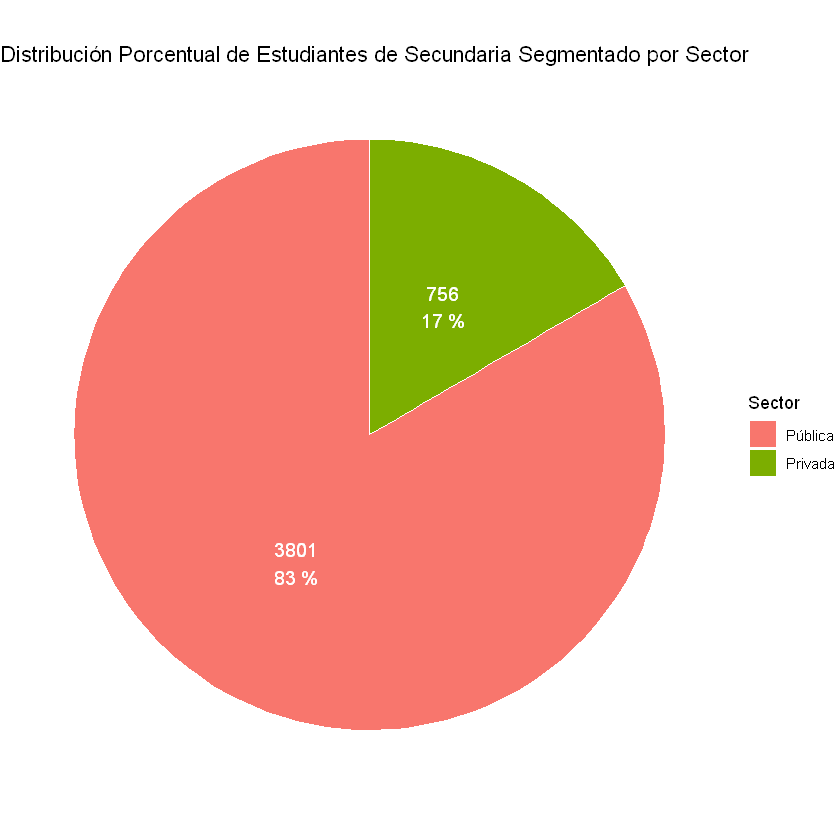

In [76]:
ggplot(D1_s, aes(x="", y=frec, fill=Sector)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
    scale_fill_manual(values=c("#F8766D", "#7CAE00"), labels=c("Pública","Privada"))+
  #scale_fill_brewer(palette="Set2")+
  labs(title="Distribución Porcentual de Estudiantes de Secundaria Segmentado por Sector")

# Segmentado por nivel, año y materia de la variable promedio

### Materia matemática, primer año - Primaria

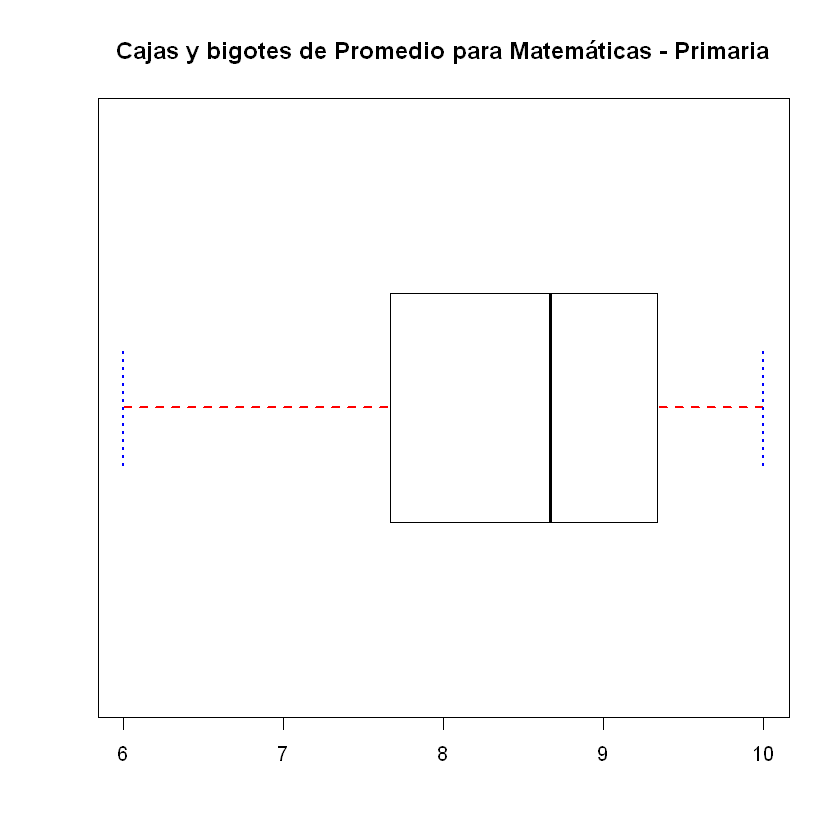

In [77]:
primaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="MATEMÁTICA" & Modalidad == "Primaria")

boxplot(primaria_Mat_1[!is.na(primaria_Mat_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue", # Color barras
        main ="Cajas y bigotes de Promedio para Matemáticas - Primaria", # Tìtulo
        horizontal = TRUE
       )

### Materia Lengua, primer año - Primaria

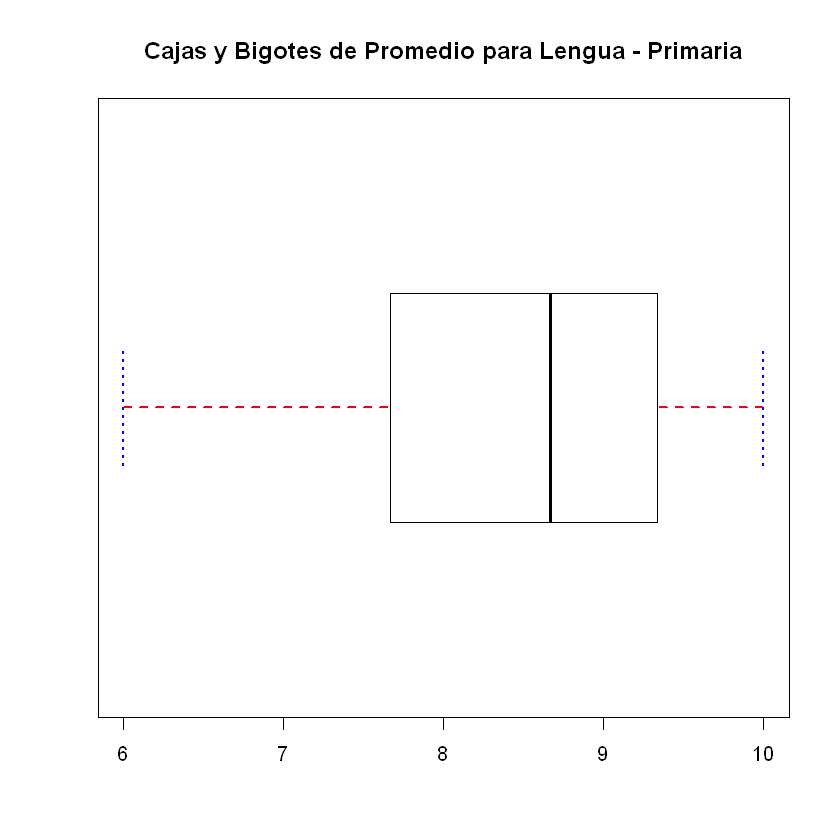

In [78]:
primaria_len_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="LENGUA" & Modalidad == "Primaria")

boxplot(primaria_len_1[!is.na(primaria_len_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue", # Color barras
        main ="Cajas y Bigotes de Promedio para Lengua - Primaria", # Tìtulo
        horizontal = TRUE
       )

### Materia matemática, primer año - Secundaria



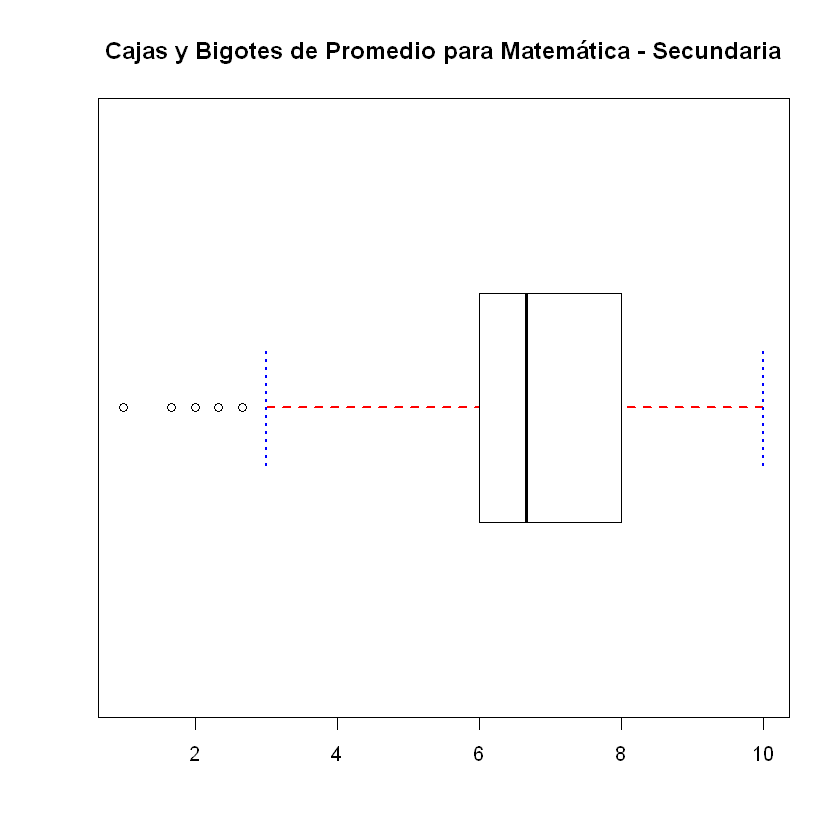

In [79]:
secundaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == 1 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")

boxplot(secundaria_Mat_1[!is.na(secundaria_Mat_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue", # Color barras
        main ="Cajas y Bigotes de Promedio para Matemática - Secundaria", # Tìtulo
        horizontal = TRUE
       )

### Materia Lengua y Literatura, primer año - Secundaria

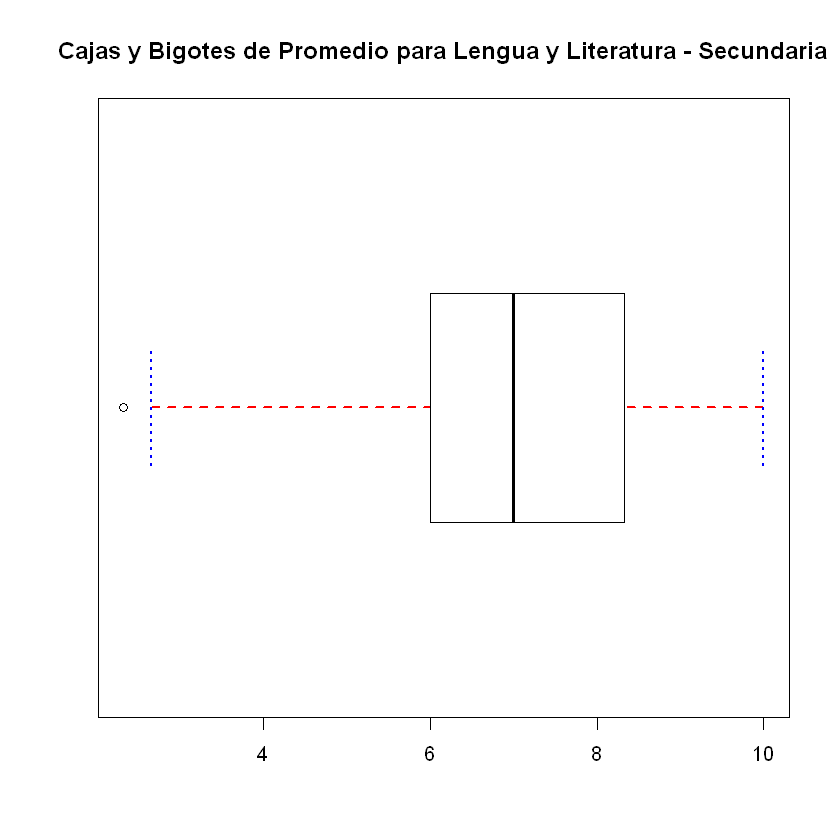

In [80]:
secundaria_len_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="LENGUA Y LITERATURA" & Modalidad == "Secundaria")

boxplot(secundaria_len_1[!is.na(secundaria_len_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue", # Color barras
        main ="Cajas y Bigotes de Promedio para Lengua y Literatura - Secundaria", # Tìtulo
        horizontal = TRUE
       )

## Histogramas segmentados por nivel, año y materia de la variable promedio para matemática y lengua

## Primaria
### Materia: matemática

[1] "Año cursado: 1"
[1] "Año cursado: 2"


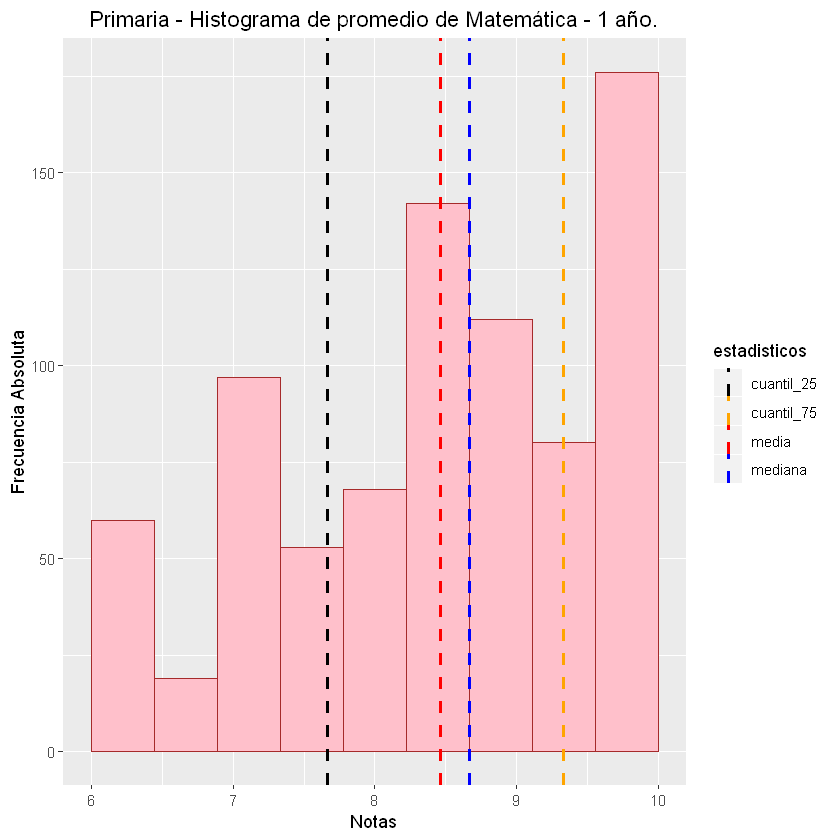

[1] "Año cursado: 3"


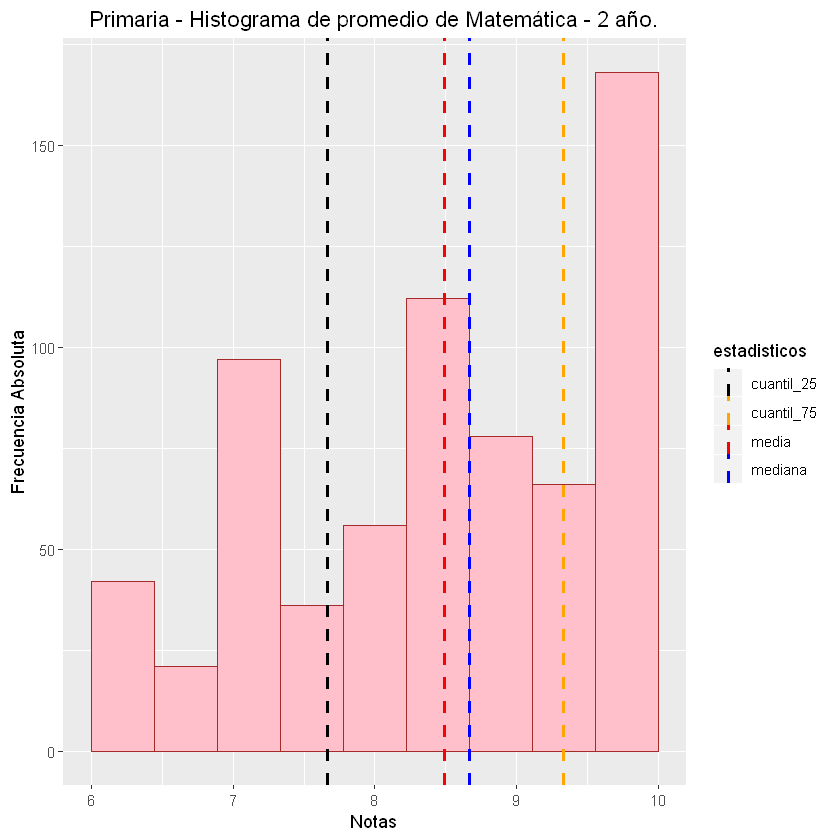

[1] "Año cursado: 4"


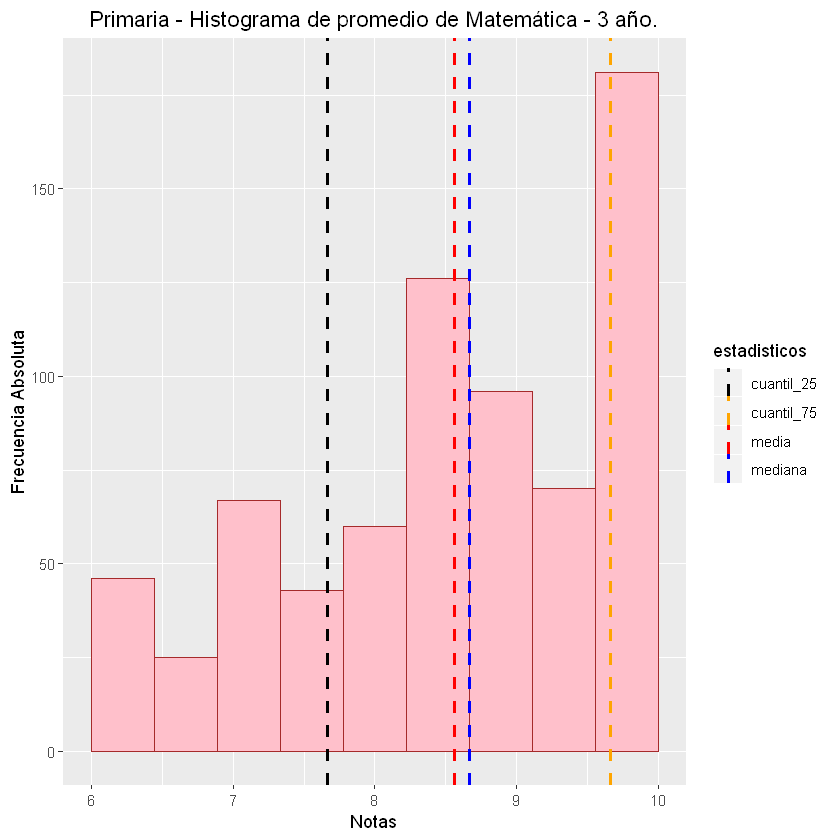

[1] "Año cursado: 5"


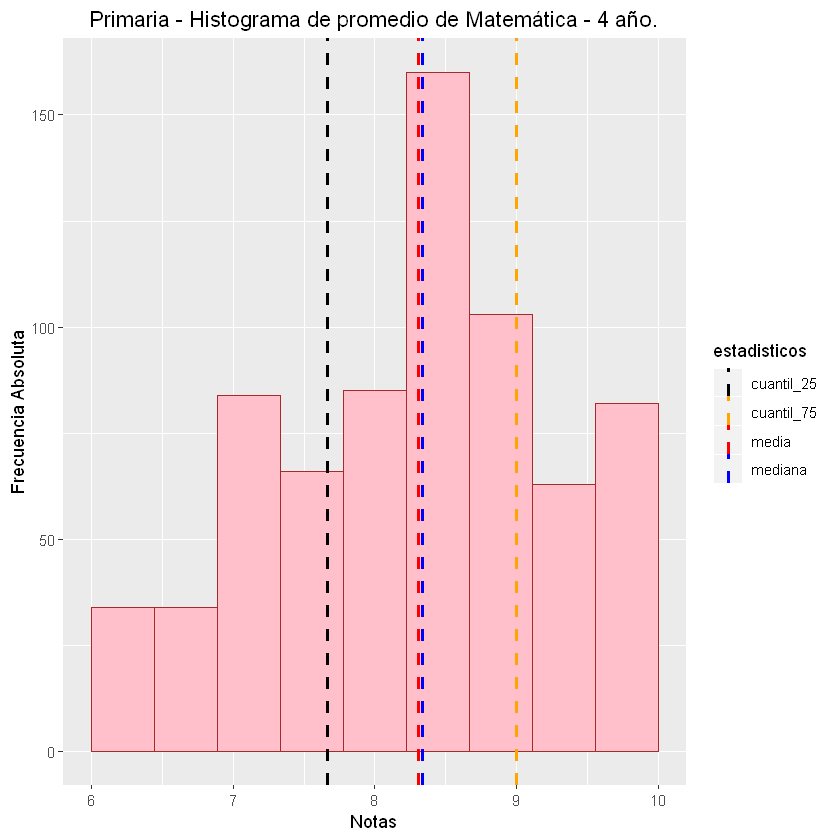

[1] "Año cursado: 6"


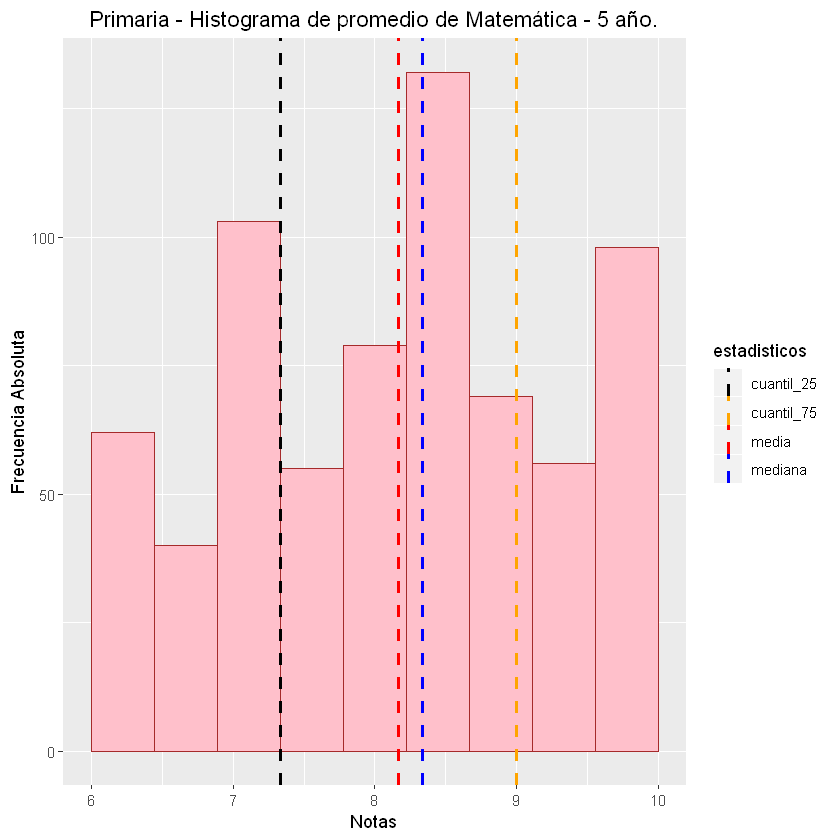

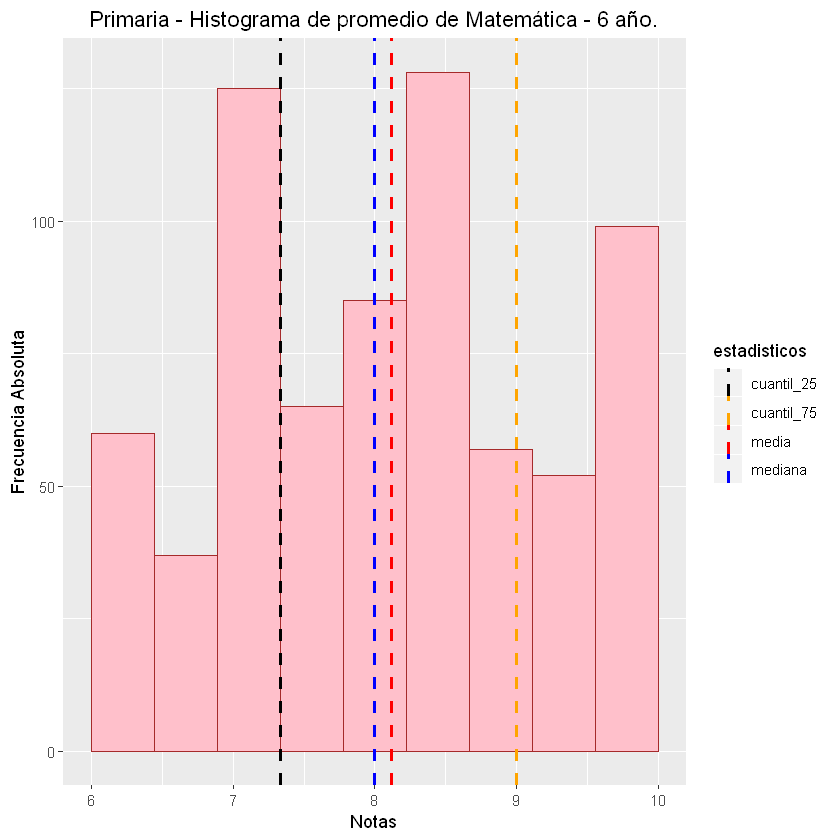

In [81]:
for (i in 1:6)
{
    print(paste0("Año cursado: ", i))
    primaria_mat <- filter(dataset_mas_limpio, AñoCursado == i & asignatura == "MATEMÁTICA" & Modalidad == 'Primaria')
    histo_p_1 <- fdt(primaria_mat$Promedio,breaks="Sturges",na.rm=TRUE)
    histo_p <- ggplot(primaria_mat[!is.na(primaria_mat$Promedio),],aes(x= Promedio))+
        geom_histogram(fill="pink",colour="brown",name="matemática", bins=10)+
            scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
      scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                      color = "mediana"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(aes(xintercept = mean(Promedio),
                      color = "media"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.25),
             color = "cuantil_25"),
         linetype = "dashed",
         size = 1
       ) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.75),
             color = "cuantil_75"),
         linetype = "dashed",
         size = 1
       )  +
       scale_color_manual(
         name = "estadisticos",
         values = c(
           mediana = "blue",
           media = "red",
           cuantil_25 = "black",
           cuantil_75 = "orange"
         )
       ) +
       xlab("Longitud") + ylab("n") +
    ggtitle(paste0("Primaria - Histograma de promedio de Matemática - ", i, " año.")) +
   theme(plot.title = element_text(hjust = 0.5))
    print(histo_p)
}


### Materia: Lengua

[1] "Año cursado: 1"
[1] "Año cursado: 2"


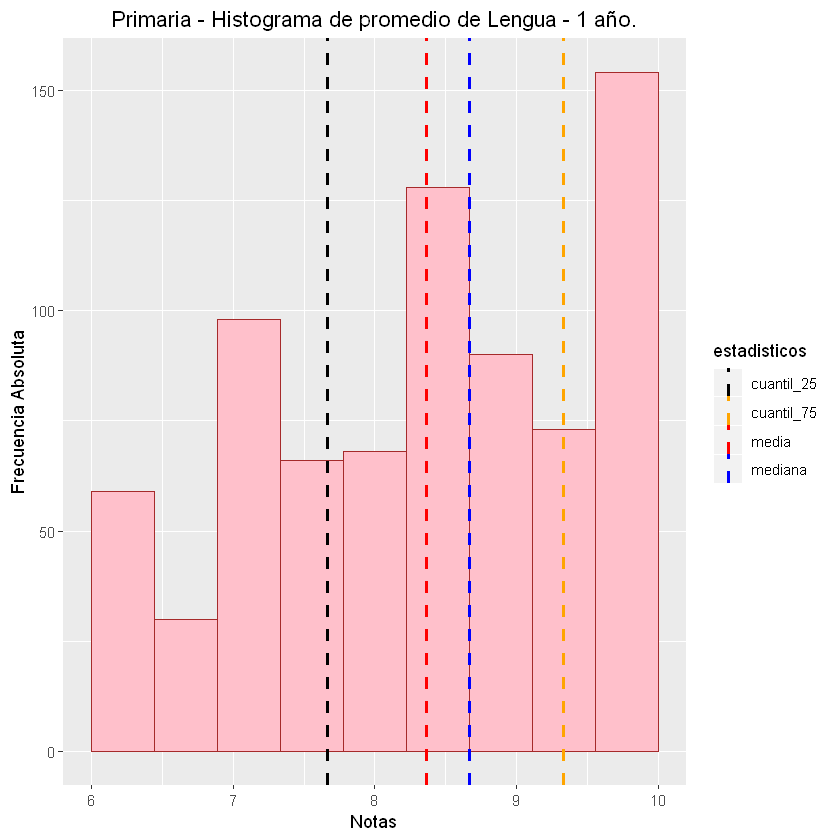

[1] "Año cursado: 3"


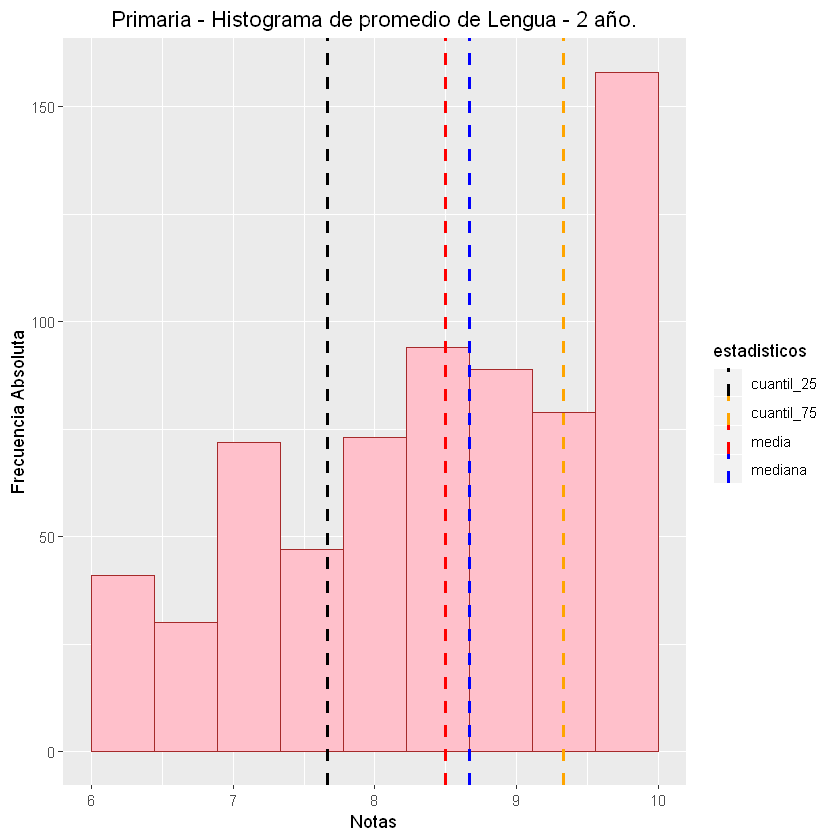

[1] "Año cursado: 4"


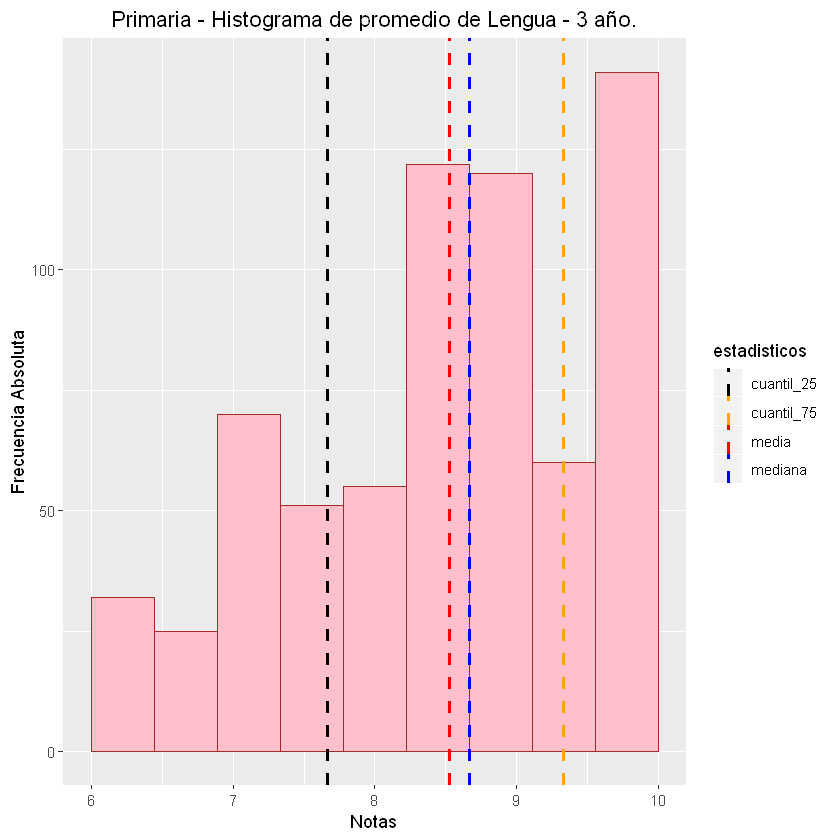

[1] "Año cursado: 5"


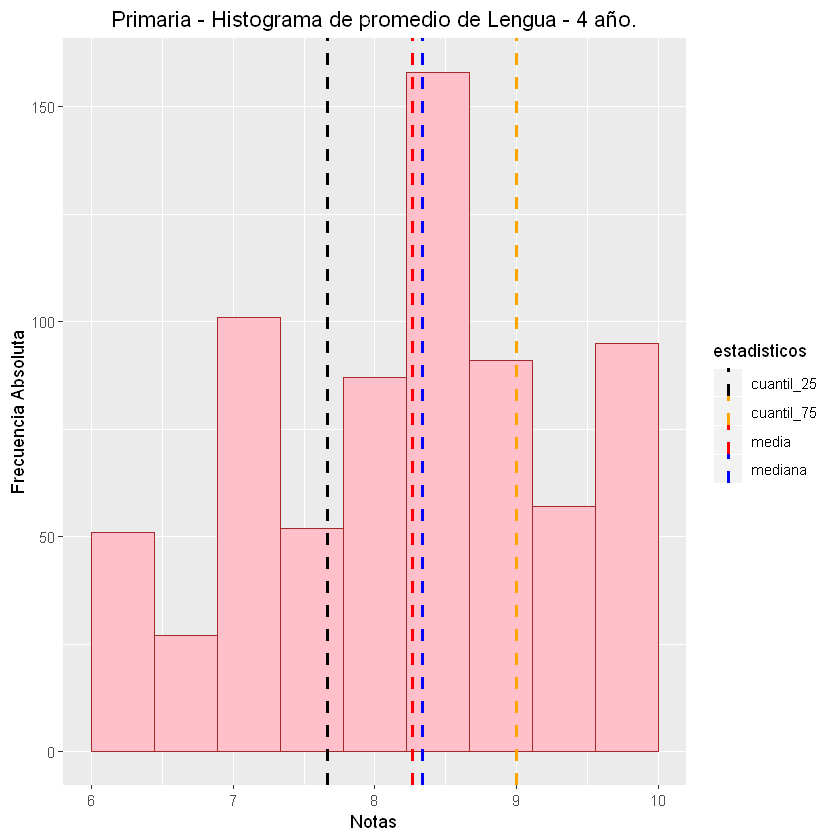

[1] "Año cursado: 6"


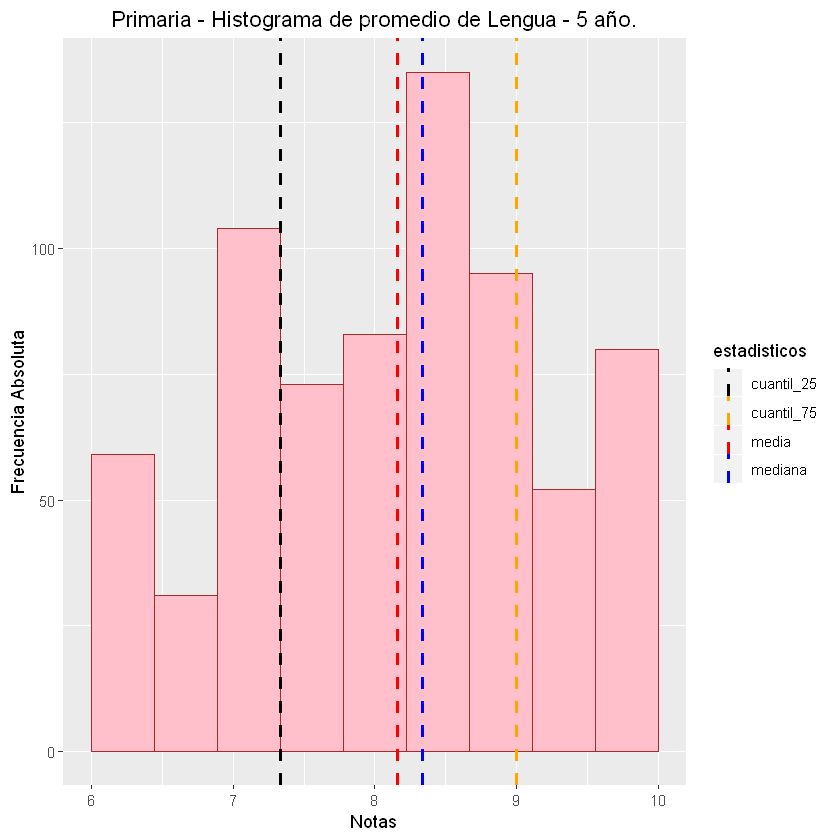

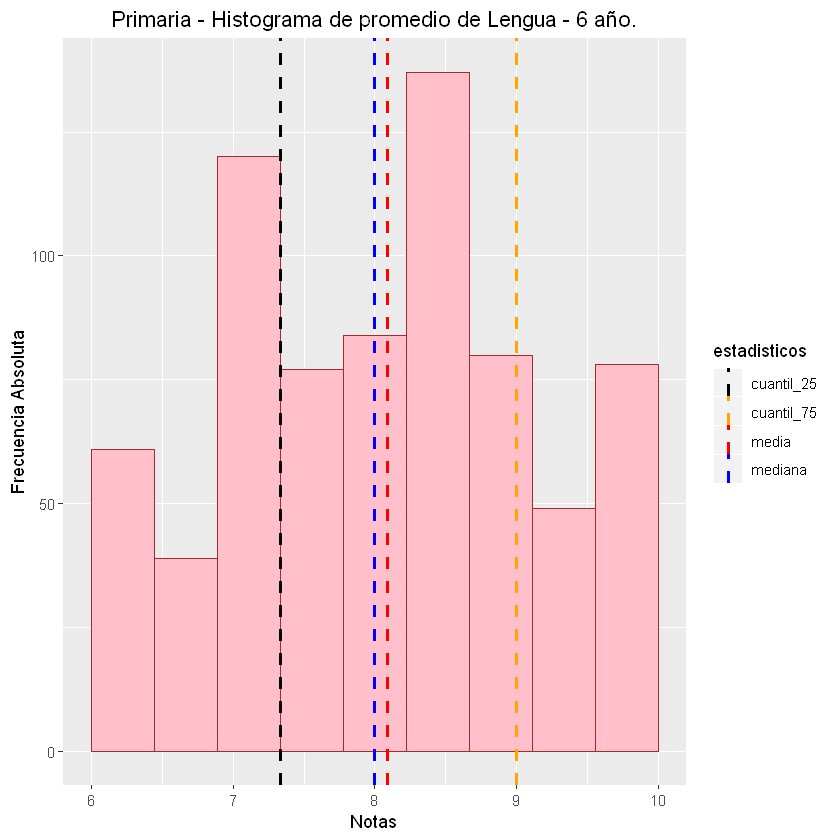

In [82]:
for (i in 1:6)
{
    print(paste0("Año cursado: ", i))
    primaria_len <- filter(dataset_mas_limpio, AñoCursado == i & asignatura == "LENGUA" & Modalidad == 'Primaria')
    histo_p_1 <- fdt(primaria_len$Promedio,breaks="Sturges",na.rm=TRUE)
    histo_p <- ggplot(primaria_len[!is.na(primaria_len$Promedio),],aes(x= Promedio))+
        geom_histogram(fill="pink",colour="brown",name="lengua", bins=10)+
            scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
      scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                      color = "mediana"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(aes(xintercept = mean(Promedio),
                      color = "media"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.25),
             color = "cuantil_25"),
         linetype = "dashed",
         size = 1
       ) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.75),
             color = "cuantil_75"),
         linetype = "dashed",
         size = 1
       )  +
       scale_color_manual(
         name = "estadisticos",
         values = c(
           mediana = "blue",
           media = "red",
           cuantil_25 = "black",
           cuantil_75 = "orange"
         )
       ) +
       xlab("Longitud") + ylab("n") +
    ggtitle(paste0("Primaria - Histograma de promedio de Lengua - ", i, " año.")) +
   theme(plot.title = element_text(hjust = 0.5))
    print(histo_p)
}


## Secundaria
### Materia: matemática

[1] "Año cursado: 1"
[1] "Año cursado: 2"


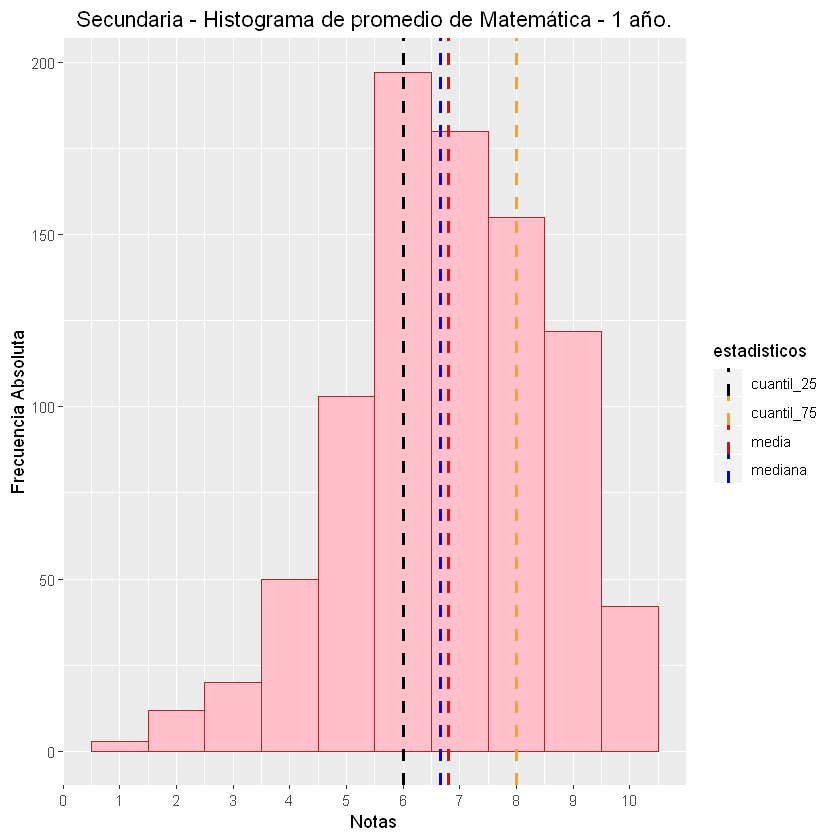

[1] "Año cursado: 3"


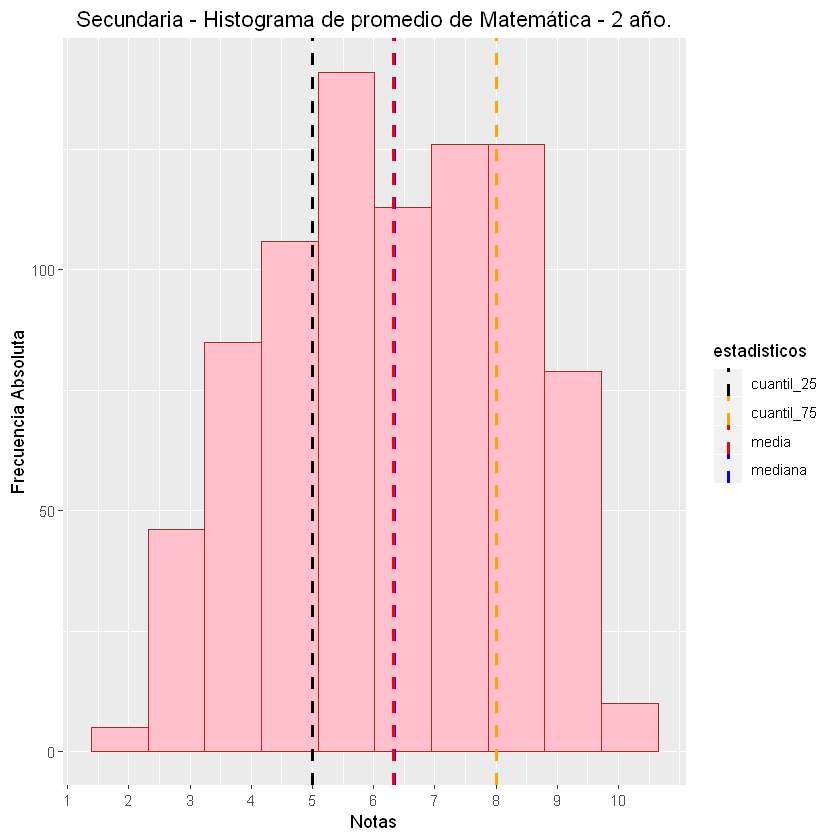

[1] "Año cursado: 4"


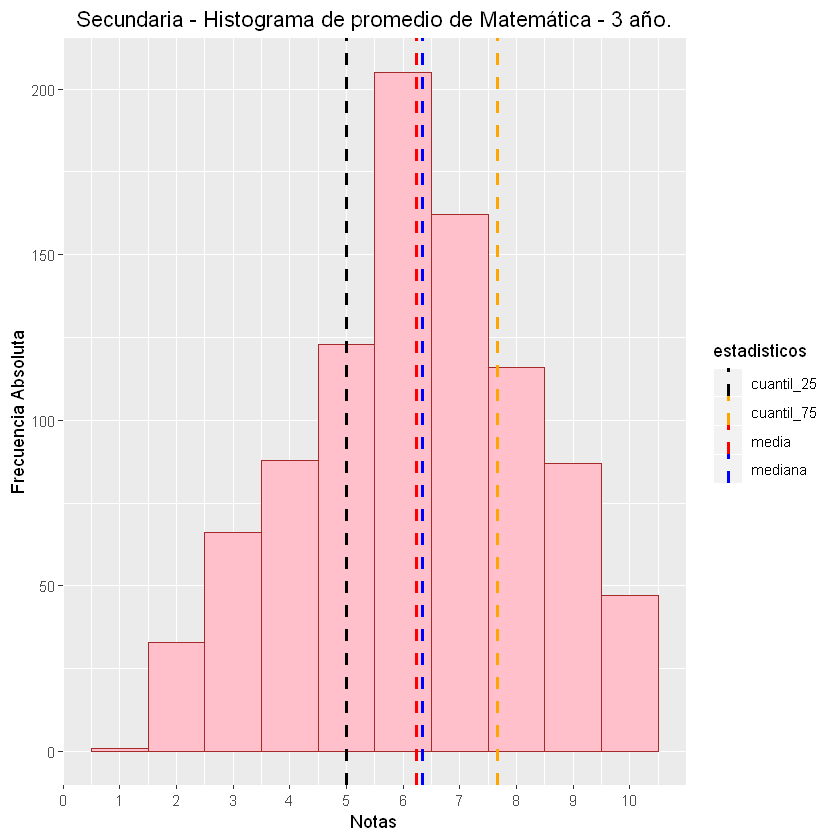

[1] "Año cursado: 5"


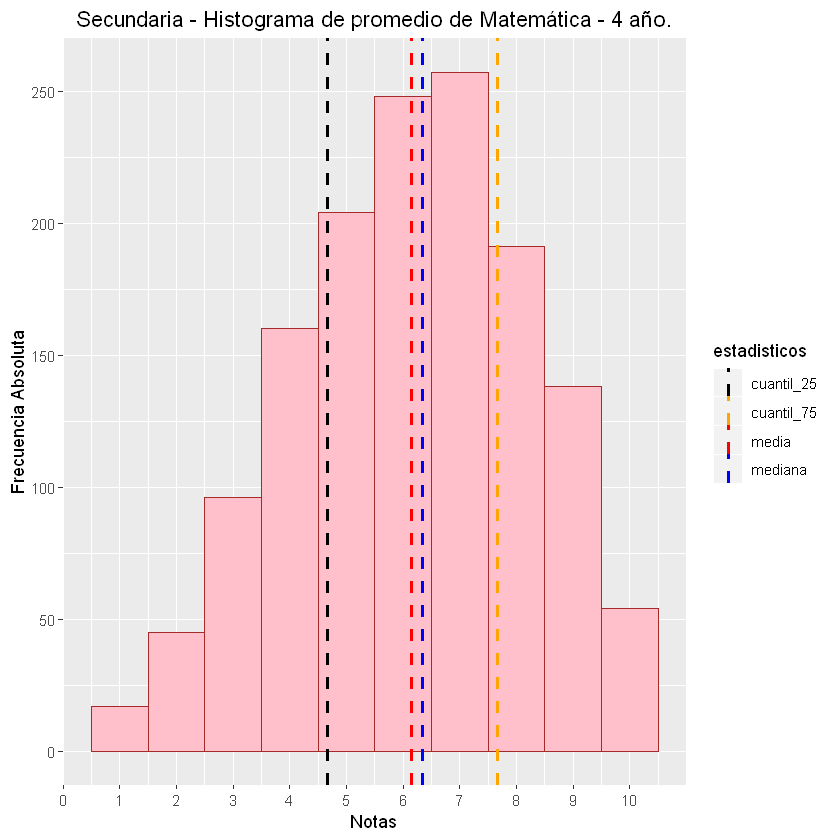

[1] "Año cursado: 6"


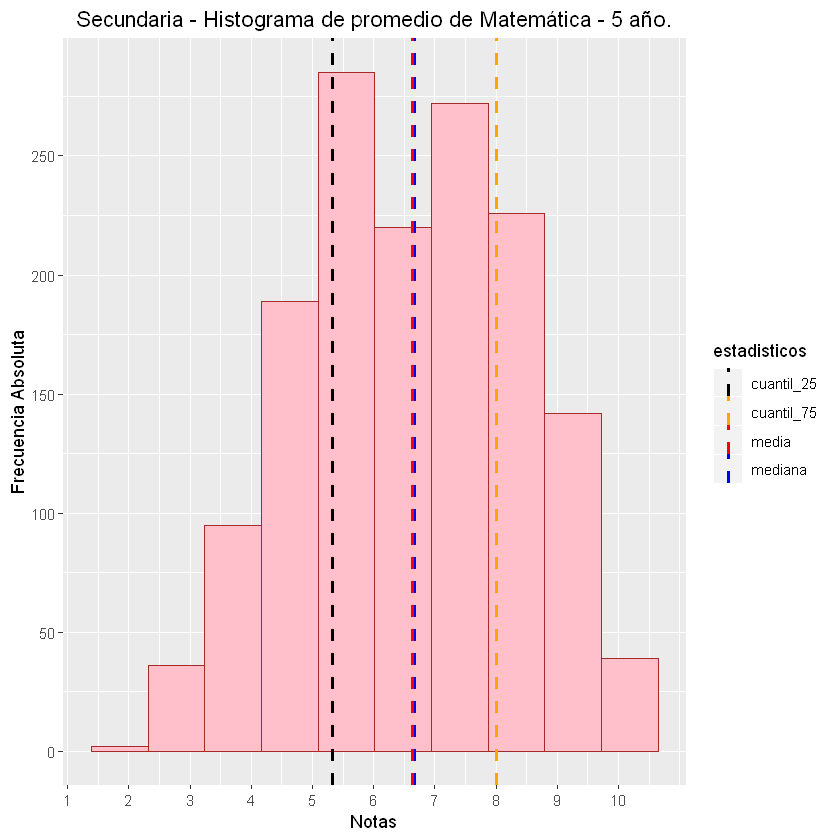

[1] "Año cursado: 7"


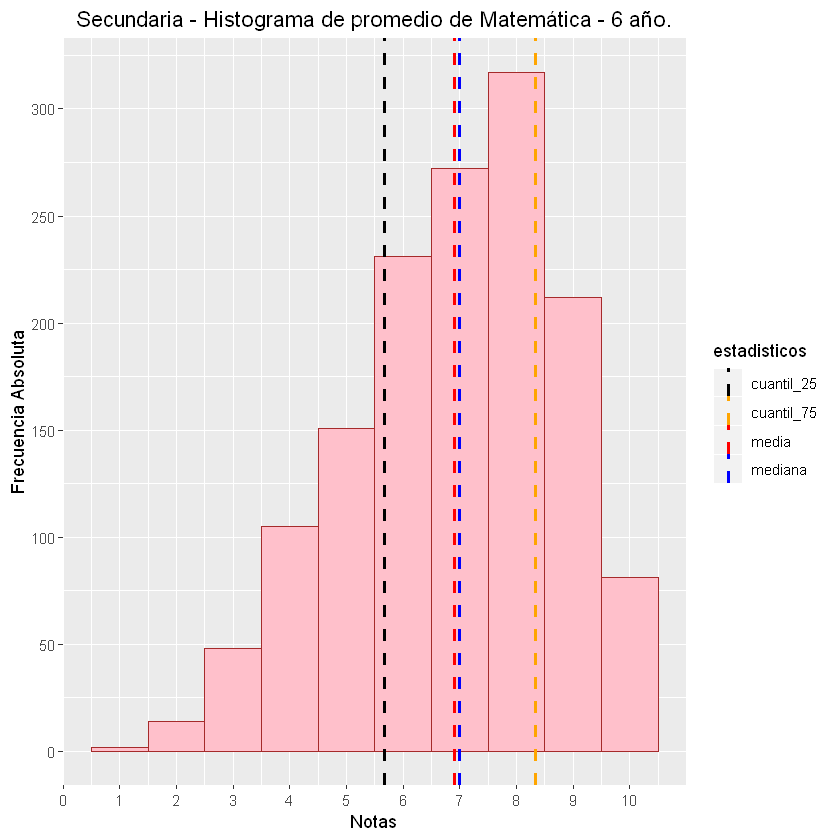

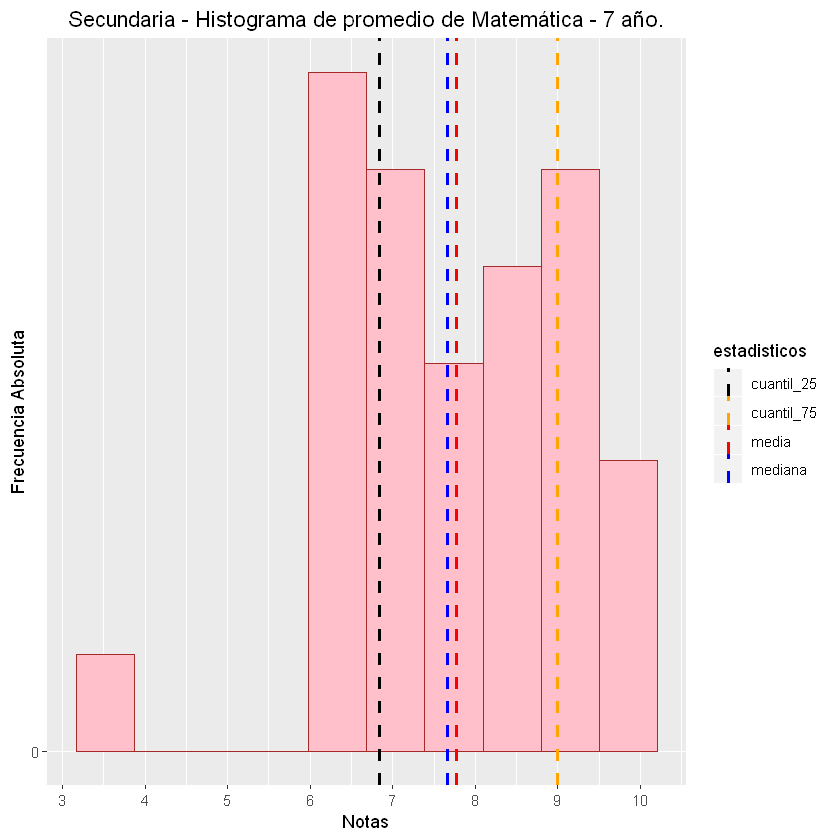

In [83]:
for (i in 1:7)
{
    print(paste0("Año cursado: ", i))
    secundaria_mat<- filter(dataset_mas_limpio, AñoCursado == i & asignatura == "MATEMATICA" & Modalidad == 'Secundaria')
    histo_s_1 <- fdt(secundaria_mat$Promedio,breaks="Sturges",na.rm=TRUE)
    histo_s <- ggplot(secundaria_mat[!is.na(secundaria_mat$Promedio),],aes(x= Promedio))+
        geom_histogram(fill="pink",colour="brown",name="matematica", bins=10)+
            scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
      scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                      color = "mediana"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(aes(xintercept = mean(Promedio),
                      color = "media"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.25),
             color = "cuantil_25"),
         linetype = "dashed",
         size = 1
       ) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.75),
             color = "cuantil_75"),
         linetype = "dashed",
         size = 1
       )  +
       scale_color_manual(
         name = "estadisticos",
         values = c(
           mediana = "blue",
           media = "red",
           cuantil_25 = "black",
           cuantil_75 = "orange"
         )
       ) +
       xlab("Longitud") + ylab("n") +
        ggtitle(paste0("Secundaria - Histograma de promedio de Matemática - ", i, " año.")) +
       theme(plot.title = element_text(hjust = 0.5))
    print(histo_s)
}

### Materia: Lengua y literatura

[1] "Año cursado: 1"
[1] "Año cursado: 2"


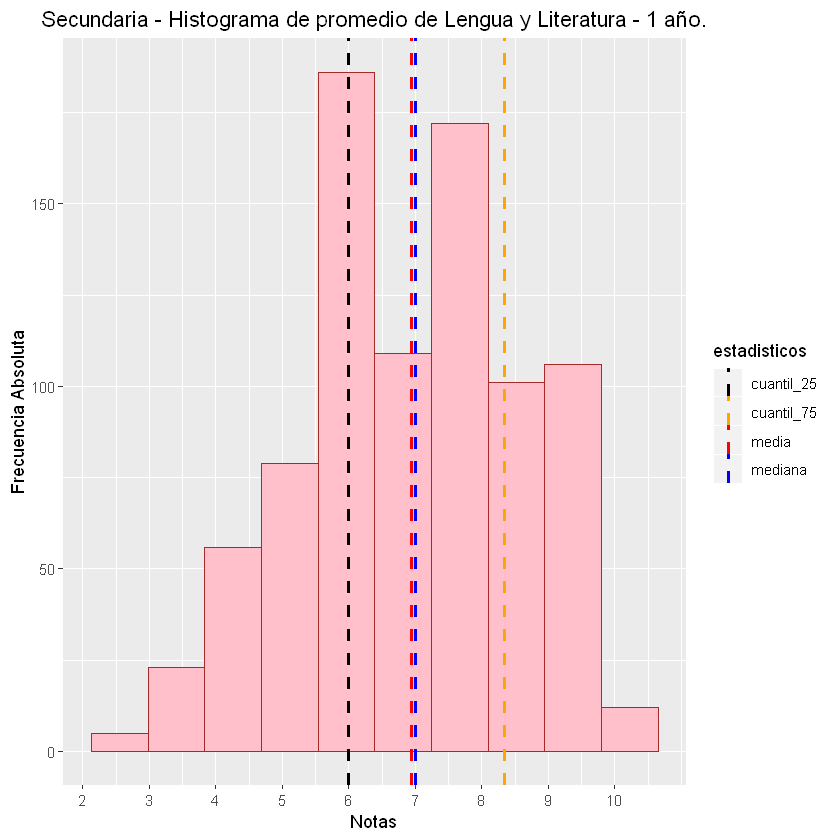

[1] "Año cursado: 3"


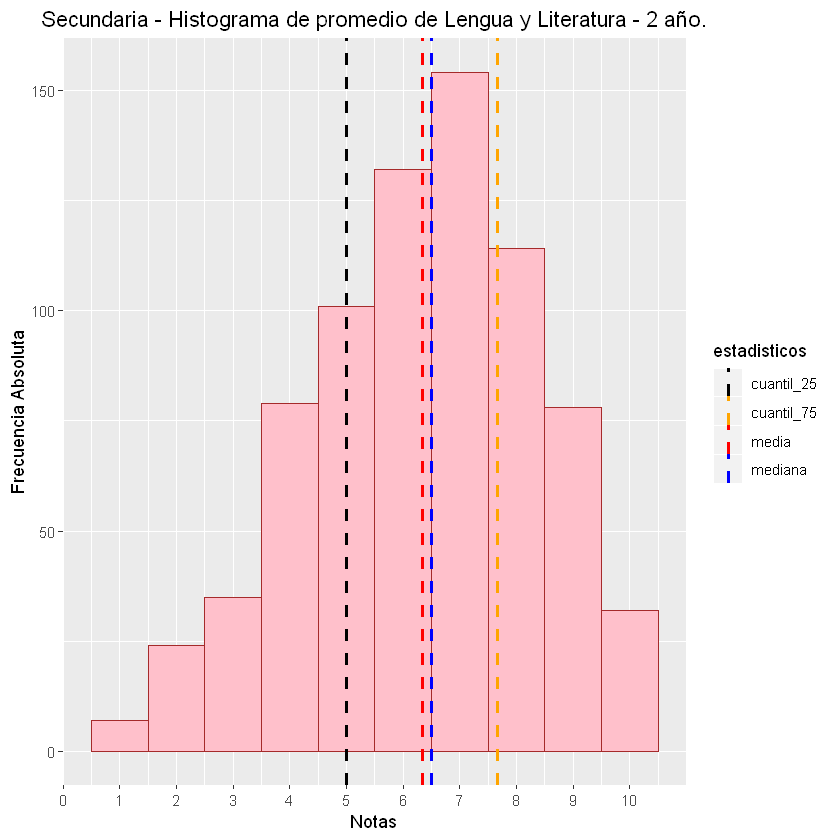

[1] "Año cursado: 4"


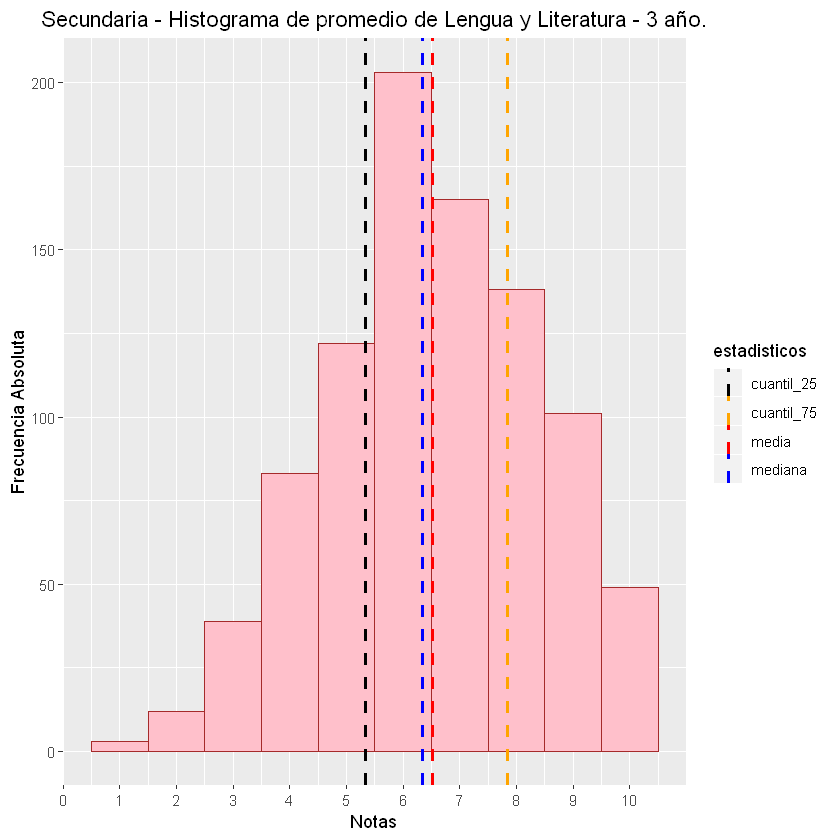

[1] "Año cursado: 5"


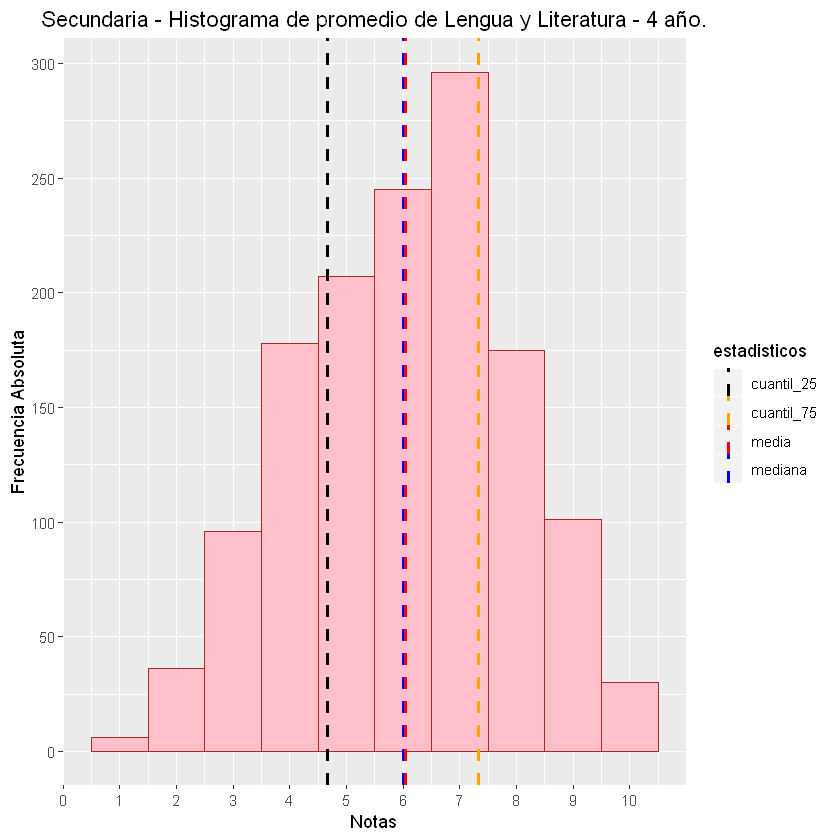

[1] "Año cursado: 6"


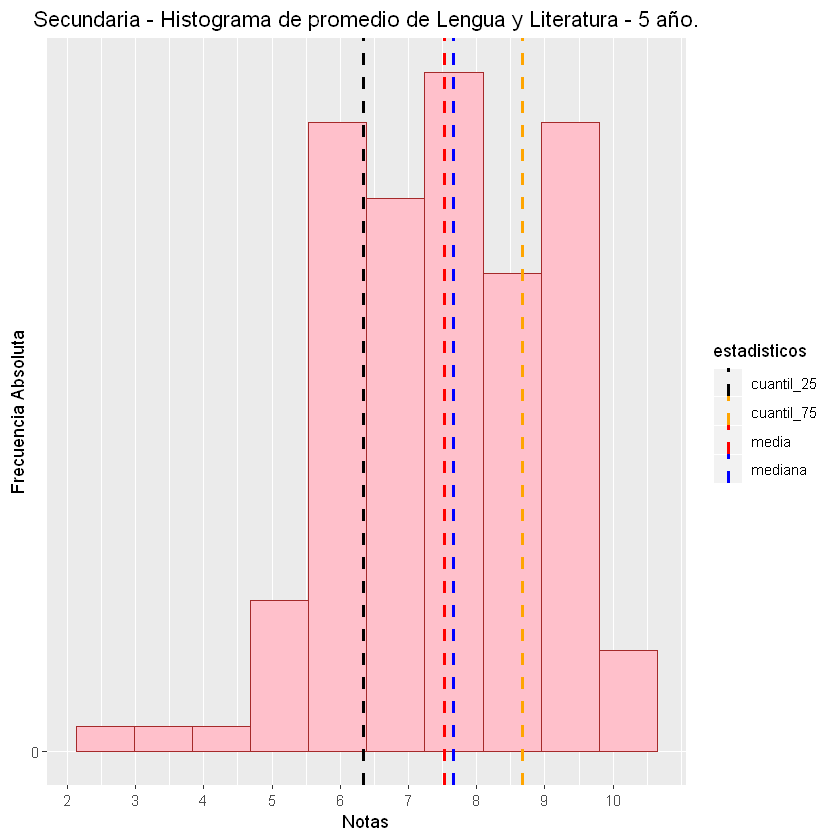

[1] "Año cursado: 7"


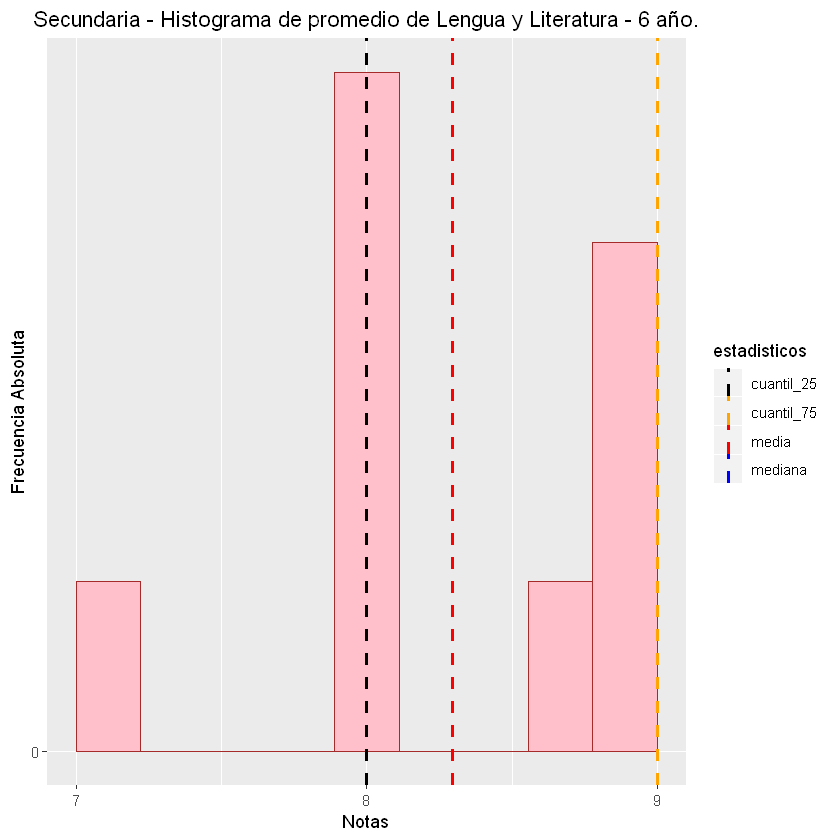

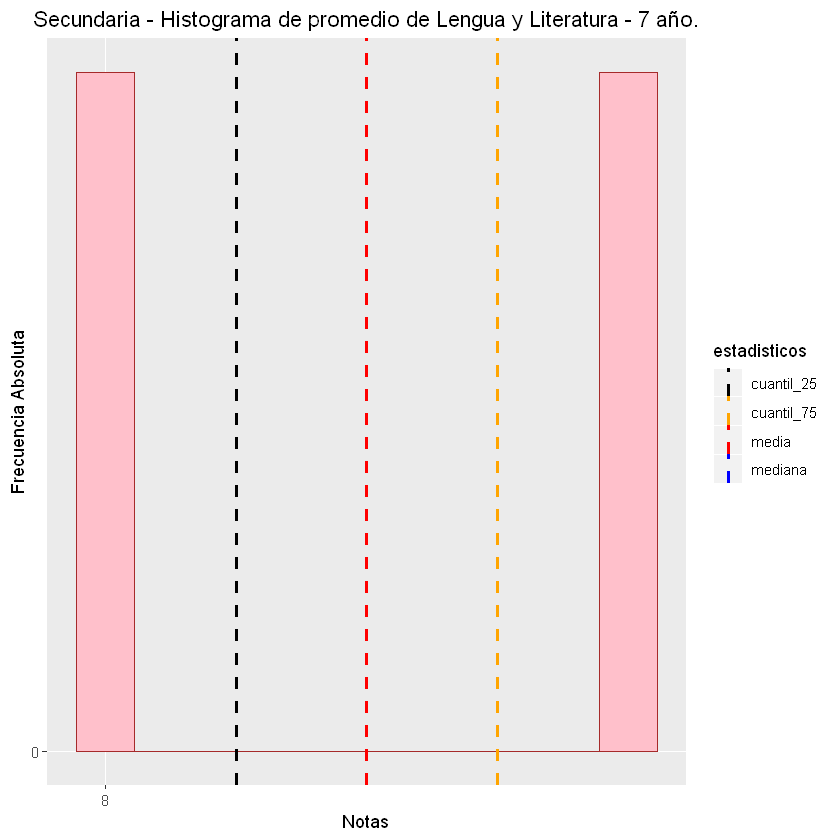

In [84]:
for (i in 1:7)
{
    print(paste0("Año cursado: ", i))
    secundaria_len<- filter(dataset_mas_limpio, AñoCursado == i & asignatura == "LENGUA Y LITERATURA" & Modalidad == 'Secundaria')
    histo_s_1 <- fdt(secundaria_len$Promedio,breaks="Sturges",na.rm=TRUE)
    histo_s <- ggplot(secundaria_len[!is.na(secundaria_len$Promedio),],aes(x= Promedio))+
        geom_histogram(fill="pink",colour="brown",name="Lengua y literatura", bins=10)+
            scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
      scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                      color = "mediana"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(aes(xintercept = mean(Promedio),
                      color = "media"),
                  linetype = "dashed",
                  size = 1) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.25),
             color = "cuantil_25"),
         linetype = "dashed",
         size = 1
       ) +
       geom_vline(
         aes(xintercept = quantile(Promedio, 0.75),
             color = "cuantil_75"),
         linetype = "dashed",
         size = 1
       )  +
       scale_color_manual(
         name = "estadisticos",
         values = c(
           mediana = "blue",
           media = "red",
           cuantil_25 = "black",
           cuantil_75 = "orange"
         )
       ) +
       xlab("Longitud") + ylab("n") +
        ggtitle(paste0("Secundaria - Histograma de promedio de Lengua y Literatura - ", i, " año.")) +
       theme(plot.title = element_text(hjust = 0.5))
    print(histo_s)}


In [85]:
secundaria_len<- filter(dataset_mas_limpio, AñoCursado == 7 & asignatura == "LENGUA Y LITERATURA" & Modalidad == 'Secundaria')
ftable(secundaria_len$Promedio)

 8 8.33333333333333
                   
 1                1

## Guía 4

### a. ¿Son las correlaciones iguales?
### b. A partir de lo que vimos en teoría, 
### ¿usted podría informar todas las correlaciones comocorrelaciones lineales fuertes?
### c. ¿Qué importancia tiene el graficar los datos?


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



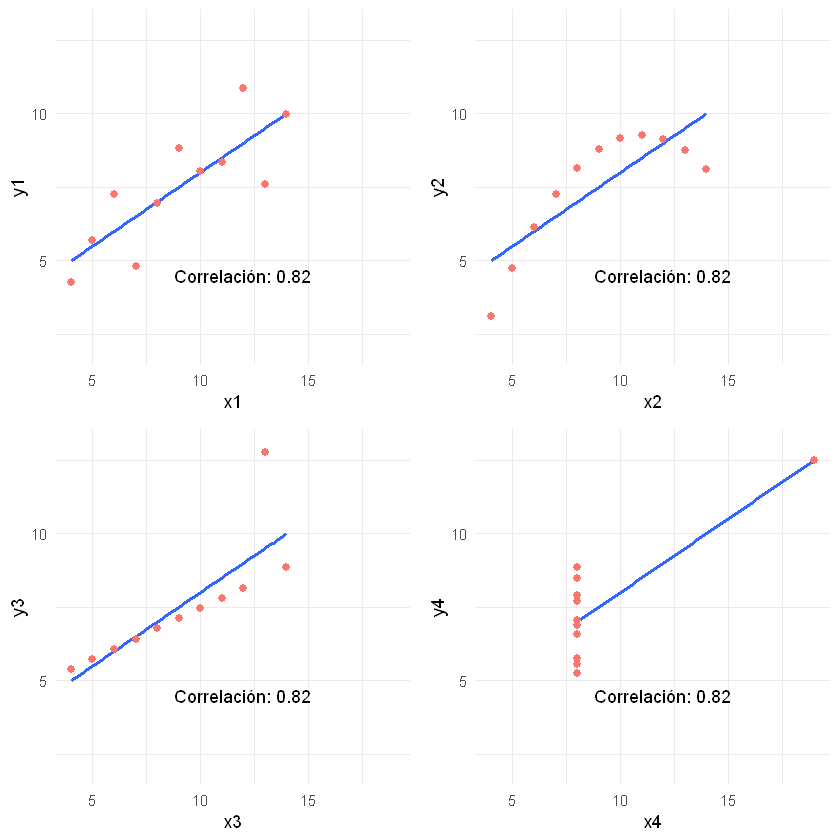

In [86]:
library(dplyr)
library(gridExtra)
anscombe_data = read.delim(file="https://goo.gl/mVLz5L", header = T)
# Calcular la correlación
cor_1 = cor(anscombe_data$x1, anscombe_data$y1)
cor_2 = cor(anscombe_data$x2, anscombe_data$y2)
cor_3 = cor(anscombe_data$x3, anscombe_data$y3)
cor_4 = cor(anscombe_data$x4, anscombe_data$y4)
# Definir la función
plot_anscombe <- function(x, y, value, type)
{ # 'anscombe_data' es una variable global, esto es
# una mala práctica de programación ;)
p=ggplot(anscombe_data, aes_string(x,y)) +
geom_smooth(method='lm', fill=NA) +
geom_point(aes(colour=factor(1),
fill = factor(1)),
shape=21, size = 2
) +
ylim(2, 13) +
xlim(4, 19) +
theme_minimal() +
theme(legend.position="none") +
annotate("text",
x = 12,
y =4.5,
label =
sprintf("%s: %s",
type,
round(value,2)
)
)
return(p)
}
# Graficar en una cuadrícula de 2x2
grid.arrange(plot_anscombe("x1", "y1", cor_1, "Correlación"),
plot_anscombe("x2", "y2", cor_2, "Correlación"),
plot_anscombe("x3", "y3", cor_3, "Correlación"),
plot_anscombe("x4", "y4", cor_4, "Correlación"),
ncol=2, nrow=2)


## Punto 4
### Comparación mediante histograma

### Secundaria - primer año

In [87]:
secundaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == 1 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")

### Comparación mediante Boxplot

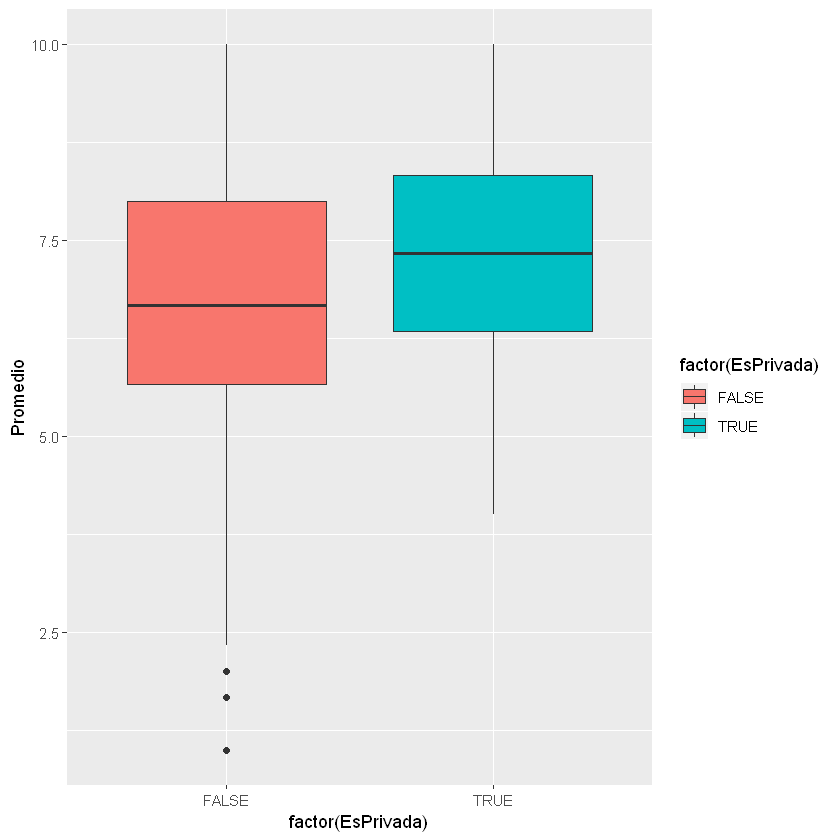

In [88]:
g2 <- ggplot(secundaria_Mat_1, aes(factor(EsPrivada), Promedio))
g2 + geom_boxplot(aes(fill = factor(EsPrivada)))

## Punto 5

### Comparación de promedios de matemáticas de los diferentes años en distintos turnos

In [89]:
ftable(filter(dataset_mas_limpio, asignatura == "MATEMÁTICA" & Modalidad == "Primaria")$turno)

 COMPLETO INTERMEDIO MAÑANA ROTATIVO TARDE
                                          
       99          2   1588      131  2490

In [90]:
ftable(filter(dataset_mas_limpio, asignatura == "LENGUA" & Modalidad == "Primaria")$turno)

 COMPLETO INTERMEDIO MAÑANA ROTATIVO TARDE
                                          
       98          2   1612      127  2442

### Primaria

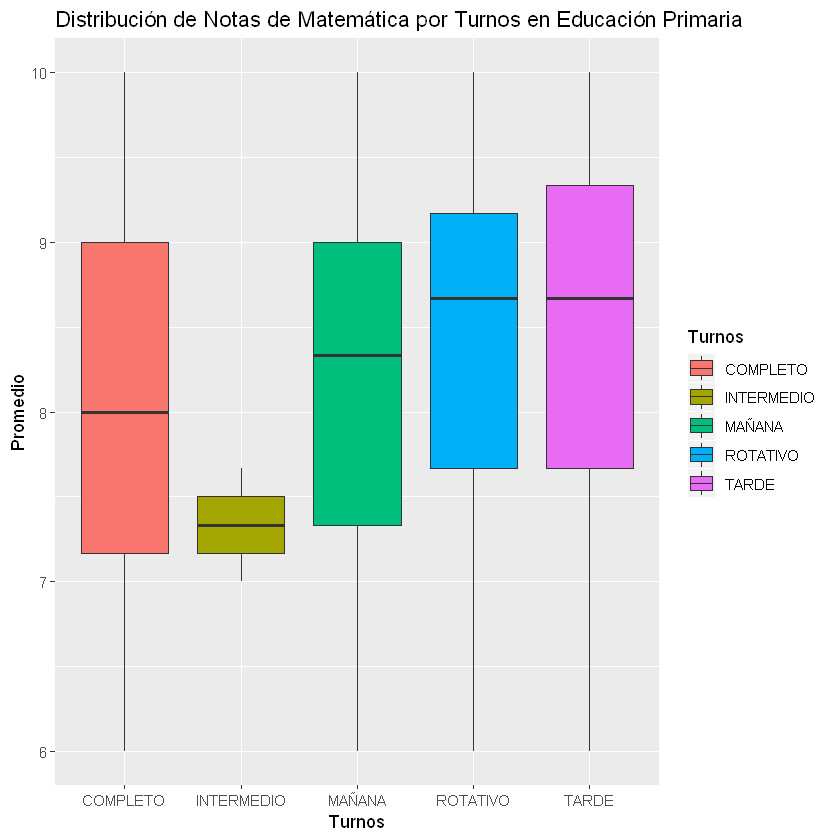

In [91]:
#g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad=='Primaria'),aes(factor(turno),Promedio))
#g2 + geom_boxplot(aes(fill = factor(turno))
para_nombres<- filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad=='Primaria')
Turnos <- factor(para_nombres$turno)

g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad=='Primaria'),aes(Turnos,Promedio))
g2 + 
  geom_boxplot(aes(fill = Turnos)) +
  labs(title = "Distribución de Notas de Matemática por Turnos en Educación Primaria")


### Secundaria

In [92]:
ftable(filter(dataset_mas_limpio, asignatura == "MATEMATICA" & Modalidad == "Secundaria")$turno)

 DIURNO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                              
     90   5645    15       11  1259         21

In [93]:
ftable(filter(dataset_mas_limpio, asignatura == "LENGUA Y LITERATURA" & Modalidad == "Secundaria")$turno)

 DIURNO MAÑANA NOCHE ROTATIVO TARDE VESPERTINO
                                              
     86   2818    52       11  1055         21

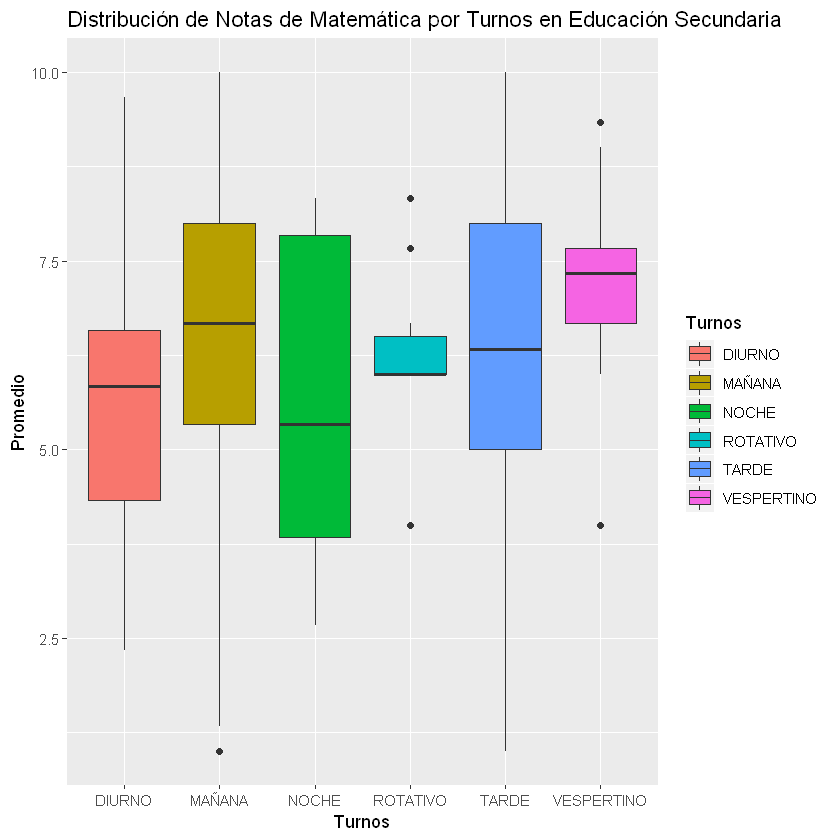

In [94]:
#g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad=='Secundaria'),aes(factor(turno),Promedio))
#g2 + geom_boxplot(aes(fill = factor(turno)))
v<- filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad=='Secundaria')
Turnos <- factor(v$turno)

g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad=='Secundaria'),aes(Turnos,Promedio))
g2 + 
  geom_boxplot(aes(fill = Turnos)) +
  labs(title = "Distribución de Notas de Matemática por Turnos en Educación Secundaria")

### Comparación de los promedios de lengua en distintos turnos

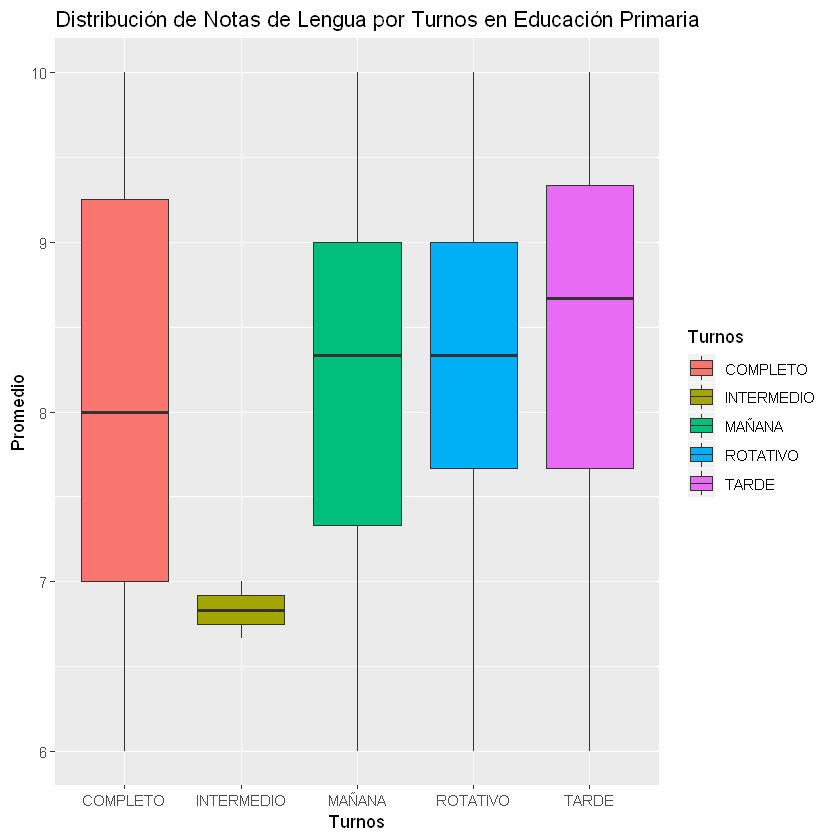

In [95]:
v<- filter(dataset_mas_limpio,asignatura=="LENGUA" & Modalidad=='Primaria')
Turnos <- factor(v$turno)

g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="LENGUA" & Modalidad=='Primaria'),aes(Turnos,Promedio))
g2 + 
  geom_boxplot(aes(fill = Turnos)) +
  labs(title = "Distribución de Notas de Lengua por Turnos en Educación Primaria")

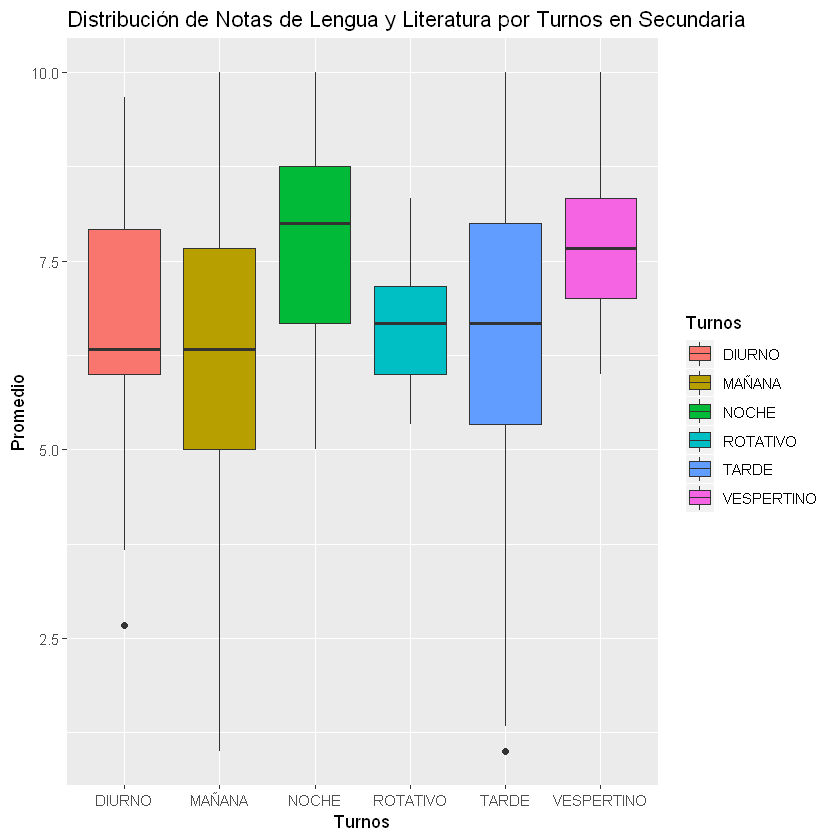

In [96]:
v<- filter(dataset_mas_limpio,asignatura=="LENGUA Y LITERATURA" & Modalidad=='Secundaria')
Turnos <- factor(v$turno)

g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="LENGUA Y LITERATURA" & Modalidad=='Secundaria'),aes(Turnos,Promedio))
g2 + 
  geom_boxplot(aes(fill = Turnos)) +
  labs(title = "Distribución de Notas de Lengua y Literatura por Turnos en Secundaria")

## Punto 6

[1] 884   3

[1] 861   3

Documento,Prom_Mat,EsPrivada,Prom_Bio,EsPrivada.y
34680594,4.666667,FALSE,5.333333,FALSE
46082290,6.666667,FALSE,6.333333,FALSE
46520307,4.000000,FALSE,7.000000,FALSE
46520314,2.000000,FALSE,3.333333,FALSE
46778660,3.000000,FALSE,5.333333,FALSE
46778660,4.000000,FALSE,5.333333,FALSE


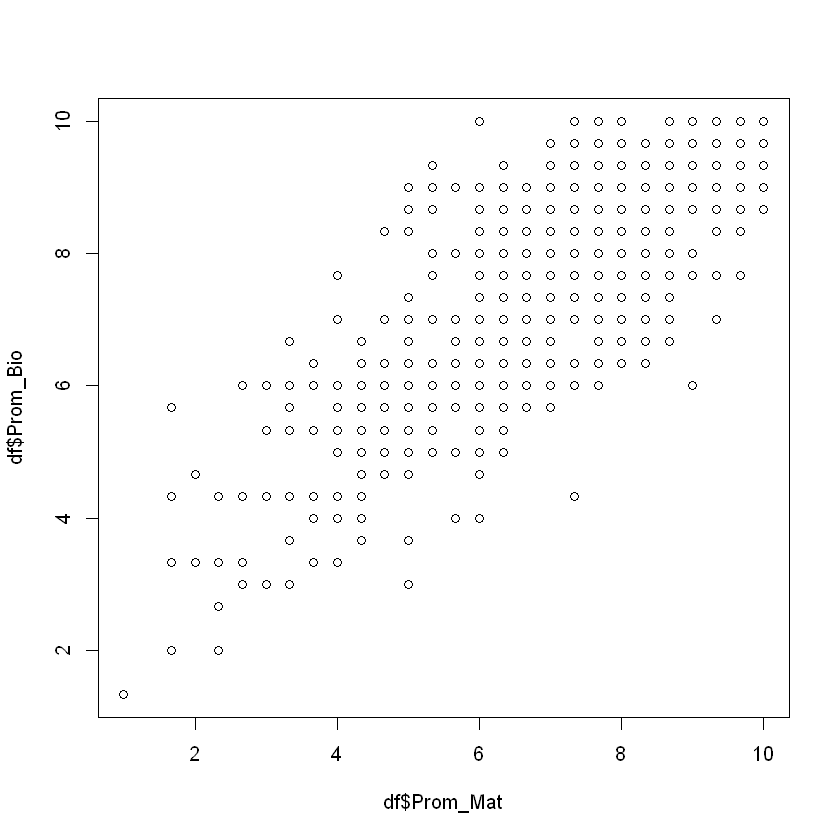

In [97]:
#diagrama de dispersión
#deben tener misma dimension
rm(df)
dim(dplyr::select(secundaria_Mat_1,"Documento","Promedio","EsPrivada"))
dim(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA" & AñoCursado == 1),"Documento","Promedio","EsPrivada"))
df<- dplyr::select(secundaria_Mat_1,"Documento","Promedio","EsPrivada") %>% inner_join(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA" & AñoCursado== 1),"Documento","Promedio","EsPrivada"),by="Documento")
df<-rename(df,Prom_Mat=Promedio.x, Prom_Bio=Promedio.y,EsPrivada=EsPrivada.x)
head(df)
plot(df$Prom_Mat, df$Prom_Bio)

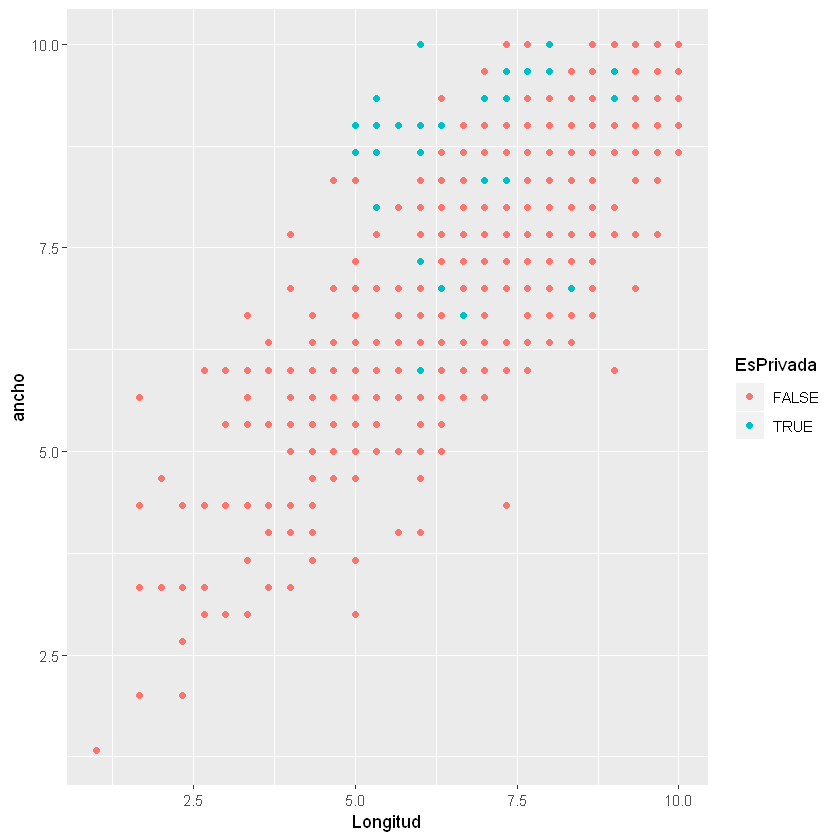

In [98]:
ggplot(data=df, aes(x=Prom_Mat,y=Prom_Bio))+geom_point(aes(colour=EsPrivada)
)+xlab("Longitud")+ylab("ancho")

### Diagrama de dispersión para todos los años de secundaria de matematica vs biologia

[1] 6998    2

[1] 5884    2

Documento,Prom_Mat,AñoCursado,Prom_Bio,AñoCursado.y
34680594,4.666667,1,5.333333,1
41176268,6.000000,5,6.000000,5
42580382,5.333333,5,6.666667,5
43340727,9.000000,5,6.666667,5
43534411,4.666667,3,3.333333,3
44103845,5.666667,5,9.000000,5


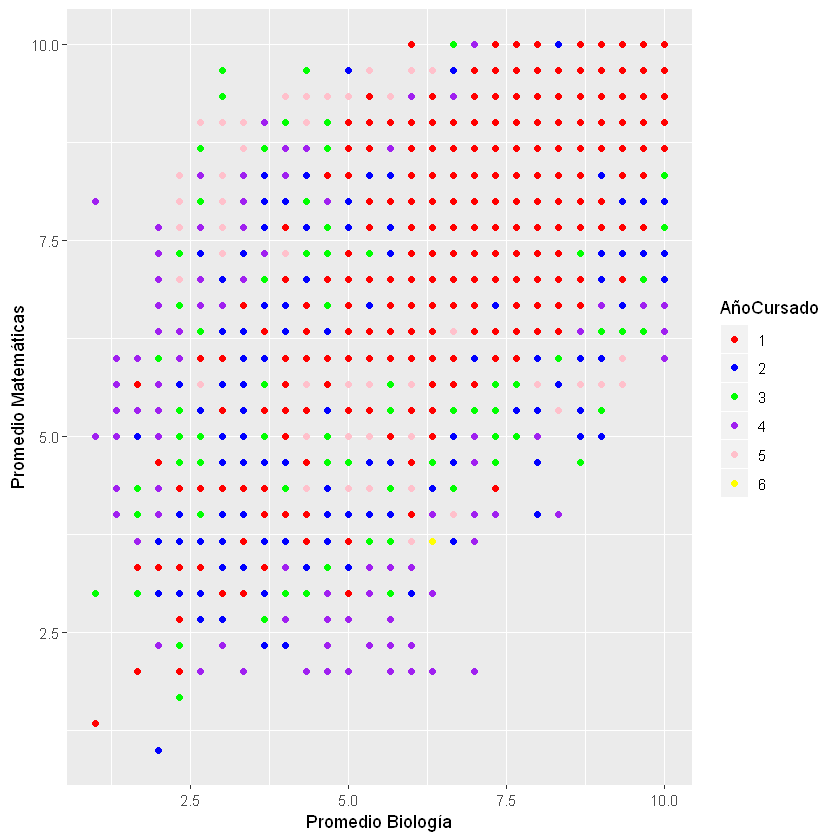

In [99]:
#diagrama de dispersión
#deben tener misma dimension
rm(df2)

secundaria_mat_todos_no_7 <- dplyr::filter(dataset_mas_limpio, asignatura == "MATEMATICA" & Modalidad == "Secundaria" & AñoCursado %in% c(1, 2, 3, 4, 5, 6))
dim(dplyr::select(secundaria_mat_todos_no_7,"Documento","Promedio"))
dim(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA"),"Documento","Promedio"))
df2<- dplyr::select(secundaria_mat_todos_no_7,"Documento","Promedio","AñoCursado") %>% inner_join(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA"),"Documento","Promedio","AñoCursado"),by="Documento")
df2<-rename(df2,Prom_Mat=Promedio.x, Prom_Bio=Promedio.y, AñoCursado=AñoCursado.x)
df2$AñoCursado <- as.factor(df2$AñoCursado)
head(df2)
ggplot(data=df2, aes(x=Prom_Mat,y=Prom_Bio))+ geom_point(aes(colour=AñoCursado)
)+xlab("Promedio Biología")+ylab("Promedio Matemáticas")+scale_color_manual(values = c("red", "blue", "green", "purple", "pink", "yellow"))

### Como observamos claramente, el año más prometedor para una posible correlación es primero. Por lo que a partir de este momento centraremos el estudio en este año.

In [100]:
df2_primero <- dplyr::filter(df2, AñoCursado == "1")
head(df2_primero)

Documento,Prom_Mat,AñoCursado,Prom_Bio,AñoCursado.y
34680594,4.666667,1,5.333333,1
46082290,6.666667,1,6.333333,1
46520307,4.000000,1,7.000000,1
46520314,2.000000,1,3.333333,1
46778660,3.000000,1,5.333333,1
46778660,4.000000,1,5.333333,1


### Graficamos nuevamamente solamente primer año

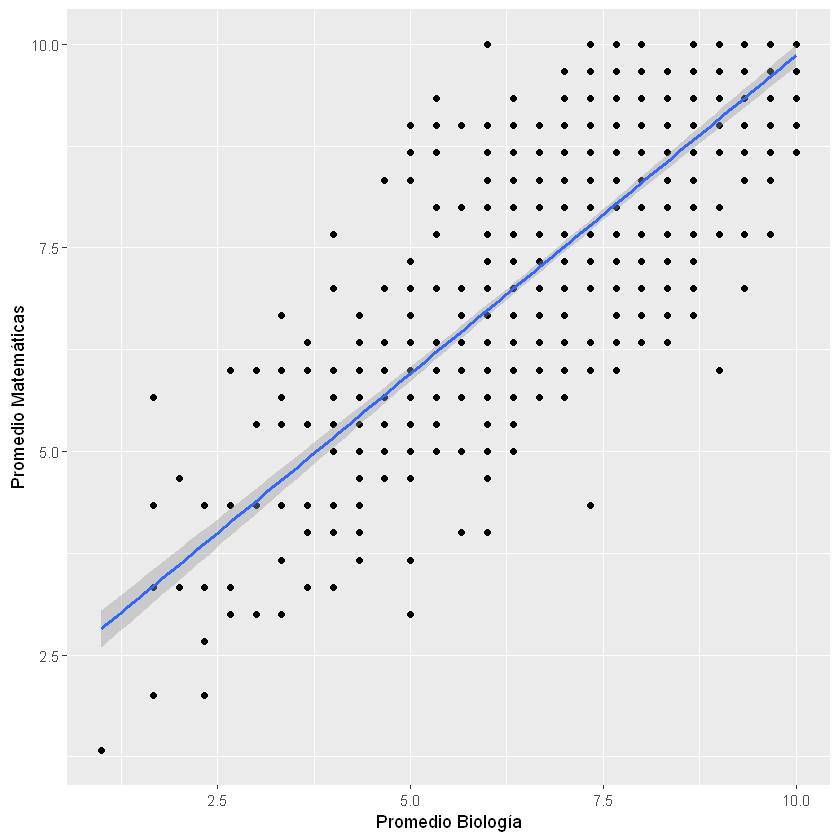

In [101]:
ggplot(data=df2_primero, aes(x=Prom_Mat,y=Prom_Bio))+geom_point()+ 
       geom_smooth(method = "lm")+xlab("Promedio Biología")+ylab("Promedio Matemáticas")

### Matriz de Varianza

In [102]:
dataM <- na.omit(data.frame(df2_primero$Prom_Mat, df2_primero$Prom_Bio)) 
dataM <-rename(dataM,Prom_Mat=df2_primero.Prom_Mat, Prom_Bio=df2_primero.Prom_Bio)
var(dataM)

,Prom_Mat,Prom_Bio
Prom_Mat,2.929701,2.290467
Prom_Bio,2.290467,2.763261


### Primero debemos verificar normalidad de las variables a utilizar, Prom_Mat y Prom_Bio
### Usamos Lilliefors (Kolmogorov-Smirnov) para realizarlo ya que nuestra muestra es mayor a 50

In [103]:
#conda install -c conda-forge r-nortest
library(nortest)
lillie.test(x = dataM$Prom_Mat)
lillie.test(x = dataM$Prom_Bio)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataM$Prom_Mat
D = 0.088996, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataM$Prom_Bio
D = 0.086081, p-value < 2.2e-16


### El p-value para ambas variables es menor a 0.05, lo que significa que rechazamos H0 y podemos decir que las variables no presentan una distribución normal, por lo que usaremos el método de Spearman para comprobar linealidad entre las mismas

In [104]:
cor_spearman <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "spearman")
cor_spearman

[1] 0.7804692

### Podemos ver gráficamente el resultado también

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



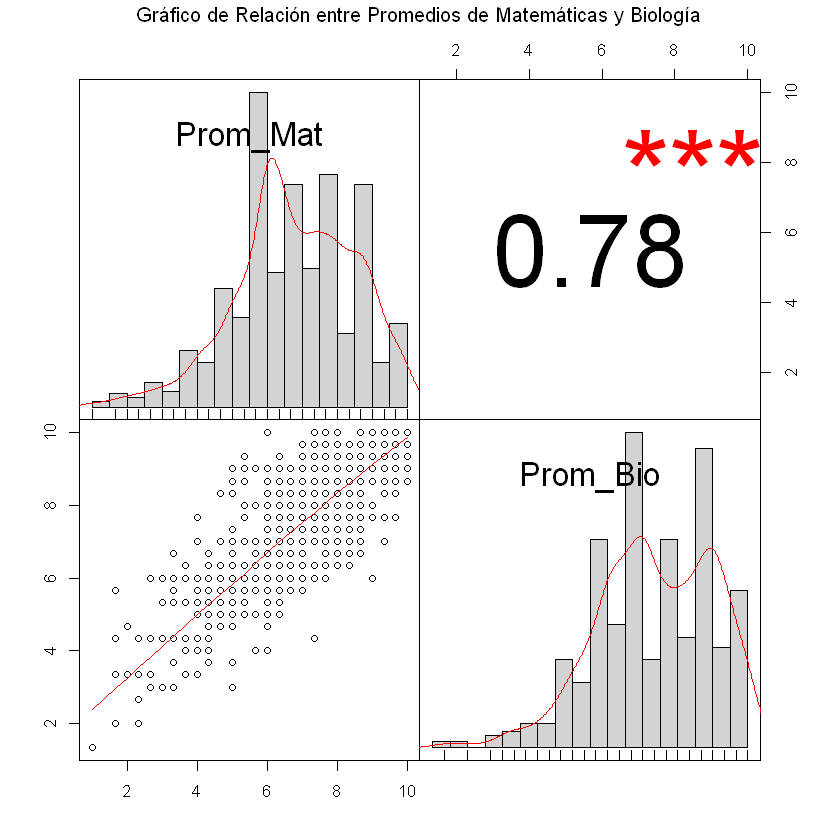

In [105]:
library("PerformanceAnalytics")
chart.Correlation(dataM, histogram = TRUE, method = "spearman")
mtext("Gráfico de Relación entre Promedios de Matemáticas y Biología", side=3, line=3)

### Podemos decir que las variables presentan una correlación buena, esto significa que si a un alumno le va bien en matemáticas, le irá bien en biología y lo mismo inversamente.

In [106]:
per <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "pearson")
ken <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "kendall")
spe <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "spearman")

data <- data.frame(name=c("pearson","kendall","spearman") , value=c(per,ken,spe))

data

name,value
pearson,0.8050104
kendall,0.6298612
spearman,0.7804692


corrplot 0.88 loaded


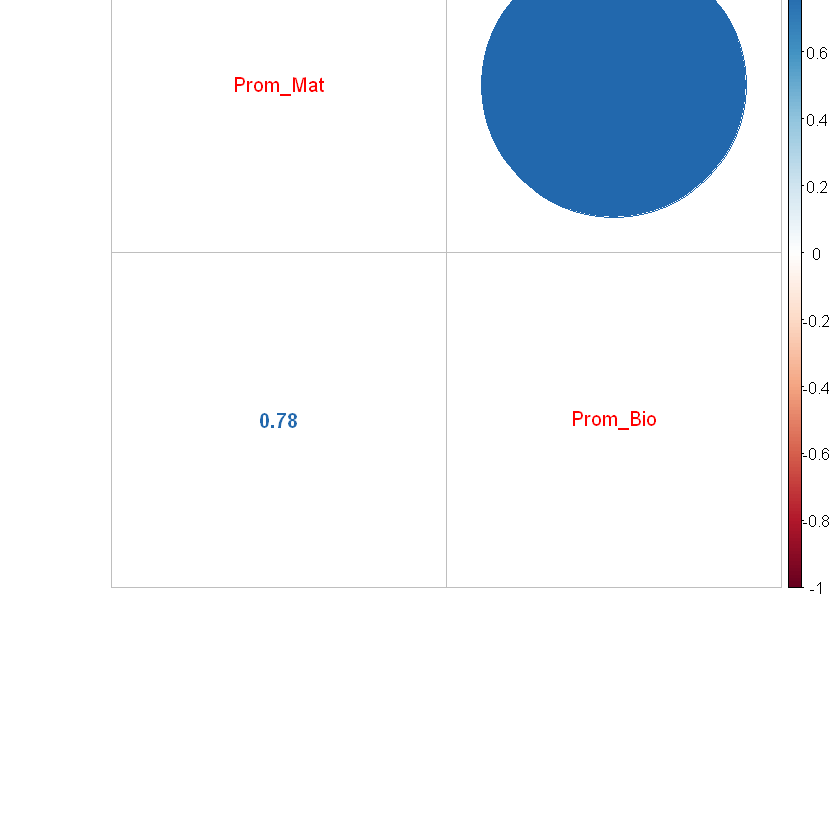

In [107]:
library(corrplot)
corrplot.mixed(cor(dataM, method = "spearman"),addshade="all")

### Añadimos lengua como tercera variable de estudio

In [108]:
rm(df3)
df3 <- dplyr::select(secundaria_len_1,"Documento","Promedio", "AñoCursado")

df2<- df2 %>% inner_join(df3,by="Documento")

In [109]:
dataN <-rename(df2,Prom_Len=Promedio)
dataN <- na.omit(dataN) 
dataN <-dplyr::select(dataN,Prom_Mat,Prom_Bio,Prom_Len)
dim(dataN)
head(dataN)

[1] 1148    3

Prom_Mat,Prom_Bio,Prom_Len
4.666667,5.333333,5.000000
6.666667,6.333333,5.333333
4.000000,7.000000,6.000000
2.000000,3.333333,3.666667
3.000000,5.333333,5.333333
3.000000,5.333333,5.333333


### Creamos una matriz de correlaciones para cada caso de estudio para verificar
### La primera para biología y matemática, y la segunda para biología, matemática y lengua y literatura.

In [110]:
library(ppcor)
pcor(dataM, method = c("spearman"))

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



,Prom_Mat,Prom_Bio
Prom_Mat,1.0000000,0.7804692
Prom_Bio,0.7804692,1.0000000
,Prom_Mat,Prom_Bio
Prom_Mat,0.000000e+00,1.344724e-186
Prom_Bio,1.344724e-186,0.000000e+00
,Prom_Mat,Prom_Bio
Prom_Mat,0.00000,37.53401
Prom_Bio,37.53401,0.00000


In [111]:
pcor(dataN, method = c("spearman"))

,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,1.0000000,0.3266264,0.4784281
Prom_Bio,0.3266264,1.0000000,0.5280509
Prom_Len,0.4784281,0.5280509,1.0000000
,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,0.000000e+00,6.389809e-30,1.159734e-66
Prom_Bio,6.389809e-30,0.000000e+00,2.358793e-83
Prom_Len,1.159734e-66,2.358793e-83,0.000000e+00
,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,0.00000,11.69369,18.43581
Prom_Bio,11.69369,0.00000,21.04079


### Observamos que agregando la materia de lengua y literatura al estudio, la correlación entre matemática y biología baja, por lo que podemos decir que lengua y literatura tiene influencia en el cálculo de la correlación de estas últimas

In [112]:
ggm::pcor(c("Prom_Mat","Prom_Bio","Prom_Len"), cov(dataN))
pcor1<-ggm::pcor(c("Prom_Mat","Prom_Bio","Prom_Len"), cov(dataN))

[1] 0.3925601

In [113]:
library("pwr")
pwr.r.test(n = length(row.names(dataN)), r = pcor1, sig.level = .05, power = NULL)



     approximate correlation power calculation (arctangh transformation) 

              n = 1148
              r = 0.3925601
      sig.level = 0.05
          power = 1
    alternative = two.sided


---

# Guia 5

### Actividad 1

In [114]:
dataset_secu_mat_5 <- filter(dataset_mas_limpio, AñoCursado == 3 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")

### Tipificación del promedio de tercer año de matemática

In [115]:
media_mat_c3=mean(dataset_secu_mat_5$Promedio, na.rm=TRUE)
media_mat_c3

[1] 6.230963

In [116]:
desvio_mat_c3=sd(dataset_secu_mat_5$Promedio, na.rm=TRUE)
desvio_mat_c3

[1] 1.982589

In [117]:
punto_z  <- (5-media_mat_c3)/desvio_mat_c3 
punto_z

[1] -0.6208866

### El estudiante de tercer año que obtuvo un 5 en matemática tiene una puntiación z de -0,62 lo que significa 
### que esta a la izquierda de la media pero aún se encuentra dentro del 50% de los datos

## Actividad 2

### seleccionamos dos escuelas con diferencias notorias de matriculas en primer año 

In [118]:
escuelas_primer_año <- filter(dataset_mas_limpio,AñoCursado == 1 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")

In [119]:
tabla <- ftable(escuelas_primer_año$CUE)
tabla

 6001904 6001912 6001922 6002172 6002178 6002220 6002222 6002732 6003776 6003782 6005300 6005302 6005384 6005388 6006402 6006732
                                                                                                                                
      19      57      20      93      57     144      90      65     117      72      11      44      36      40      11       8

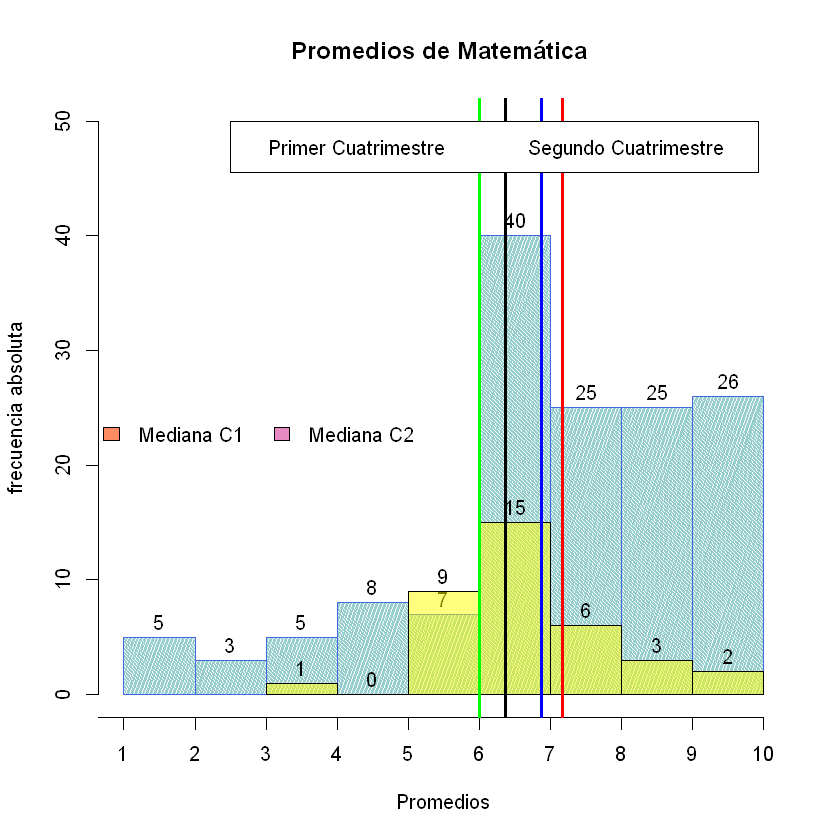

In [120]:
escuela_1 <- filter(escuelas_primer_año, CUE =="6002220")
escuela_2 <- filter(escuelas_primer_año, CUE =="6005384")

x <- escuela_1$Promedio # Primer grupo
y <- escuela_2$Promedio
hist(x, col="paleturquoise3",border="royalblue",breaks = "Sturges", ylim = c(0, 50),labels = TRUE,include.lowest=TRUE, right=FALSE,plot=TRUE,
     density=100,angle=70, xlab="Promedios", ylab="frecuencia absoluta", main="Promedios de Matemática ")


hist(y, add = TRUE, col = rgb(1, 1, 0, alpha = 0.5),labels = TRUE,include.lowest=TRUE, right=FALSE,plot=TRUE)
axis(1, at = 0:10)
mean_x <- mean(x,na.rm=TRUE)     
med_x <- median(x,na.rm=TRUE)   
mean_y <- mean(y,na.rm=TRUE)     
med_y <- median(y,na.rm=TRUE)   


# Ajustar las coordenadas de la leyenda
legend_x <- 2.5
legend_y <- 50
legend_offset <- 10  # Espacio entre la leyenda y las líneas

# Trazar las líneas con las nuevas coordenadas
abline(v = mean_x, col = 'blue', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))
abline(v = med_x, col = 'red', lwd = 3 ,ypd = c(mean_y, mean_y - legend_offset))
abline(v = mean_y, col = 'black', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))
abline(v = med_y, col = 'green', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))

# Trazar la leyenda
legend(x = legend_x, y = legend_y, c("Primer Cuatrimestre", "Segundo Cuatrimestre"), xpd = TRUE, horiz = TRUE, inset = c(0, 0.95))

legend(x = 0.45, y = 25, c("Mediana C1", "Mediana C2"),fill=c('#FC8D62','#E78AC3'),xpd = TRUE,horiz = TRUE,bty = "n")
#legend(x = 0.3, y = 20, c("Cant. 1° C = 104", "Cant. 2° C = 110"),xpd = TRUE,horiz = TRUE,bty = "n")


### Histograma superpuesto de frecuencias relativas

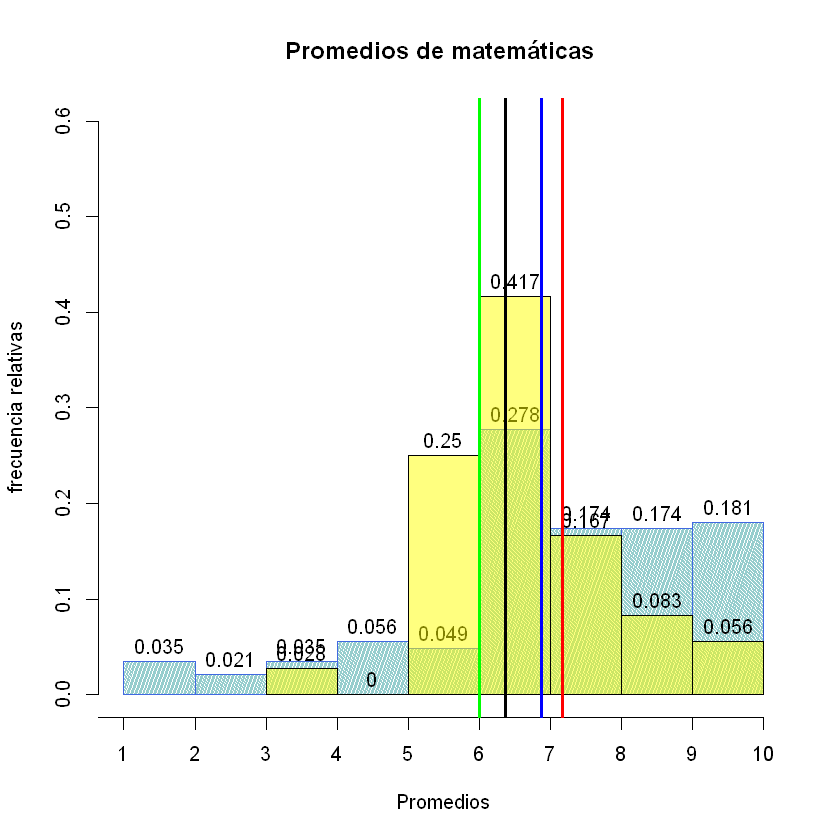

In [121]:
hist(x,probability = TRUE, col="paleturquoise3",border="royalblue",breaks = "Sturges", ylim = c(0, 0.6),
     labels = TRUE,include.lowest=TRUE, right=FALSE,plot=TRUE,
     density=100,angle=70, xlab="Promedios", ylab="frecuencia relativas", main="Promedios de matemáticas ")

hist(y,probability = TRUE, add = TRUE, col = rgb(1, 1, 0, alpha = 0.5),labels = TRUE,include.lowest=TRUE, right=FALSE,plot=TRUE)
axis(1, at = 0:10)
mean_x <- mean(x,na.rm=TRUE)     
med_x <- median(x,na.rm=TRUE)   
mean_y <- mean(y,na.rm=TRUE)     
med_y <- median(y,na.rm=TRUE)

# Ajustar las coordenadas de la leyenda
legend_x <- 2.5
legend_y <- 50
legend_offset <- 10  # Espacio entre la leyenda y las líneas

# Trazar las líneas con las nuevas coordenadas
abline(v = mean_x, col = 'blue', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))
abline(v = med_x, col = 'red', lwd = 3 ,ypd = c(mean_y, mean_y - legend_offset))
abline(v = mean_y, col = 'black', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))
abline(v = med_y, col = 'green', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))



### Tipificación de los promedios para ambas escuelas 

In [122]:
media_escuela_1 <- mean(escuela_1$Promedio, na.rm=TRUE)
media_escuela_2 <- mean(escuela_2$Promedio, na.rm=TRUE)
desvio_escuela_1 <- sd(escuela_1$Promedio, na.rm=TRUE)
desvio_escuela_2 <- sd(escuela_2$Promedio, na.rm=TRUE)

In [123]:
escuela_1_tipi <- mutate(escuela_1, Promedio_Z = (Promedio-media_escuela_1)/desvio_escuela_1)
escuela_2_tipi <- mutate(escuela_2,Promedio_Z=(Promedio-media_escuela_2)/desvio_escuela_2)

### Histograma superpuesto tipificados

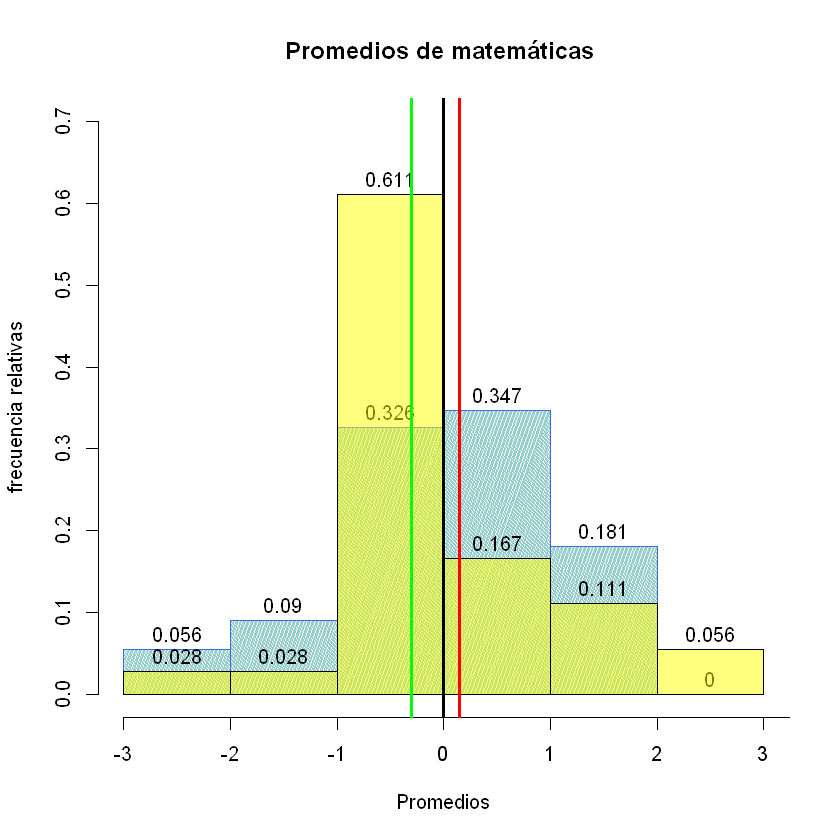

In [124]:
x <- escuela_1_tipi$Promedio_Z
y <- escuela_2_tipi$Promedio_Z
hist(x,probability = TRUE, col="paleturquoise3",border="royalblue",breaks = c(-3:3), ylim = c(0, 0.7),labels = TRUE,include.lowest=TRUE, right=FALSE,plot=TRUE,
     density=100,angle=70, xlab="Promedios", ylab="frecuencia relativas", main="Promedios de matemáticas ")

hist(y,probability = TRUE, add = TRUE,breaks = c(-3:3) ,col = rgb(1, 1, 0, alpha = 0.5),labels = TRUE,include.lowest=TRUE, right=FALSE,plot=TRUE)
axis(1, at = 0:10)
mean_x <- mean(x,na.rm=TRUE)     
med_x <- median(x,na.rm=TRUE)   
mean_y <- mean(y,na.rm=TRUE)     
med_y <- median(y,na.rm=TRUE)
# Ajustar las coordenadas de la leyenda
legend_x <- 2.5
legend_y <- 50
legend_offset <- 10  # Espacio entre la leyenda y las líneas

# Trazar las líneas con las nuevas coordenadas
abline(v = mean_x, col = 'blue', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))
abline(v = med_x, col = 'red', lwd = 3 ,ypd = c(mean_y, mean_y - legend_offset))
abline(v = mean_y, col = 'black', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))
abline(v = med_y, col = 'green', lwd = 3, ypd = c(mean_y, mean_y - legend_offset))





### Observado el histograma tipificado se puede decir  que la escuela 1 tiene mayor concentración por encima de la media en el 50% de los datos.
### En otra observación, en los datos que estan muy por debajo de la media la escuela 1 presenta mayor concentración. 
###  Mientras que en los datos que estan muy por encima de la media, la escuela 2 tiene mayor concentración.

## Actividad 3

### NOTA: 3.4 es mediana no media

## 3.1)

### La variable aleatoria de interés para esta prueba es el promedio 
### H0: La media del promedio de primer año de las notas de matemática es mayor a 7
### Ha: La media del promedio de primer año de las notas de matemática no es mayor a 7

### La prueba que se va a realidad consiste en comparación de medias  
### Es una prueba de cola izquierda

### Supuesto de normalidad, usamos lilliefors porque el dataset tiene más de 50 datos.

In [125]:
lillie.test(x = escuelas_primer_año$Promedio)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  escuelas_primer_año$Promedio
D = 0.080001, p-value = 1.294e-14


### El p-value del supuesto de normalidad es menor a 0,05, por lo que rechazamos la normalidad
### y debemos utilizar un test no parametrico

In [126]:
wilcox.test(x = escuelas_primer_año$Promedio, alternative="less", mu=7, conf.level=0.95)


	Wilcoxon signed rank test with continuity correction

data:  escuelas_primer_año$Promedio
V = 158472, p-value = 0.005726
alternative hypothesis: true location is less than 7


### a. ¿Cuál es la variable aleatoria de interés para esta prueba?
###   H0: µ > 7
###   Ha: µ < 7
### b. En palabras, defina la hipótesis nula y alternativa.
###   H0: La media del promedio de primer año de las notas de matemática es mayor a 7
###   Ha: La media del promedio de primer año de las notas de matemática no es mayor a 7
### c. La prueba que se va a usar consiste en comparación de medias
### d. ¿Es una prueba de cola derecha, de cola izquierda o de dos colas?
###   Es una prueba de cola izquierda
###   e. Los datos no cumplen con los supuestos de normalidad por lo cual la
### prueba a usar será no paramétrica.
### f. El nivel de confianza es de: 95%
###   g. El valor del estadístico de la prueba es:  158472
###   h. El p valor obtenido es de: 0.005726
###   i. Por lo cual se concluye que: Se rechaza H0, por lo que se puede decir que la media es menor a 7
### Rta pregunta: No, no se puede afirmar que la media del departamento en las notas de Matemática de primer año estuvo por encima de 7.

## 3.2)

In [127]:
dataset_lengua_secundaria <- filter(dataset_mas_limpio, asignatura == "LENGUA Y LITERATURA" & Modalidad == "Secundaria")

### Usamos Lilliefors para la prueba de normalidad porque tenemos más de 30 datos.

In [128]:
lillie.test(x = dataset_lengua_secundaria$Promedio)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataset_lengua_secundaria$Promedio
D = 0.066708, p-value < 2.2e-16


### No cumple los supuestos de normalidad, usaremos el test no paramétrico de Wilcoxon

In [129]:
wilcox.test(x = dataset_lengua_secundaria$Promedio, altenative="greater", mu=6, conf.level=0.95)


	Wilcoxon signed rank test with continuity correction

data:  dataset_lengua_secundaria$Promedio
V = 4398973, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 6


### a. ¿Cuál es la variable aleatoria de interés para esta prueba?
###   H0: µ < 6
###   Ha: µ > 6
### b. En palabras, defina la hipótesis nula y alternativa.
###   H0: La mediana del promedio de las notas de lengua de todos los estudiantes es menor a 6
###   Ha: La mediana del promedio de las notas de lengua de todos los estudiantes es mayor a 6
### c. La prueba que se va a usar consiste en comparación de medianas
### d. ¿Es una prueba de cola derecha, de cola izquierda o de dos colas?
###   Es una prueba de cola derecha
###   e. Los datos no cumplen con los supuestos de normalidad por lo cual la
### prueba a usar será no paramétrica.
### f. El nivel de confianza es de: 95%
###   g. El valor del estadístico de la prueba es:  4398973
###   h. El p valor obtenido es de: 2.2*10^-16
###   i. Por lo cual se concluye que: Se rechaza H0, por lo que se puede decir que la mediana es mayor a 6
### Rta pregunta: No, el 50% de los estudiantes del departamente obtiene en Lengua notas superiores a 6

## 3.3)

In [130]:
dataset_primer_tercer_trim <- dplyr::filter_at(dataset_mas_limpio, vars(NotasPrimerT, NotasTercerT), all_vars(!is.na(.)))
dataset_primer_tercer_trim <- dplyr::filter_at(dataset_mas_limpio, vars(NotasPrimerT, NotasTercerT), all_vars(!is.na(.)))

mean(dataset_primer_tercer_trim$NotasPrimerT)
mean(dataset_primer_tercer_trim$NotasTercerT)

diferencias <- dataset_primer_tercer_trim$NotasTercerT - dataset_primer_tercer_trim$NotasPrimerT

[1] 7.501108

[1] 7.627755

### Verificamos normalidad

In [131]:
lillie.test(x = diferencias)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  diferencias
D = 0.20321, p-value < 2.2e-16


### No es normal, por lo que utilizaremos un test no parametrico

In [132]:
wilcox.test(x = dataset_primer_tercer_trim$NotasTercerT, y = dataset_primer_tercer_trim$NotasPrimerT, alternative = "two.sided", paired = TRUE, correct = FALSE)


	Wilcoxon signed rank test

data:  dataset_primer_tercer_trim$NotasTercerT and dataset_primer_tercer_trim$NotasPrimerT
V = 586782106, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


### a. ¿Cuál es la variable aleatoria de interés para esta prueba?
### µD = µ3 - µ1
###   H0: µD = 0
###   Ha: µD != 0
### b. En palabras, defina la hipótesis nula y alternativa.
###   H0: No hay diferencia significativa entre las medias de las notas del tercer trimestre y del primer trimestre
###   Ha: Hay diferencia significativa entre las medias de las notas del tercer trimestre y del primer trimestre
### c. La prueba que se va a usar consiste en diferencia de medias pareadas.
### d. ¿Es una prueba de cola derecha, de cola izquierda o de dos colas?
###   Es una prueba bilateral
###   e. Los datos no cumplen con los supuestos de normalidad por lo cual la
### prueba a usar será no paramétrica.
### f. El nivel de confianza es de: 95%
###   g. El valor del estadístico de la prueba es:  V = 591603901
###   h. El p valor obtenido es de: 2.2*10^-16
###   i. Por lo cual se concluye que: Se rechaza H0, por lo que se puede decir que existe diferencia significativa entre las medianas.
### Rta pregunta: Hay diferencia significativa entre las notas de los trimestres

## 3.4)

In [133]:
lillie.test(x = escuelas_primer_año$Promedio)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  escuelas_primer_año$Promedio
D = 0.080001, p-value = 1.294e-14


In [134]:
wilcox.test(x = escuelas_primer_año$Promedio, alternative="less", mu=7, conf.level=0.95)


	Wilcoxon signed rank test with continuity correction

data:  escuelas_primer_año$Promedio
V = 158472, p-value = 0.005726
alternative hypothesis: true location is less than 7


### a. ¿Cuál es la variable aleatoria de interés para esta prueba?
###   H0: x͂ > 7
###   Ha: x͂ < 7
### b. En palabras, defina la hipótesis nula y alternativa.
###   H0: La mediana del promedio de primer año de las notas de matemática es mayor a 7
###   Ha: La mediana del promedio de primer año de las notas de matemática no es mayor a 7
### c. La prueba que se va a usar consiste en comparación de medias
### d. ¿Es una prueba de cola derecha, de cola izquierda o de dos colas?
###   Es una prueba de cola izquierda
###   e. Los datos no cumplen con los supuestos de normalidad por lo cual la
### prueba a usar será no paramétrica.
### f. El nivel de confianza es de: 95%
###   g. El valor del estadístico de la prueba es:  158472
###   h. El p valor obtenido es de: 0.005726
###   i. Por lo cual se concluye que: Se rechaza H0, por lo que se puede decir que la mediana es menor a 7
### Rta pregunta: No, no se puede afirmar que la mediana del departamento en las notas de Matemática de primer año estuvo por encima de 7.

## 3.5)

In [135]:
turno_tarde <- filter(escuelas_primer_año, turno == 'TARDE')
turno_mñn <- filter(escuelas_primer_año, turno == 'MAÑANA')

In [136]:
mean(turno_tarde$Promedio)
mean(turno_mñn$Promedio)

diferencias_t <- turno_tarde$Promedio - turno_mñn$Promedio

[1] 6.763158

[1] 6.818356

In [137]:
lillie.test(x = diferencias_t)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  diferencias_t
D = 0.046479, p-value = 0.008998


In [138]:
wilcox.test(x = turno_tarde$Promedio, y = turno_mñn$Promedio, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  turno_tarde$Promedio and turno_mñn$Promedio
W = 89188, p-value = 0.9456
alternative hypothesis: true location shift is not equal to 0


### a. ¿Cuál es la variable aleatoria de interés para esta prueba?
### 
###   H0: µTM = µTD 
###   Ha: µTM != µTD
### b. En palabras, defina la hipótesis nula y alternativa.
###   H0: No hay diferencia significativa entre las medias de las notas de Matemática de primer año del turno tarde y mañana
###   Ha: Hay diferencia significativa entre las medias de lasnotas de Matemática de primer año del turno tarde y mañana
### c. La prueba que se va a usar consiste en diferencia de medias independientes.
### d. ¿Es una prueba de cola derecha, de cola izquierda o de dos colas?
###   Es una prueba bilateral
###   e. Los datos no cumplen con los supuestos de normalidad por lo cual la
### prueba a usar será no paramétrica.
### f. El nivel de confianza es de: 95%
###   g. El valor del estadístico de la prueba es:  W = 89188
###   h. El p valor obtenido es de: 0,9456
###   i. Por lo cual se concluye que: No se rechaza H0, por lo que se puede decir que no existe diferencia significativa.

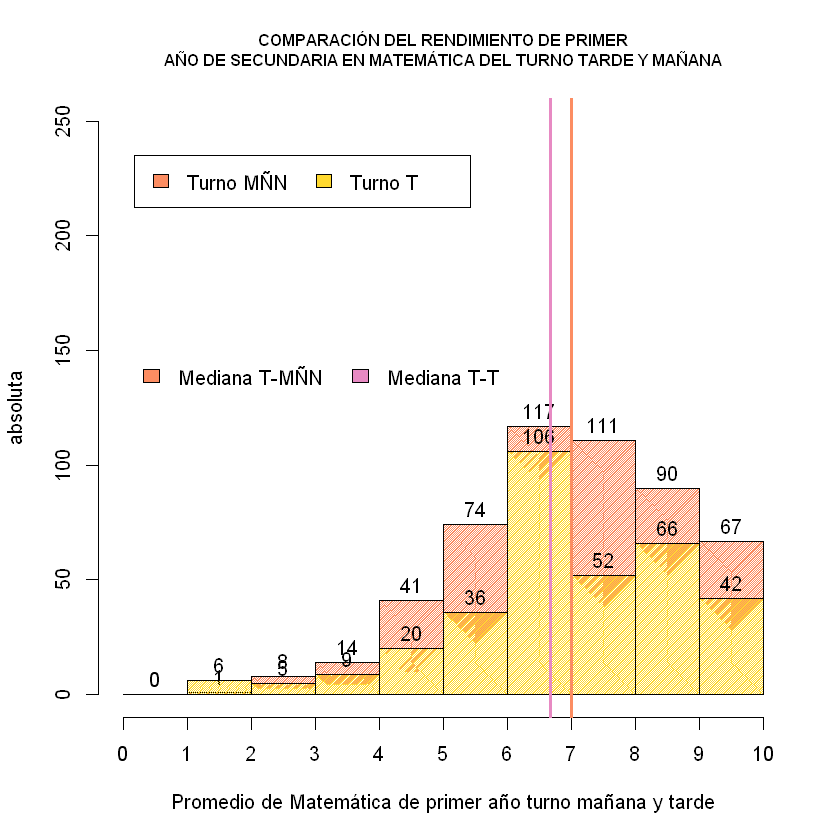

In [139]:
hist(turno_mñn$Promedio, col='#FC8D62',border='black', breaks
=c(0,1,2,3,4,5,6,7,8,9,10),xaxp=c(0,10,1),
ylim = c(0, 250),labels = TRUE,
include.lowest=TRUE, right=FALSE,
plot=TRUE,density=100, xlab="Promedio de Matemática de primer año turno mañana y tarde", ylab="frecuencia
absoluta", main="COMPARACIÓN DEL RENDIMIENTO DE PRIMER
AÑO DE SECUNDARIA EN MATEMÁTICA DEL TURNO TARDE Y MAÑANA",
cex.main=0.82)

axis(1, at = 0:10)

hist(turno_tarde$Promedio, breaks
=c(0,1,2,3,4,5,6,7,8,9,10),xaxp=c(0,10,1),
border='black',
ylim = c(0, 250),labels = TRUE,
include.lowest=TRUE, right=FALSE,
add = TRUE, col = '#FFD92F',density=100)
legend(x = 0.16, y = 235, c("Turno MÑN", "Turno T"), fill=c('#FC8D62', '#FFD92F'),xpd = TRUE,horiz =
TRUE,inset = c(0.15,0.85))

mean <- median(turno_mñn$Promedio,na.rm=TRUE)
med <- median(turno_tarde$Promedio)
abline(v = mean, col = '#FC8D62',lwd = 3)
abline(v = med, col = '#E78AC3',lwd = 3)
legend(x = 0.01, y = 150, c("Mediana T-MÑN","Mediana T-T"),
fill=c('#FC8D62','#E78AC3'),xpd = TRUE,horiz = TRUE,bty = "n")


## 3.6)

In [140]:
primer_año_leng <- filter(dataset_mas_limpio, asignatura=="LENGUA Y LITERATURA" & AñoCursado ==1)
mean(escuelas_primer_año$Promedio)
mean(primer_año_leng$Promedio)
diferencia_mat_y_leng <- escuelas_primer_año$Promedio - primer_año_leng$Promedio

[1] 6.797888

[1] 6.946996

In [141]:
lillie.test(x = diferencia_mat_y_leng)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  diferencia_mat_y_leng
D = 0.052668, p-value = 4.671e-06


In [142]:
wilcox.test(x = escuelas_primer_año$Promedio, y = primer_año_leng$Promedio, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  escuelas_primer_año$Promedio and primer_año_leng$Promedio
W = 360502, p-value = 0.1557
alternative hypothesis: true location shift is not equal to 0


### a. ¿Cuál es la variable aleatoria de interés para esta prueba?
###   H0: µM = µL
###   Ha: µM != µL
### b. En palabras, defina la hipótesis nula y alternativa.
###   H0: No hay diferencia significativa entre las medias de las notas de Matemática y Lengua de primer año 
###   Ha: Hay diferencia significativa entre las medias de las notas de Matemática y Lengua de primer año
### c. La prueba que se va a usar consiste en diferencia de medias independientes.
### d. ¿Es una prueba de cola derecha, de cola izquierda o de dos colas?
###   Es una prueba bilateral
###   e. Los datos no cumplen con los supuestos de normalidad por lo cual la
### prueba a usar será no paramétrica.
### f. El nivel de confianza es de: 95%
###   g. El valor del estadístico de la prueba es:  W = 360502
###   h. El p valor obtenido es de: 0,1557
###   i. Por lo cual se concluye que: No se rechaza H0, por lo que se puede decir que no existe diferencia significativa.

## Actividad 4

### Comparamos el rendimiento en Matemática para escuelas privadas y publicas

In [143]:
escu_publica <- filter(escuelas_primer_año, EsPrivada == FALSE)
escu_privada <- filter(escuelas_primer_año, EsPrivada == TRUE)
mean(escu_publica$Promedio)
mean(escu_privada$Promedio)

diferencias_PP <- escu_publica$Promedio - escu_privada$Promedio

[1] 6.705519

[1] 7.338501

In [144]:
lillie.test(x= diferencias_PP)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  diferencias_PP
D = 0.042366, p-value = 0.002677


In [145]:
wilcox.test(x = escu_publica$Promedio, y = escu_privada$Promedio, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  escu_publica$Promedio and escu_privada$Promedio
W = 38553, p-value = 0.0001486
alternative hypothesis: true location shift is not equal to 0


### a. ¿Cuál es la variable aleatoria de interés para esta prueba?
###   H0: µPu = µPV
###   Ha: µPu != µPV
### b. En palabras, defina la hipótesis nula y alternativa.
###   H0: No hay diferencia significativa entre las medias de las notas de Matemática de primer año para escuelas publicas y privadas 
###   Ha: Hay diferencia significativa entre las medias de las notas de Matemática de primer año para escuelas publicas y privadas
### c. La prueba que se va a usar consiste en diferencia de medias independientes.
### d. ¿Es una prueba de cola derecha, de cola izquierda o de dos colas?
###   Es una prueba bilateral
###   e. Los datos no cumplen con los supuestos de normalidad por lo cual la
### prueba a usar será no paramétrica.
### f. El nivel de confianza es de: 95%
###   g. El valor del estadístico de la prueba es:  W = 38553
###   h. El p valor obtenido es de: 0,0001486
###   i. Por lo cual se concluye que: Se rechaza H0, por lo que se puede decir que existe diferencia significativa.

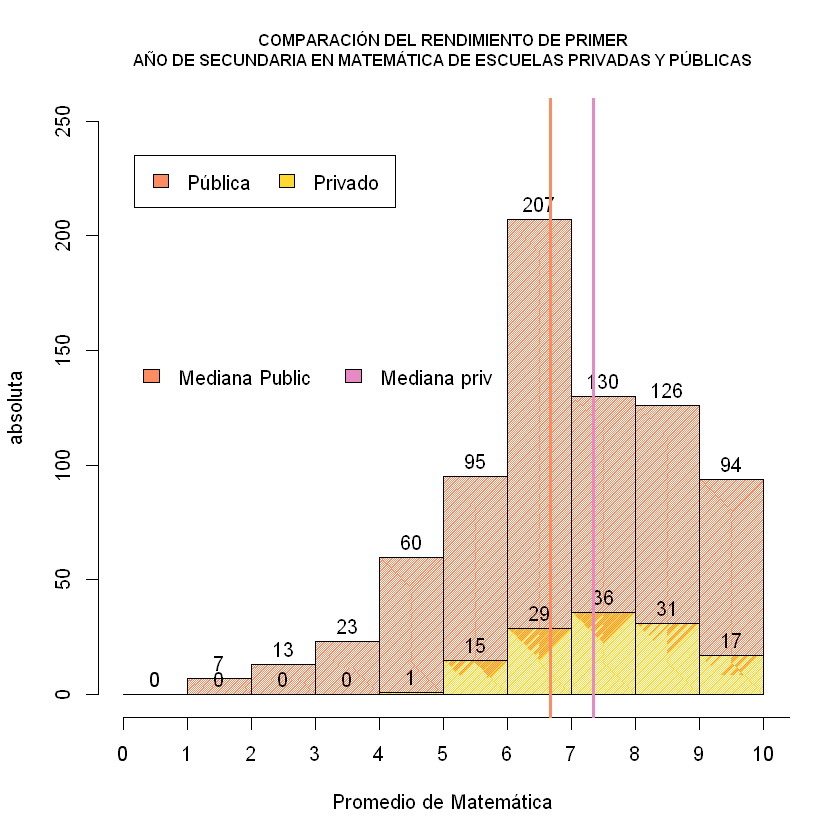

In [146]:
hist(escu_publica$Promedio, col='#FC8D62',border='black', breaks
=c(0,1,2,3,4,5,6,7,8,9,10),xaxp=c(0,100,10),
ylim = c(0, 250),labels = TRUE,
include.lowest=TRUE, right=FALSE,
plot=TRUE,density=100, xlab="Promedio de Matemática", ylab="frecuencia
absoluta", main="COMPARACIÓN DEL RENDIMIENTO DE PRIMER
AÑO DE SECUNDARIA EN MATEMÁTICA DE ESCUELAS PRIVADAS Y PÚBLICAS",
cex.main=0.82)
axis(1, at = 0:10)

hist(escu_privada$Promedio, breaks
=c(0,1,2,3,4,5,6,7,8,9,10),xaxp=c(0,100,10),
border='black',
ylim = c(0, 250),labels = TRUE,
include.lowest=TRUE, right=FALSE,
add = TRUE, col = '#FFD92F',density=100)
legend(x = 0.16, y = 235, c("Pública", "Privado"), fill=c('#FC8D62', '#FFD92F'),xpd = TRUE,horiz =
TRUE,inset = c(0.25,0.85))

mean <- median(escu_publica$Promedio,na.rm=TRUE)
med <- median(escu_privada$Promedio,na.rm=TRUE)
abline(v = mean, col = '#FC8D62',lwd = 3)
abline(v = med, col = '#E78AC3',lwd = 3)
legend(x = 0.01, y = 150, c("Mediana Public","Mediana priv"),
fill=c('#FC8D62','#E78AC3'),xpd = TRUE,horiz = TRUE,bty = "n")
legend(x = -10, y = 28, c("Cant. 1° C = 104", "Cant. 2° C = 110"),
xpd = TRUE,horiz = TRUE,bty = "n")

---

# Guia 6

### 1) A partir del dataset de todas las secundarias y teniendo en cuenta el departamento asignado,
### analiza si la matrícula del ciclo básico difiere significativamente de la del ciclo orientado.

In [147]:
archivo <- read.csv('./dataset_secundaria_completo.csv',sep=',',encoding = "UTF-8")

In [148]:
str(archivo)

'data.frame':	572 obs. of  21 variables:
 $ Cue_Anexo          : int  600003600 600035000 600046400 600067800 600093400 600110200 600135200 600175800 600190400 600192200 ...
 $ Nivel              : Factor w/ 1 level "Secundaria": 1 1 1 1 1 1 1 1 1 1 ...
 $ Modalidad_Educ_Gral: Factor w/ 1 level "Común": 1 1 1 1 1 1 1 1 1 1 ...
 $ Cue                : int  6000036 6000350 6000464 6000678 6000934 6001102 6001352 6001758 6001904 6001922 ...
 $ Estado             : Factor w/ 1 level "Activo": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sector             : Factor w/ 3 levels "ESTATAL","GESTION SOCIAL",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Departamento       : Factor w/ 9 levels "","COLON","DIAMANTE",..: 1 1 4 1 9 1 1 8 6 6 ...
 $ NINA               : Factor w/ 2 levels "no","No": 1 1 1 1 1 1 1 1 1 1 ...
 $ Cant_Secciones     : int  18 6 13 17 37 14 6 9 6 6 ...
 $ Tipo_titulo        : Factor w/ 4 levels "Ciclo básico agrario",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Primero            : int  67 16 65 35 96 60 9 32 15 21 ...

In [149]:
ftable(archivo$Departamento)

     COLON DIAMANTE FEDERACION GUALEGUAY LA PAZ NOGOYA VICTORIA VILLAGUAY
                                                                         
 354    29       26         25        34     22     30       26        26

In [150]:
bd_completa_secu <- filter(archivo, Departamento == "LA PAZ" )

In [151]:
head(bd_completa_secu)

Cue_Anexo,Nivel,Modalidad_Educ_Gral,Cue,Estado,Sector,Departamento,NINA,Cant_Secciones,Tipo_titulo,...,Segundo,Tercero,Cuarto,Quinto,Sexto,Septimo,Mat_ciclo_basico,Mat_ciclo_orientado,Matricula_Total,Titulo
600190400,Secundaria,Común,6001904,Activo,ESTATAL,LA PAZ,no,6,Ciclo básico/ educación secundaria básica,...,20,24,30,24,40,0,59,94,153,Bachiller con orientación en economía y administración; Bachiller con orientación en economía y administración
600192200,Secundaria,Común,6001922,Activo,ESTATAL,LA PAZ,no,6,Ciclo básico/ educación secundaria básica,...,25,16,30,16,30,0,62,76,138,Bachiller con orientación en economía y administración; Bachiller con orientación en economía y administración
600222000,Secundaria,Común,6002220,Activo,ESTATAL,LA PAZ,no,41,Ciclo básico/ educación secundaria básica,...,163,141,250,260,184,0,455,694,1149,Bachiller con orientación en economía y administración; Bachiller con orientación en economía y administración
600377600,Secundaria,Común,6003776,Activo,ESTATAL,LA PAZ,no,24,Ciclo básico/ educación secundaria básica,...,127,110,132,108,117,0,356,357,713,Bachiller con orientación en ciencias sociales y humanidades; Bachiller en ciencias naturales
600530000,Secundaria,Común,6005300,Activo,ESTATAL,LA PAZ,no,6,Ciclo básico/ educación secundaria básica,...,17,11,12,8,8,0,39,28,67,Bachiller con orientación en economía y administración; Bachiller con orientación en economía y administración
600530200,Secundaria,Común,6005302,Activo,ESTATAL,LA PAZ,no,12,Ciclo básico/ educación secundaria básica,...,62,57,42,48,41,0,184,131,315,Bachiller en ciencias sociales


In [152]:
media_ciclo_basico<- sum(bd_completa_secu$Mat_ciclo_basico)
media_ciclo_orientado <- sum(bd_completa_secu$Mat_ciclo_orientado)
datos_dif_ciclo<- data.frame(
        GroupID=as.factor(c(rep("basico", length(bd_completa_secu$Mat_ciclo_basico)), rep("orientado", length(bd_completa_secu$Mat_ciclo_orientado)))),
        DV=c(as.numeric(bd_completa_secu$Mat_ciclo_basico), as.numeric(bd_completa_secu$Mat_ciclo_orientado)))
datos_dif_ciclo

GroupID,DV
basico,59
basico,62
basico,455
basico,356
basico,39
basico,184
basico,137
basico,156
basico,113
basico,200


In [153]:
N <-na.omit(datos_dif_ciclo)
N

,GroupID,DV
1,basico,59
2,basico,62
3,basico,455
4,basico,356
5,basico,39
6,basico,184
7,basico,137
8,basico,156
9,basico,113
10,basico,200


### miramos si los datos son normales para ambos grupos

In [154]:

lillie.test(x = bd_completa_secu$Mat_ciclo_basico)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  bd_completa_secu$Mat_ciclo_basico
D = 0.15138, p-value = 0.2109


In [155]:
lillie.test(x= bd_completa_secu$Mat_ciclo_orientado)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  bd_completa_secu$Mat_ciclo_orientado
D = 0.21234, p-value = 0.03113


### Aplicando el test de Lilliefors vemos que ciclo orientado tiene un p valor menor a 0,05 por lo que no es normal

### Aplicamos el test para no parametricos

In [156]:
head(N)

GroupID,DV
basico,59
basico,62
basico,455
basico,356
basico,39
basico,184


In [157]:
wilcox.test(DV~GroupID,N, alternative = "two.sided",conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  DV by GroupID
W = 192.5, p-value = 0.8919
alternative hypothesis: true location shift is not equal to 0


### Como el p-value es mayor a 0,05 no podemos rechazar H0: Las medias son iguales

### 2) Haciendo uso del mismo dataset contrasta si la matrícula del departamento asignado
### es similar en los diferentes años del nivel.
### A. Explora los datos de la muestra mediante gráficos y descriptivos. ¿Observamos
### diferencias en los valores promedios y de variabilidad por grupos? 

In [158]:
cursos <- as.factor(c(rep("Primero",length(bd_completa_secu$Primero)),rep("Segundo",length(bd_completa_secu$Segundo)),rep("Tercero",length(bd_completa_secu$Tercero)),rep("Cuarto",length(bd_completa_secu$Cuarto)),rep("Quinto",length(bd_completa_secu$Quinto)),rep("Sexto",length(bd_completa_secu$Sexto))))
matriculas <- as.numeric(c(bd_completa_secu$Primero,bd_completa_secu$Segundo,bd_completa_secu$Tercero,bd_completa_secu$Cuarto,bd_completa_secu$Quinto,bd_completa_secu$Sexto))
data_bp <- na.omit(data.frame(cursos, matriculas))
head(data_bp,30)

,cursos,matriculas
1,Primero,15
2,Primero,21
3,Primero,151
4,Primero,119
5,Primero,11
6,Primero,65
7,Primero,44
8,Primero,53
9,Primero,40
10,Primero,67


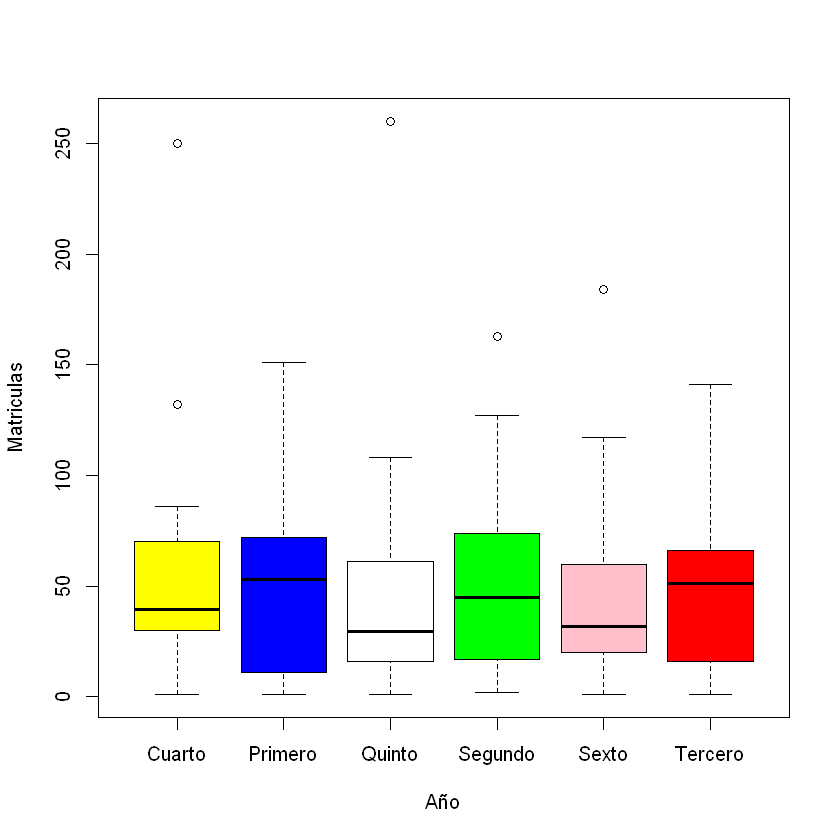

In [159]:
boxplot(data_bp$matriculas ~ data_bp$cursos, col = c("yellow", "blue", "white","green", "pink", "red", "brown"), ylab = "Matriculas", xlab="Año")

### B) Realiza un test F (ANOVA) para comparar las medias de las poblaciones. 
### Cuales serian las hipotesis nula y alternativa?

### Hipotesis nula: No hay diferencias significativas entre las medias
### Hipotesis alternativa: Hay diferencias significativas entre al menos dos de las medias

In [160]:
data_bp %>% group_by(cursos) %>%
    summarise(mean = round(mean(matriculas),1), datos = n())

cursos,mean,datos
Cuarto,57.6,18
Primero,50.8,21
Quinto,49.2,18
Segundo,49.0,22
Sexto,45.5,18
Tercero,47.6,21


In [161]:
fm = aov(data_bp$matriculas ~ data_bp$cursos)

In [162]:
summary(fm)

                Df Sum Sq Mean Sq F value Pr(>F)
data_bp$cursos   5   1557   311.5   0.137  0.983
Residuals      112 254398  2271.4               

### Potencia del test

In [163]:
ftable(data_bp$cursos)

 Cuarto Primero Quinto Segundo Sexto Tercero
                                            
     18      21     18      22    18      21

In [164]:
pwr.anova.test(k =6 , n =18 , f =0.2 , sig.level =0.05 )


     Balanced one-way analysis of variance power calculation 

              k = 6
              n = 18
              f = 0.2
      sig.level = 0.05
          power = 0.2984616

NOTE: n is number in each group


### Como el p valor es mayor a 0,05 no rechazamos la hipotesis nula y concluimos que no hay diferencias significativas 

### Supuestos

In [165]:
lillie.test(data_bp$matriculas[data_bp$cursos == 'Primero'])
lillie.test(data_bp$matriculas[data_bp$cursos == 'Segundo'])
lillie.test(data_bp$matriculas[data_bp$cursos == 'Cuarto'])
lillie.test(data_bp$matriculas[data_bp$cursos == 'Quinto'])
lillie.test(data_bp$matriculas[data_bp$cursos == 'Sexto'])


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_bp$matriculas[data_bp$cursos == "Primero"]
D = 0.1354, p-value = 0.4014



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_bp$matriculas[data_bp$cursos == "Segundo"]
D = 0.13774, p-value = 0.3409



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_bp$matriculas[data_bp$cursos == "Cuarto"]
D = 0.22049, p-value = 0.02081



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_bp$matriculas[data_bp$cursos == "Quinto"]
D = 0.25763, p-value = 0.002598



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_bp$matriculas[data_bp$cursos == "Sexto"]
D = 0.26274, p-value = 0.001891



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  fm$residuals
D = 0.13424, p-value = 1.917e-05


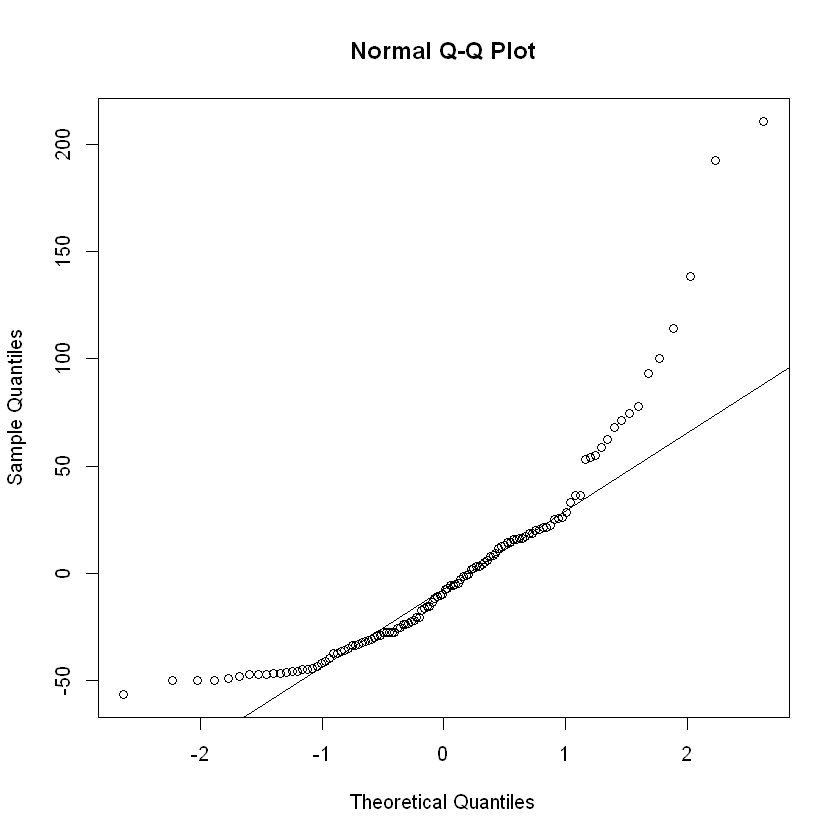

In [166]:
qqnorm(fm$residuals) 
qqline(fm$residuals)
lillie.test(fm$residuals)

In [167]:
TukeyHSD(fm, "data_bp$cursos", conf.level = .95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data_bp$matriculas ~ data_bp$cursos)

$`data_bp$cursos`
                       diff       lwr      upr     p adj
Primero-Cuarto   -6.7460317 -51.13564 37.64358 0.9978492
Quinto-Cuarto    -8.3888889 -54.45416 37.67638 0.9949360
Segundo-Cuarto   -8.5555556 -52.47707 35.36596 0.9930686
Sexto-Cuarto    -12.0555556 -58.12083 34.00972 0.9737160
Tercero-Cuarto   -9.9365079 -54.32612 34.45310 0.9868859
Quinto-Primero   -1.6428571 -46.03247 42.74675 0.9999980
Segundo-Primero  -1.8095238 -43.97026 40.35121 0.9999957
Sexto-Primero    -5.3095238 -49.69913 39.08008 0.9993223
Tercero-Primero  -3.1904762 -45.83863 39.45768 0.9999324
Segundo-Quinto   -0.1666667 -44.08818 43.75485 1.0000000
Sexto-Quinto     -3.6666667 -49.73194 42.39861 0.9999081
Tercero-Quinto   -1.5476190 -45.93723 42.84199 0.9999985
Sexto-Segundo    -3.5000000 -47.42151 40.42151 0.9999076
Tercero-Segundo  -1.3809524 -43.54168 40.77978 0.99

### Solo primer y segundo año tiene una distribucion posiblemente normal por lo que se tiene que aplicar un analisis no parametrico Kruskal-Wallis

In [168]:
kruskal.test(data_bp$matriculas,data_bp$cursos)


	Kruskal-Wallis rank sum test

data:  data_bp$matriculas and data_bp$cursos
Kruskal-Wallis chi-squared = 0.8989, df = 5, p-value = 0.9703


In [169]:
qchisq(0.05, 3-1, lower.tail = F)

[1] 5.991465

### Como el p valor es mayor a 0,05 podemos interpretar que no hay evidencia estadistica para afirmar que existen diferencias significativas en los valores de "matriculas" entre los grupos definido por "cursos".

In [170]:
pairwise.wilcox.test(data_bp$matriculas,data_bp$cursos)


	Pairwise comparisons using Wilcoxon rank sum test 

data:  data_bp$matriculas and data_bp$cursos 

        Cuarto Primero Quinto Segundo Sexto
Primero 1      -       -      -       -    
Quinto  1      1       -      -       -    
Segundo 1      1       1      -       -    
Sexto   1      1       1      1       -    
Tercero 1      1       1      1       1    

P value adjustment method: holm 

## 3)
###  Compara el desempeño en Matemática de cada año de primaria comparando los turnos. Realiza este mismo análisis para el área de Lengua.

In [171]:
desp_mat_p <- filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad == "Primaria")
for ( x in 1:6){
    m <- filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad == "Primaria" & AñoCursado == x)
    print(paste0("Año: ",x))
    print(ftable(m$turno))
}


[1] "Año: 1"
 COMPLETO INTERMEDIO MAÑANA ROTATIVO TARDE
                                          
       10          2    156       73   566
[1] "Año: 2"
 COMPLETO MAÑANA TARDE
                      
       14     81   581
[1] "Año: 3"
 COMPLETO MAÑANA TARDE
                      
       23    143   548
[1] "Año: 4"
 COMPLETO MAÑANA ROTATIVO TARDE
                               
       14    367       58   272
[1] "Año: 5"
 COMPLETO MAÑANA TARDE
                      
       15    445   234
[1] "Año: 6"
 COMPLETO MAÑANA TARDE
                      
       23    396   289


### Viendo las tablas de frecuencias de los turnos para cada año considerando solamente la asignatura Matemática, observamos que el turno intermedio solo tiene 2 frecuencias y unicamente en primero. Además, observamos que el turno rotativo solamente tiene datos en  1° y 4° año. 

In [172]:
for (x in 1:6){
    m2 <- filter(dataset_mas_limpio,asignatura=="LENGUA" & Modalidad == "Primaria" & AñoCursado == x)
    print(paste0("Año: ",x))
    print(ftable(m2$turno))
}


[1] "Año: 1"
 COMPLETO INTERMEDIO MAÑANA ROTATIVO TARDE
                                          
       10          2    155       72   527
[1] "Año: 2"
 COMPLETO MAÑANA TARDE
                      
       13     94   576
[1] "Año: 3"
 COMPLETO MAÑANA TARDE
                      
       21    136   519
[1] "Año: 4"
 COMPLETO MAÑANA ROTATIVO TARDE
                               
       13    377       55   274
[1] "Año: 5"
 COMPLETO MAÑANA TARDE
                      
       16    439   257
[1] "Año: 6"
 COMPLETO MAÑANA TARDE
                      
       25    411   289


### Observando las tablas de frecuencias de los turnos para cada año considerando solamente la asignatura Lengua notamos que sucede el mismo caso que en la asignatura Matemática explicado anteriormente, por lo tanto no tomaremos en cuenta los turnos rotativo e intermedio para el estudio.

---

### Exploración de los datos de la muestra mediante gráficos y descriptivos para las asignaturas Matemática y Lengua

[1] "Asignatura MATEMÁTICA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   7.9    7.8    10
2 MAÑANA     8.4    8.7   156
3 TARDE      8.5    8.7   566


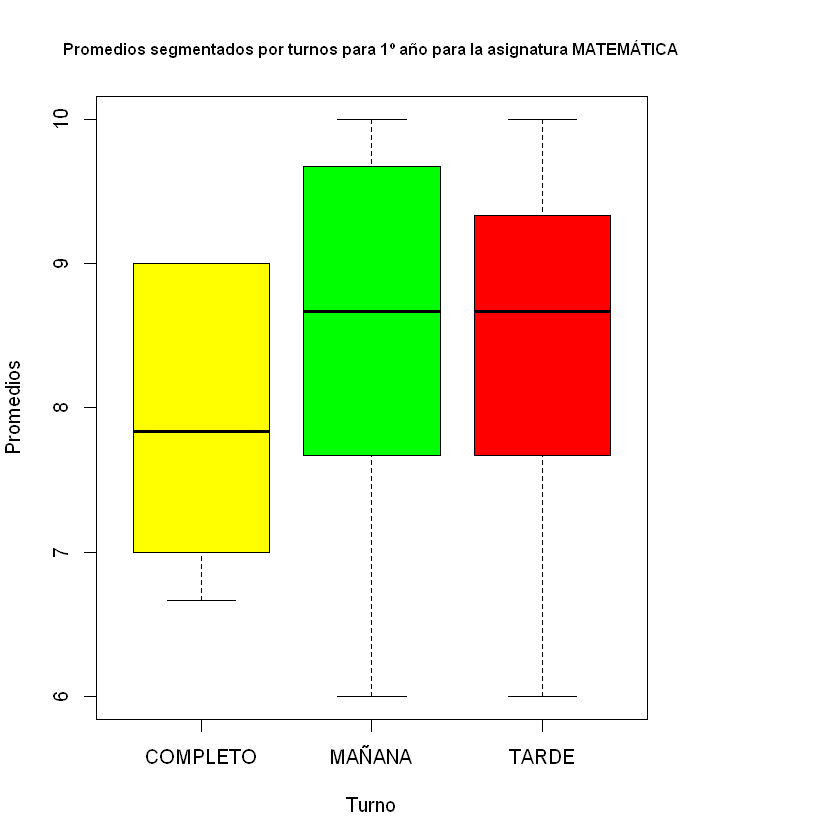

[1] "Asignatura LENGUA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   7.6    7.7    10
2 MAÑANA     8.3    8.3   155
3 TARDE      8.4    8.7   527


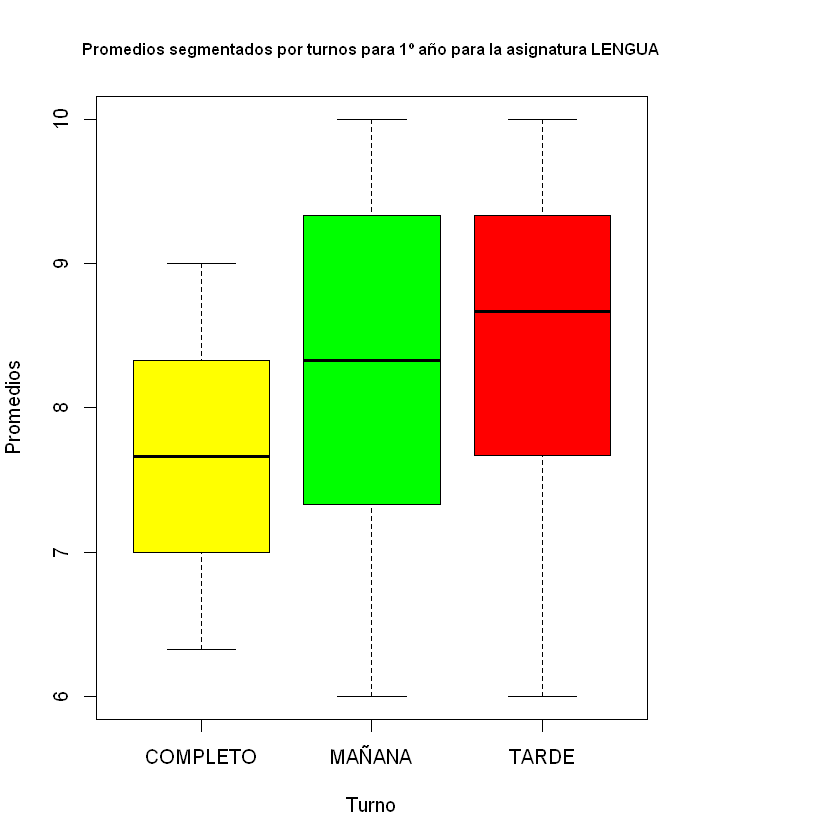

[1] "Asignatura MATEMÁTICA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   8.6    8.8    14
2 MAÑANA     8.5    9      81
3 TARDE      8.5    8.7   581


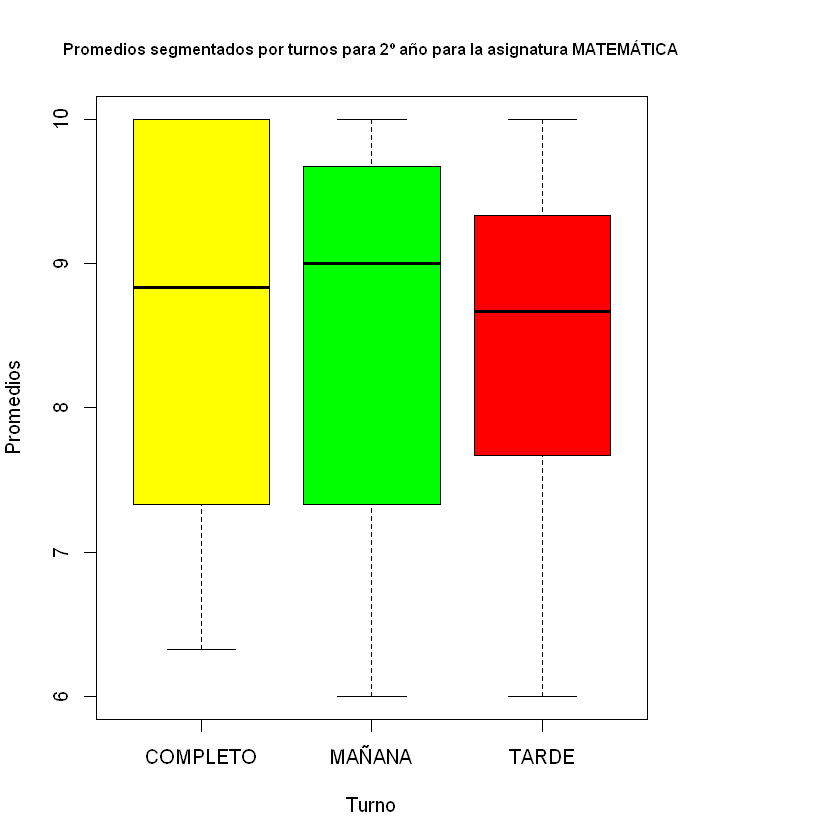

[1] "Asignatura LENGUA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   8.6    9      13
2 MAÑANA     8.7    9      94
3 TARDE      8.5    8.7   576


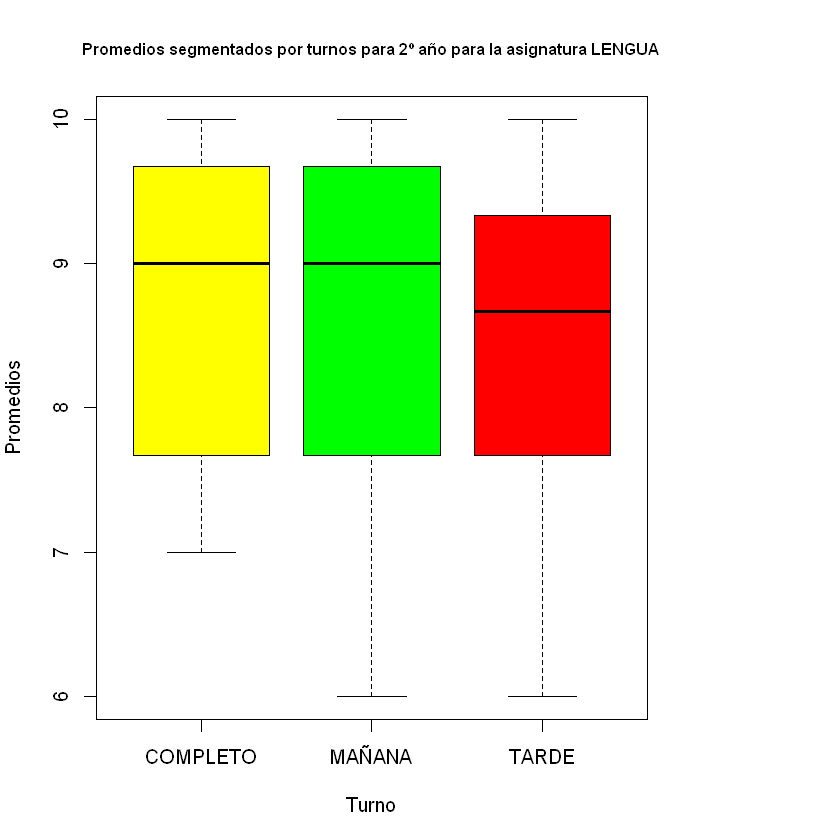

[1] "Asignatura MATEMÁTICA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   8.2    8.7    23
2 MAÑANA     8.4    8.7   143
3 TARDE      8.6    9     548


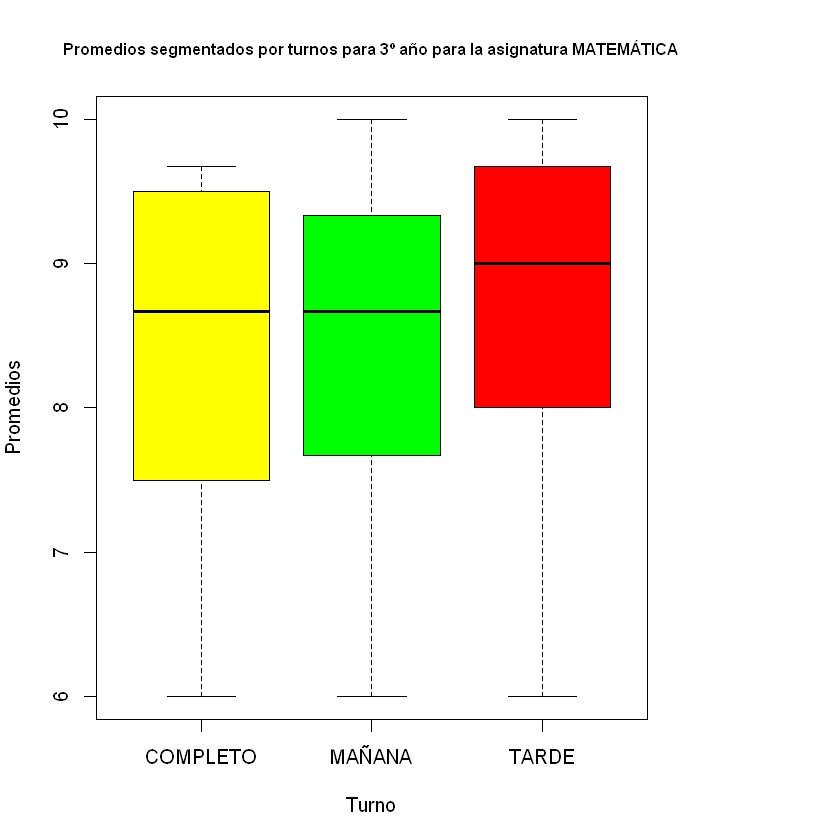

[1] "Asignatura LENGUA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   8.4    8.7    21
2 MAÑANA     8.4    8.7   136
3 TARDE      8.6    8.7   519


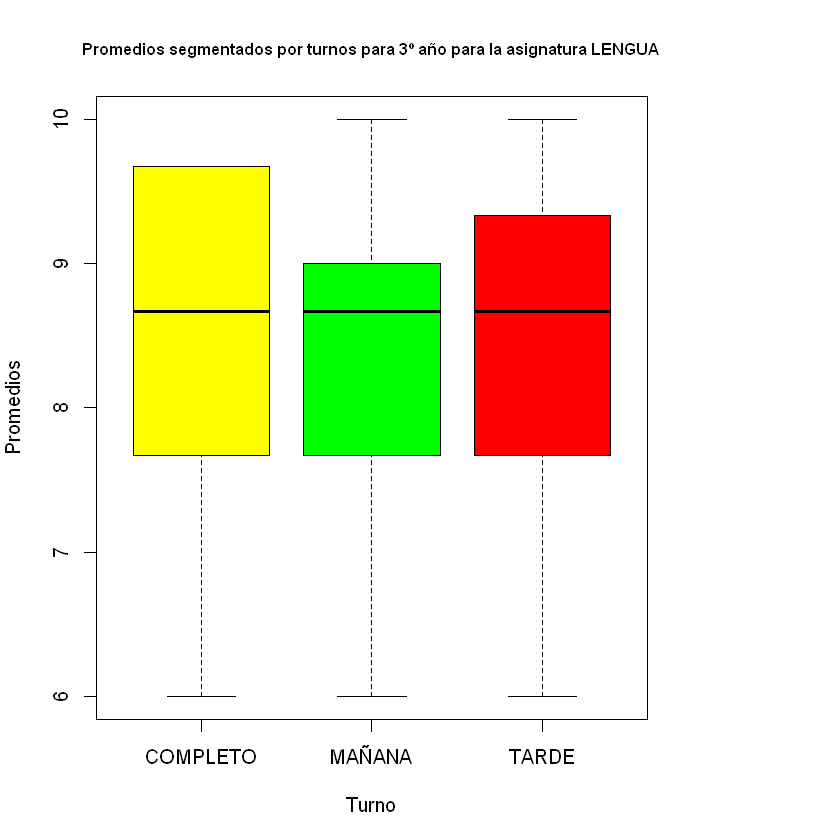

[1] "Asignatura MATEMÁTICA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   8.4    8      14
2 MAÑANA     8.3    8.3   367
3 TARDE      8.4    8.7   272


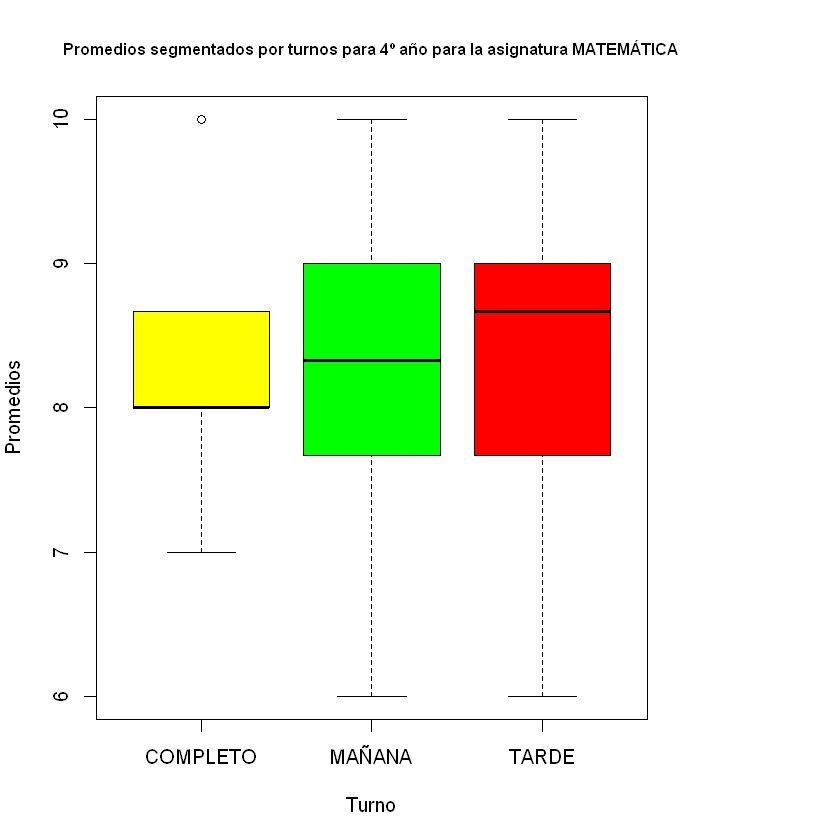

[1] "Asignatura LENGUA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   8.5    8.7    13
2 MAÑANA     8.2    8.3   377
3 TARDE      8.4    8.7   274


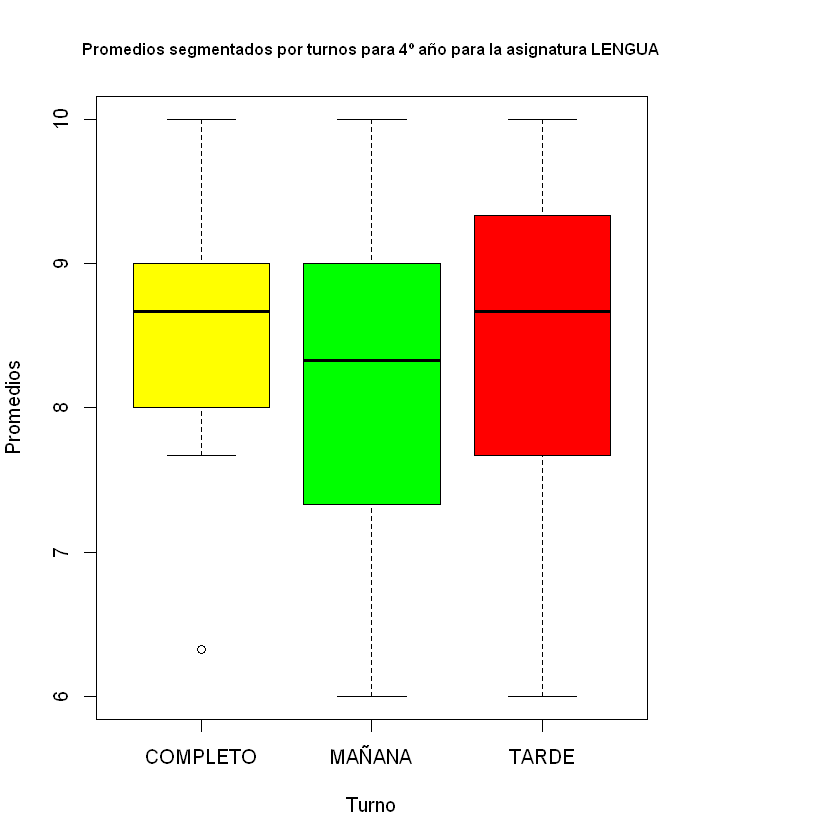

[1] "Asignatura MATEMÁTICA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   7.9    8      15
2 MAÑANA     8.1    8     445
3 TARDE      8.2    8.3   234


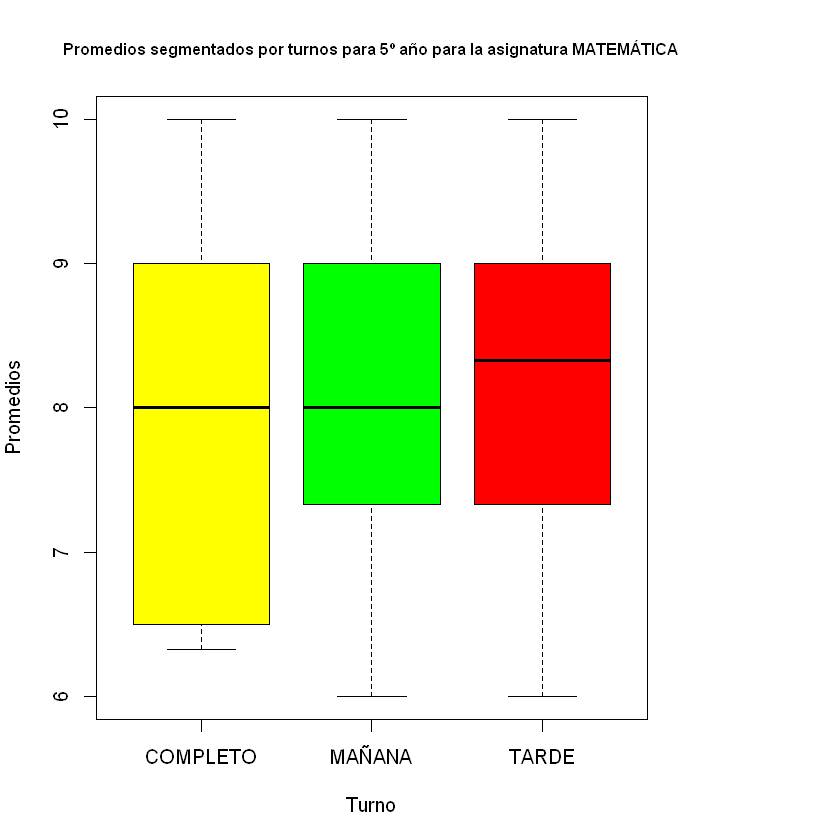

[1] "Asignatura LENGUA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   7.6    7.7    16
2 MAÑANA     8.1    8     439
3 TARDE      8.3    8.3   257


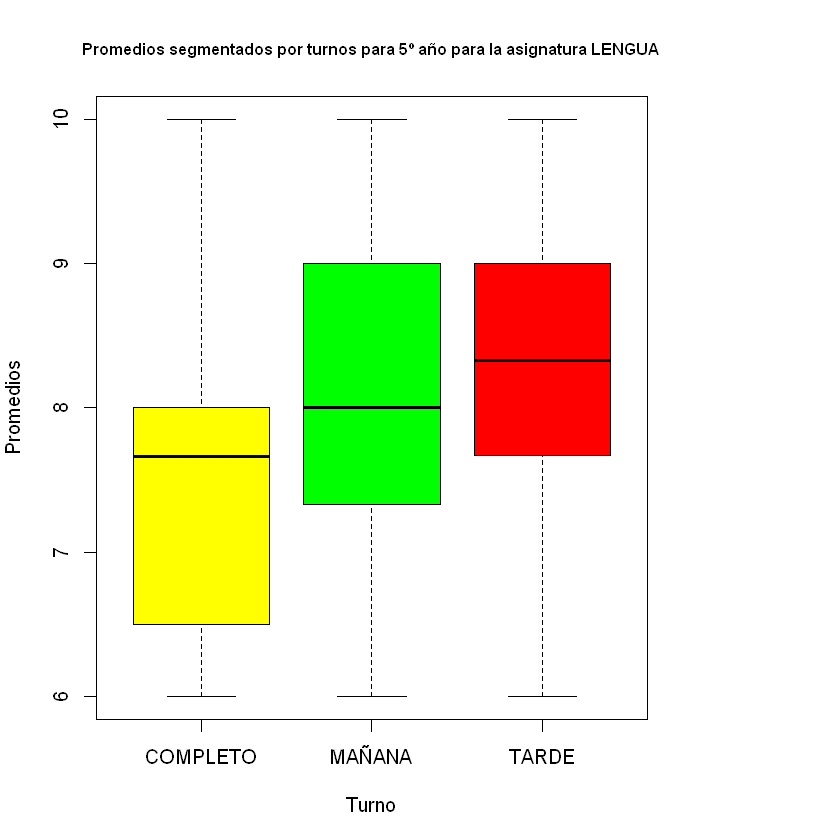

[1] "Asignatura MATEMÁTICA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   7.9    8      23
2 MAÑANA     8.1    8     396
3 TARDE      8.2    8.3   289


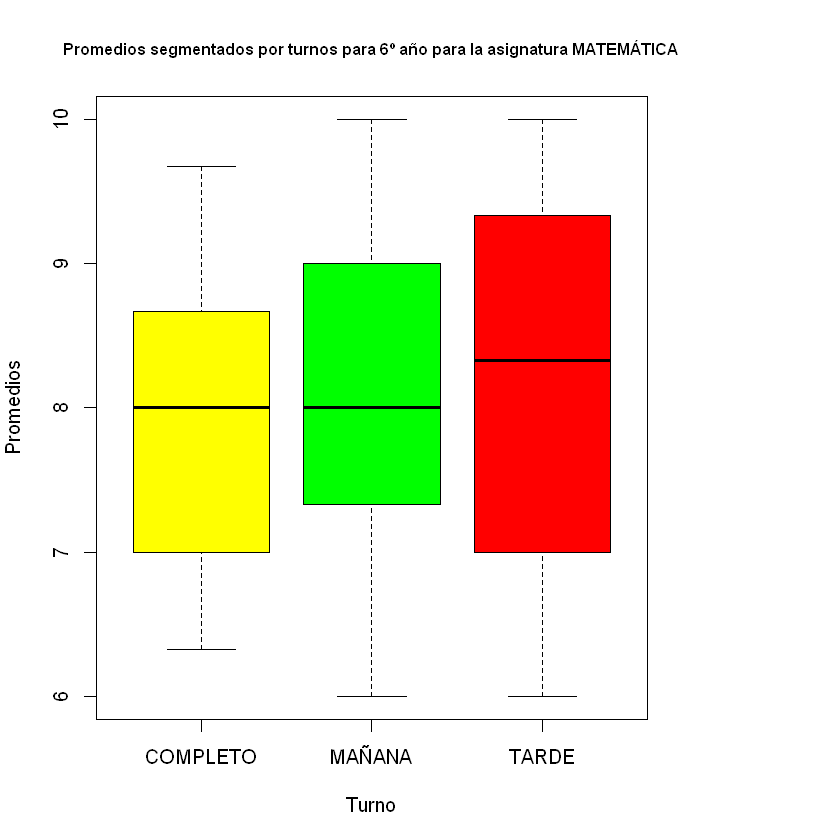

[1] "Asignatura LENGUA"
# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   7.7    7.7    25
2 MAÑANA     7.9    8     411
3 TARDE      8.3    8.3   289


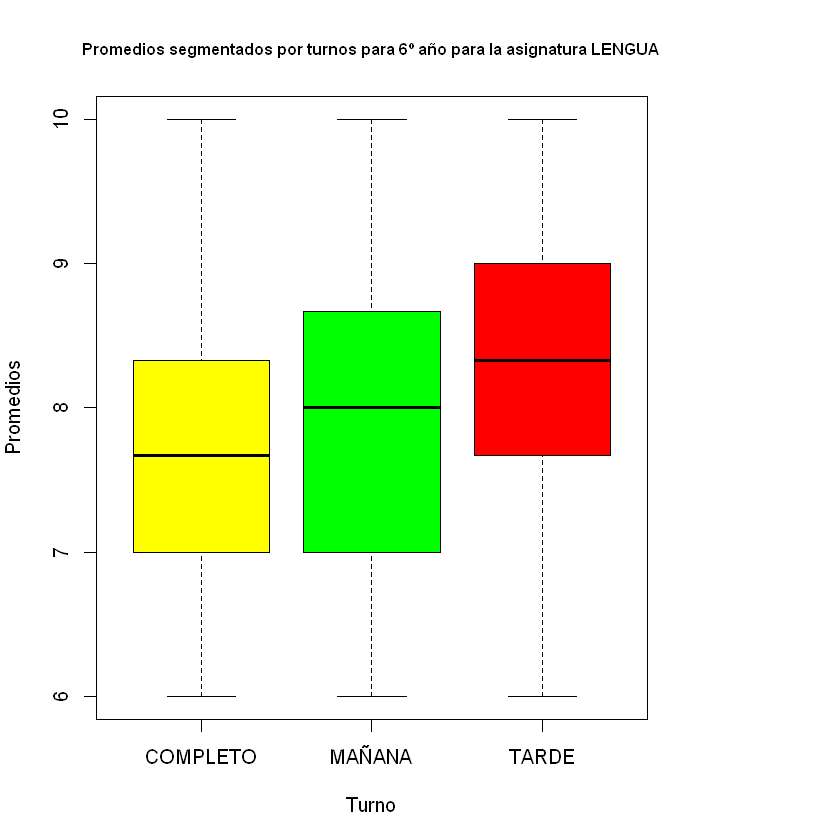

In [173]:
# Vector de asignaturas
materias <- c("MATEMÁTICA", "LENGUA")
# Vector de turnos
turnos_list <- c("MAÑANA", "TARDE", "COMPLETO")
# Resultados de los test, los hacemos de una vez para luego mostrar todos los resultados juntos.
anovas <- vector("list", 6)
tukeys <- vector("list", 6)
t_normalidad <- vector("list", 6)
powers <- vector("list", 6)
t_kruskal <- vector("list", 6)
t_post_k <- vector("list", 6)
# Iteramos sobre los años
for (i in 1:6)
{
  # Variables a almacenar datos temporales de cada iteración
  anova_l <- list()
  tukey_l <- list()
  power_l <- list()
  kruskal_l <- list()
  post_k_l <- list()
  # Volvemos a iterar pero esta vez sobre nuestras dos variables, Matemática y Lengua.
  for (j in 1:2)
  {
    # Filtramos el dataset y armamos las tablas pertinentes para los tests.
    dataset_filtrado_por_año <- dplyr::filter(dataset_mas_limpio, Modalidad == "Primaria" & AñoCursado == i & asignatura == materias[j])
    turnos <- as.factor(c(rep("COMPLETO",length(dataset_filtrado_por_año$turno[dataset_filtrado_por_año$turno == 'COMPLETO'])),
                          rep("MAÑANA",length(dataset_filtrado_por_año$turno[dataset_filtrado_por_año$turno == 'MAÑANA'])),
                          rep("TARDE",length(dataset_filtrado_por_año$turno[dataset_filtrado_por_año$turno == 'TARDE']))))
    promedios <- as.numeric(c(dataset_filtrado_por_año$Promedio[dataset_filtrado_por_año$turno == 'COMPLETO' ],
                              dataset_filtrado_por_año$Promedio[dataset_filtrado_por_año$turno == 'MAÑANA' ],
                              dataset_filtrado_por_año$Promedio[dataset_filtrado_por_año$turno == 'TARDE' ]))
    dataset_p_año <- na.omit(data.frame(turnos, promedios))
    dataset_p_año$promedios <- round(dataset_p_año$promedios,2)
    
    # Boxplot exploratorio
    par(mar = c(5,4,4,8))
    boxplot(dataset_p_año$promedios ~ dataset_p_año$turnos, 
            col = c("yellow", "green","red", "brown"), 
            ylab = paste0("Promedios"), xlab="Turno",
            main = paste0("Promedios segmentados por turnos para ", i, "º año para la asignatura ", materias[j]),
           cex.main = 0.8)
      
    # Tabla exploratoria para ver los tabla final a utilizar.
    tabla <- dataset_p_año %>% group_by(turnos) %>% summarise(mean = round(mean(promedios), 1),median=round(median(promedios),1), datos = n())
    print(paste0("Asignatura ", materias[j]))
    print(tabla)
    # contraste de anova para la tabla armada.
    anova_l[[j]] <- aov(dataset_p_año$promedios ~ dataset_p_año$turnos)
    
    # Armamos de una vez el test de Tukey, dependerá de la normalidad si lo usamos o no.
    tukey_l[[j]] <- TukeyHSD(anova_l[[j]], "dataset_p_año$turnos", conf.level = 0.95)
    
    # Realizamos el power para cada anova calculado (mostraremos solo los significantes)
    min_n <- min(tabla$datos)
    power_l[[j]] <- pwr.anova.test(k = 3 , n = min_n , f =0.2 , sig.level =0.05 )

    # Test de Kruskal-Wallis
    kruskal_l[[j]] <- kruskal.test(dataset_p_año$promedios, dataset_p_año$turnos)
    
    # Contraste posterior de Kruskal.
    post_k_l[[j]] <- pairwise.wilcox.test(dataset_p_año$promedios, dataset_p_año$turnos)
    
    # Almacenamiento de los datos temporales de cada iteración, al final será un vector de 3 datos
    normalidad <- list()
    for (k in 1:3)
    {
        a_testear_normalidad <- dataset_p_año$promedios[dataset_p_año$turnos == turnos_list[k]]
        len_data <- length(a_testear_normalidad)
        # Debemos verificar la longitud de cada turno, si es menor a 30 usamos Shapiro, en caso contrario utilizamos Lillie.
        if (len_data < 30)
        {
          normalidad[[k]] <- shapiro.test(a_testear_normalidad)
        }
        else if (len_data >= 30)
        {
          normalidad[[k]] <- lillie.test(a_testear_normalidad)
        }
    } 
    # Almacenamos nuestros datos obtenidos en nuestro vector de resultados al final de cada iteración
    t_normalidad[[i]][[j]] <- normalidad
  }
  anovas[[i]] <- anova_l
  tukeys[[i]] <- tukey_l
  powers[[i]] <- power_l
  t_kruskal[[i]] <- kruskal_l
  t_post_k[[i]] <- post_k_l
}

### Ahora procederemos a mostrar los resultados obtenidos en la celda anterior, pero primero planteamos las hipótesis del contraste Anova.

#### Hipotesis nula: No hay diferencias significativas entre las medias de los promedios de los turnos para cada año.
#### Hipotesis alternativa: Hay diferencias significativas entre al menos dos de las medias de los promedios de los turnos para cada año.

In [174]:
for (i in 1:6) {
    for (j in 1:2) {
        print(paste0("Contraste de Anova para la materia ", materias[j], " para ", i, "° año"))
        # Nuestros resultados de los anovas se encuentran en la matriz "anovas"
        print(summary(anovas[[i]][[j]]))
        print("------------")
    }
}

[1] "Contraste de Anova para la materia MATEMÁTICA para 1° año"
                      Df Sum Sq Mean Sq F value Pr(>F)
dataset_p_año$turnos   2    3.5   1.743   1.375  0.254
Residuals            729  924.1   1.268               
[1] "------------"
[1] "Contraste de Anova para la materia LENGUA para 1° año"
                      Df Sum Sq Mean Sq F value Pr(>F)  
dataset_p_año$turnos   2    7.7   3.837   2.923 0.0544 .
Residuals            689  904.4   1.313                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "------------"
[1] "Contraste de Anova para la materia MATEMÁTICA para 2° año"
                      Df Sum Sq Mean Sq F value Pr(>F)
dataset_p_año$turnos   2    0.3  0.1315   0.097  0.907
Residuals            673  909.1  1.3509               
[1] "------------"
[1] "Contraste de Anova para la materia LENGUA para 2° año"
                      Df Sum Sq Mean Sq F value Pr(>F)
dataset_p_año$turnos   2    3.0   1.509   1.164  0.313
Residuals        

### Podemos observar que para cuarto, quinto y sexto año, en la asignatura Lengua, los p-value del test Anova dieron 0.006, 0.003 y 7.32*10^-6 respectivamente, donde se rechaza H0 y se puede decir que existe diferencia significativa. Para los demás, no se puede rechazar H0, por lo que decimos que no existe diferencia significativa.
### Para estos 3 casos, procedemos a mostrar sus diferencias con el test de Tukey

In [175]:
# Para los años 4to, 5to y 6to, tomamos la materia lengua.
tukeys[[4]][[2]]
tukeys[[5]][[2]]
tukeys[[6]][[2]]

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = dataset_p_año$promedios ~ dataset_p_año$turnos)

$`dataset_p_año$turnos`
                       diff         lwr       upr     p adj
MAÑANA-COMPLETO -0.34424403 -1.03904888 0.3505608 0.4752924
TARDE-COMPLETO  -0.08946659 -0.78861099 0.6096778 0.9514175
TARDE-MAÑANA     0.25477744  0.05924563 0.4503093 0.0064904


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = dataset_p_año$promedios ~ dataset_p_año$turnos)

$`dataset_p_año$turnos`
                     diff         lwr       upr     p adj
MAÑANA-COMPLETO 0.4403431 -0.19177175 1.0724580 0.2311384
TARDE-COMPLETO  0.6723517  0.03241451 1.3122888 0.0368065
TARDE-MAÑANA    0.2320085  0.03693950 0.4270776 0.0147926


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = dataset_p_año$promedios ~ dataset_p_año$turnos)

$`dataset_p_año$turnos`
                     diff         lwr       upr     p adj
MAÑANA-COMPLETO 0.2021051 -0.30598161 0.7101918 0.6188066
TARDE-COMPLETO  0.5739612  0.05976203 1.0881605 0.0242373
TARDE-MAÑANA    0.3718561  0.18250640 0.5612059 0.0000140


### Observando los Tukey de cada uno de los casos (todos los casos son respecto a la materia Lengua), obtenemos:
#### -   Cuarto año: Hay diferencia significativa entre el turno Tarde y Mañana.
#### -   Quinto año: Hay diferencia significativa entre los turnos Tarde-Mañana y Tarde-Completo
#### -   Sexto año: Hay diferencia significativa entre los turnos Tarde-Mañana y Tarde-Completo

### Ahora evaluaremos el cumplimiento de los supuestos del modelo ANOVA

In [176]:
for (i in 1:6) {
    for (j in 1:2) {
        print(paste0("Test de normalidad, ", materias[j], " para ", i, "° año"))
        # Nuestros resultados de los anovas se encuentran en la matriz "anovas"
        print(t_normalidad[[i]][[j]])
        print("------------")
    }
}

[1] "Test de normalidad, MATEMÁTICA para 1° año"
[[1]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  a_testear_normalidad
D = 0.14937, p-value = 4.451e-09


[[2]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  a_testear_normalidad
D = 0.13504, p-value < 2.2e-16


[[3]]

	Shapiro-Wilk normality test

data:  a_testear_normalidad
W = 0.87207, p-value = 0.1057


[1] "------------"
[1] "Test de normalidad, LENGUA para 1° año"
[[1]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  a_testear_normalidad
D = 0.12513, p-value = 3.25e-06


[[2]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  a_testear_normalidad
D = 0.13111, p-value < 2.2e-16


[[3]]

	Shapiro-Wilk normality test

data:  a_testear_normalidad
W = 0.95419, p-value = 0.7181


[1] "------------"
[1] "Test de normalidad, MATEMÁTICA para 2° año"
[[1]]

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  a_testear_normalidad
D = 0.18034, p-value = 7.126e-07


[[2]]

	Lilliefors (Kolmogorov-Smir

### Podemos observar que en todos los casos al menos uno de los turnos no cumplen con el supuesto de normalidad. Por lo tanto el modelo ANOVA no es válido y se deben utilizar pruebas no parametricas. Mostramos los test de Kruskal previamente calculados.

In [177]:
for (i in 1:6) {
    for (j in 1:2) {
        print(paste0("Test de Kruskal-Wallis para la materia ", materias[j], " para ", i, "° año"))
        # Nuestros resultados de los anovas se encuentran en la matriz "anovas"
        print(t_kruskal[[i]][[j]])
        print("------------")
    }
}

[1] "Test de Kruskal-Wallis para la materia MATEMÁTICA para 1° año"

	Kruskal-Wallis rank sum test

data:  dataset_p_año$promedios and dataset_p_año$turnos
Kruskal-Wallis chi-squared = 3.1243, df = 2, p-value = 0.2097

[1] "------------"
[1] "Test de Kruskal-Wallis para la materia LENGUA para 1° año"

	Kruskal-Wallis rank sum test

data:  dataset_p_año$promedios and dataset_p_año$turnos
Kruskal-Wallis chi-squared = 6.1218, df = 2, p-value = 0.04685

[1] "------------"
[1] "Test de Kruskal-Wallis para la materia MATEMÁTICA para 2° año"

	Kruskal-Wallis rank sum test

data:  dataset_p_año$promedios and dataset_p_año$turnos
Kruskal-Wallis chi-squared = 0.45094, df = 2, p-value = 0.7981

[1] "------------"
[1] "Test de Kruskal-Wallis para la materia LENGUA para 2° año"

	Kruskal-Wallis rank sum test

data:  dataset_p_año$promedios and dataset_p_año$turnos
Kruskal-Wallis chi-squared = 1.9913, df = 2, p-value = 0.3695

[1] "------------"
[1] "Test de Kruskal-Wallis para la materia MATEMÁTICA

### Como podemos observar en algunos de los resultados de los test de Kruskal, se rechaza la hipótesis nula, la cual es que la variable de respuesta es la misma en todas las poblaciones valoradas, es decir, en ciertos casos que se nombrarán a continuación, la diferencia es significativa.
#### -   Tercer año - Matemática: p = 0.034
#### -   Cuarto año - Lengua: p = 0.002
#### -   Quinto año - Lengua: p = 0.008
#### -   Sexto año - Lengua: p = 1.17*10^-5

### Para cada uno de estos casos, realizaremos su contraste posterior.

In [178]:
# Para Tercero Matemática, Cuarto Lengua, Quinto Lengua y Sexto Lengua
t_post_k[[3]][[1]]
t_post_k[[4]][[2]]
t_post_k[[5]][[2]]
t_post_k[[6]][[2]]


	Pairwise comparisons using Wilcoxon rank sum test 

data:  dataset_p_año$promedios and dataset_p_año$turnos 

       COMPLETO MAÑANA
MAÑANA 0.502    -     
TARDE  0.226    0.087 

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  dataset_p_año$promedios and dataset_p_año$turnos 

       COMPLETO MAÑANA
MAÑANA 0.5063   -     
TARDE  0.9575   0.0025

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  dataset_p_año$promedios and dataset_p_año$turnos 

       COMPLETO MAÑANA
MAÑANA 0.120    -     
TARDE  0.045    0.039 

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  dataset_p_año$promedios and dataset_p_año$turnos 

       COMPLETO MAÑANA 
MAÑANA 0.31     -      
TARDE  0.03     2.1e-05

P value adjustment method: holm 

### Resultados:
#### Las diferencias significativas entre promedios y turnos encontradas son las siguientes:
#### -   Tercer año - Matemática: Tarde-Mañana
#### -   Cuarto año - Lengua: Tarde-Mañana
#### -   Quinto año - Lengua: Tarde-Mañana y Tarde-Completo
#### -   Sexto año - Lengua: Tarde-Completo y Tarde-Mañana

## 4)
###  Compara el desempeño en Matemática de cada año de secundaria comparando los turnos.
###      Realiza el mismo análisis para el área de Lengua

In [179]:
desp_mat_p <- filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad == "Secundaria")
for ( x in 1:6){
    m <- filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad == "Secundaria" & AñoCursado == x)
    print(paste0("Año: ",x))
    print(ftable(m$turno))
}

[1] "Año: 1"
 DIURNO MAÑANA TARDE
                    
     19    523   342
[1] "Año: 2"
 DIURNO MAÑANA TARDE
                    
     16    530   291
[1] "Año: 3"
 MAÑANA TARDE
             
    641   287
[1] "Año: 4"
 DIURNO MAÑANA NOCHE TARDE
                          
     46   1149    15   200
[1] "Año: 5"
 MAÑANA TARDE VESPERTINO
                        
   1390    95         21
[1] "Año: 6"
 DIURNO MAÑANA TARDE
                    
      9   1382    42


In [180]:
head(desp_mat_p)

CUE,EsPrivada,turno,periodoEvaluatorio,Documento,asignatura,NivelEnseñanza,Modalidad,ModEnseñanza,AñoCursado,NotasPrimerT,NotasSegundoT,NotasTercerT,Promedio,CondicionFinal
6002172,FALSE,TARDE,Tercer Trimestre,28360274,MATEMATICA,SECUNDARIO,Secundaria,Técnica,7,9,8,9,8.666667,APROBADO
6006732,FALSE,TARDE,Tercer Trimestre,34680594,MATEMATICA,SECUNDARIO,Secundaria,Comun,1,4,5,5,4.666667,DESAPROBADO
6001904,FALSE,MAÑANA,Tercer Trimestre,41176268,MATEMATICA,SECUNDARIO,Secundaria,Comun,5,6,6,6,6.000000,APROBADO
6001904,FALSE,MAÑANA,Tercer Trimestre,42307530,MATEMATICA,SECUNDARIO,Secundaria,Comun,6,7,6,7,6.666667,APROBADO
6006402,FALSE,TARDE,Tercer Trimestre,42580382,MATEMATICA,SECUNDARIO,Secundaria,Comun,5,6,5,5,5.333333,DESAPROBADO
6005302,FALSE,MAÑANA,Tercer Trimestre,42972243,MATEMATICA,SECUNDARIO,Secundaria,Comun,6,4,4,4,4.000000,DESAPROBADO


###  haciendo las tablas de frecuencia para cada año nos encontramos que los turnos no son coincidentes entre sí, por lo tanto queda un análisis en dos variables. Por lo que  no vamos a poder aplicar con esta variable de corte (turno) test para 3 o más muestras

## 5)
### Compara el desempeño de los tres trimestres en Matemática de primer año

In [181]:
desp_mat_s1 <- filter(desp_mat_p ,AñoCursado == 1)
desp_mat_s1 <- subset(desp_mat_s1,!duplicated(Documento))
trimestre <- as.factor(c(rep("PrimerT" , length(desp_mat_s1$NotasPrimerT)),
                          rep("SegundoT", length(desp_mat_s1$NotasSegundoT)),
                          rep("TercerT" , length(desp_mat_s1$NotasTercerT)))
                        )
dni_secu <- unique(desp_mat_s1$Documento)
NotasTrimestre <- as.numeric(c(desp_mat_s1$NotasPrimerT,
                           desp_mat_s1$NotasSegundoT,
                           desp_mat_s1$NotasTercerT)
                         )
data_secu_1 <- data.frame(Documento = rep(dni_secu,3),
                          Trimestre = trimestre,
                          Nota = NotasTrimestre)
head(data_secu_1,30)


Documento,Trimestre,Nota
34680594,PrimerT,4
46082290,PrimerT,5
46520307,PrimerT,3
46520314,PrimerT,2
46778660,PrimerT,5
46779769,PrimerT,3
47246382,PrimerT,4
47246436,PrimerT,6
47246563,PrimerT,7
47246572,PrimerT,1


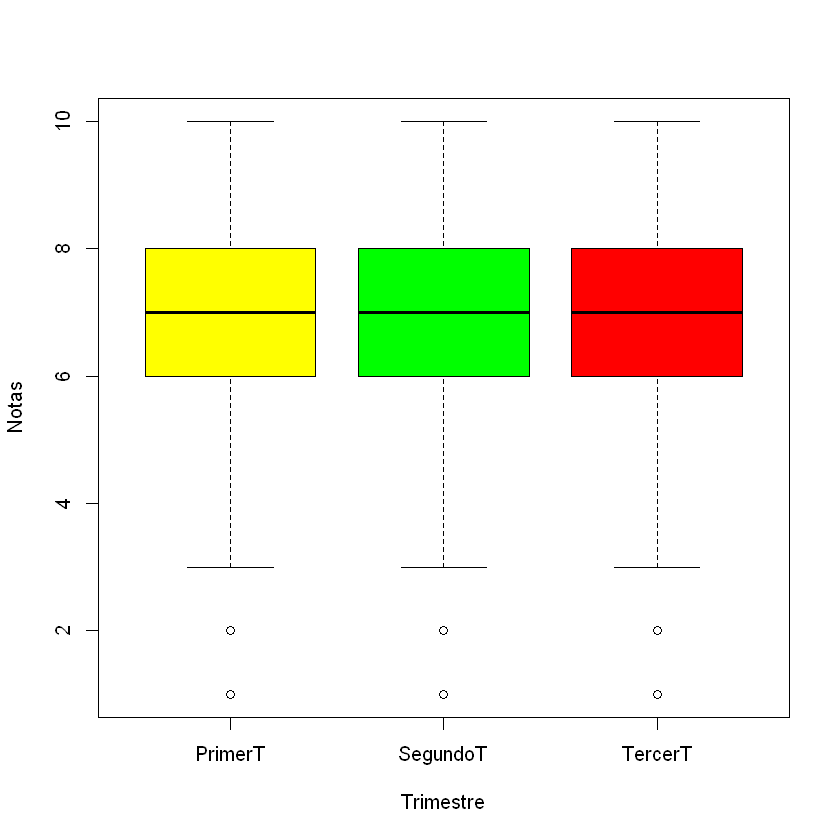

In [182]:
boxplot(data_secu_1$Nota ~ data_secu_1$Trimestre, col = c("yellow","green",  "red"), ylab = "Notas", xlab="Trimestre")

In [183]:
by(data = data_secu_1$Nota, INDICES = data_secu_1$Trimestre, FUN = base::mean)
by(data = data_secu_1$Nota, INDICES = data_secu_1$Trimestre, FUN = stats::median)

data_secu_1$Trimestre: PrimerT
[1] 6.733026
------------------------------------------------------------ 
data_secu_1$Trimestre: SegundoT
[1] 6.895282
------------------------------------------------------------ 
data_secu_1$Trimestre: TercerT
[1] 6.802071

data_secu_1$Trimestre: PrimerT
[1] 7
------------------------------------------------------------ 
data_secu_1$Trimestre: SegundoT
[1] 7
------------------------------------------------------------ 
data_secu_1$Trimestre: TercerT
[1] 7

### Podemos observar que para el caso de la mediana estas son iguales para los tres grupos. En el caso de las medias, estas difieren por poco. A simple vista no podemos notar diferencias significativas entre los trimestres.

In [184]:
friedman.test(Nota ~ Trimestre | Documento, data = data_secu_1)


	Friedman rank sum test

data:  Nota and Trimestre and Documento
Friedman chi-squared = 13.413, df = 2, p-value = 0.001223


### Como el p- valor es menor a 0,05 hay evidencia estadística suficiente para rechazar la hipotesis nula.
### Por lo que podemos concluir que exiten diferencias significativas en el desempeño de primer año de secundaria en Matemática segmentado por  trimestre

In [185]:
pairwise.wilcox.test(data_secu_1$Nota, data_secu_1$Trimestre, paired = TRUE)


	Pairwise comparisons using Wilcoxon signed rank test 

data:  data_secu_1$Nota and data_secu_1$Trimestre 

         PrimerT SegundoT
SegundoT 0.00035 -       
TercerT  0.13193 0.13193 

P value adjustment method: holm 

### La diferencia se muestra entre el primer y segundo trimestre

---

## 6)
### En cada test aplicado en esta guía y la guía anterior donde no se hayan obtenido
###    diferencias significativas mide la potencia del test.

### Mostramos la potencia de los test que no presentaron diferencias significativas entre las medias

In [186]:
for (i in 1:6) {
    for (j in 1:2) {
        if ((i == 4 || i == 5 || i == 6) && j == 2) {
            next
        }
        print(paste0("Potencia del contraste de Anova para la materia ", materias[j], " para ", i, "° año"))
        print(powers[[i]][[j]])
        print("------------")
    }
}

[1] "Potencia del contraste de Anova para la materia MATEMÁTICA para 1° año"

     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 10
              f = 0.2
      sig.level = 0.05
          power = 0.1394388

NOTE: n is number in each group

[1] "------------"
[1] "Potencia del contraste de Anova para la materia LENGUA para 1° año"

     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 10
              f = 0.2
      sig.level = 0.05
          power = 0.1394388

NOTE: n is number in each group

[1] "------------"
[1] "Potencia del contraste de Anova para la materia MATEMÁTICA para 2° año"

     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 14
              f = 0.2
      sig.level = 0.05
          power = 0.1836035

NOTE: n is number in each group

[1] "------------"
[1] "Potencia del contraste de Anova para la materia LENGUA para 2° año"

     B

### Potencia de los test de la guia 5, que no presentaron diferencias significativas entre las medias.

In [187]:
#3.5
pwr.t.test(n=length(diferencias_t),d=0.5,sig.level = 0.05, power = NULL, type="two.sample", alternative = "two.sided")


     Two-sample t test power calculation 

              n = 523
              d = 0.5
      sig.level = 0.05
          power = 1
    alternative = two.sided

NOTE: n is number in *each* group


In [188]:
#3.6
pwr.t.test(n=length(diferencia_mat_y_leng),d = 0.5, sig.level=0.05,power = NULL, type ="two.sample", alternative="two.sided")


     Two-sample t test power calculation 

              n = 884
              d = 0.5
      sig.level = 0.05
          power = 1
    alternative = two.sided

NOTE: n is number in *each* group


# Guia 7
## 1)
### Creamos las siguientes variables: condicion final, desempeño y eximido

In [189]:
library(stringr)

In [190]:
dataset_nova <- mutate(dataset_mas_limpio, Desempeño = case_when(
    Promedio < 4 ~ "INSUFICIENTE", 
    Promedio >= 4 & Promedio < 6 ~ "REGULAR",
    Promedio >= 6 & Promedio < 7 ~ "APROBADO",
    Promedio >= 7 & Promedio < 8 ~ "BUENO",
    Promedio >= 8 & Promedio < 9 ~ "MUY BUENO",
    Promedio >= 9 & Promedio <= 10 ~ "DISTINGUIDO",
TRUE ~ "SIN DATOS"))

In [191]:
dataset_nova_2 <- dataset_nova %>%
  group_by(Documento) %>%
  mutate(CantidadDesaprobado = sum(str_detect(CondicionFinal, regex("DESAPROBADO", ignore_case = TRUE))))

dataset_nova_final <- dataset_nova_2 %>% mutate(Eximido = case_when(
  CantidadDesaprobado == 0 ~ "Eximido",
  CantidadDesaprobado < 4 & CantidadDesaprobado >= 1 ~ "ParcialmenteEximido",
  CantidadDesaprobado > 3  ~ "NoEximido",
  TRUE ~ "sin registro completo"
))

In [192]:
dataset_nova_3 <- mutate(dataset_nova_final, MejoriaT = case_when(
    NotasTercerT - NotasPrimerT > 0 ~ "MEJORO",
    NotasTercerT - NotasPrimerT == 0 ~ "IGUAL",
    NotasTercerT - NotasPrimerT < 0 ~ "EMPEORO",
    TRUE ~ "SIN DATOS")
)


In [193]:
ftable(dataset_nova_3$MejoriaT)

 EMPEORO IGUAL MEJORO
                     
   18010 22552  27138

### 2)
### A) Realice una tabla de contingencia con las frecuencias observadas.
### B) Realice una tabla de porcentaje total, porcentaje fila, y porcentaje columna.
### C) Acompañe cada tabla anterior mediante un gráfico apropiado, y un párrafo de interpretación de la información que aporta cada tabla.
### D) Establezca alguna hipótesis a partir de los resultados obtenidos en el ítem B)
### E) Contraste la hipótesis, y mida la fuerza de asociación y la dirección si corresponde.
### F) Calcule la tabla de valores esperados, e identifique si resulta algún valor llamativo.
### G) Calcule los residuos corregidos, e interprete los resultados obtenidos.

---

## Desempeño en Primer Año de Matemática Secundaria con Turno.

In [194]:
dataset_prueba <- filter(dataset_nova_3,asignatura == "MATEMATICA"  & Modalidad  == "Secundaria"  & AñoCursado == 1)
ftable(dataset_prueba$turno,dataset_prueba$Desempeño)

        APROBADO BUENO DISTINGUIDO INSUFICIENTE MUY BUENO REGULAR
                                                                 
DIURNO        13     3           2            0         1       0
MAÑANA       117   111          67           23        90     115
TARDE        106    52          42           20        66      56

### Hay celdas que contienen valores menores a 5 por lo que vamos a descartar el turno diurno ya que no cumple con la condicion de  la prueba de chi cuadrado

In [195]:
dataset_sec_mat_primero <- filter(dataset_nova_3,
                                  asignatura == "MATEMATICA"  & 
                                  Modalidad  == "Secundaria"  & 
                                  AñoCursado == 1             &
                                  (turno      == "TARDE"       |
                                  turno      == "MAÑANA")
                                 )
head(dataset_sec_mat_primero)

CUE,EsPrivada,turno,periodoEvaluatorio,Documento,asignatura,NivelEnseñanza,Modalidad,ModEnseñanza,AñoCursado,NotasPrimerT,NotasSegundoT,NotasTercerT,Promedio,CondicionFinal,Desempeño,CantidadDesaprobado,Eximido,MejoriaT
6006732,FALSE,TARDE,Tercer Trimestre,34680594,MATEMATICA,SECUNDARIO,Secundaria,Comun,1,4,5,5,4.666667,DESAPROBADO,REGULAR,6,NoEximido,MEJORO
6006732,FALSE,TARDE,Tercer Trimestre,46082290,MATEMATICA,SECUNDARIO,Secundaria,Comun,1,5,7,8,6.666667,APROBADO,APROBADO,4,NoEximido,MEJORO
6005300,FALSE,TARDE,Tercer Trimestre,46520307,MATEMATICA,SECUNDARIO,Secundaria,Comun,1,3,5,4,4.000000,DESAPROBADO,REGULAR,2,ParcialmenteEximido,MEJORO
6005300,FALSE,TARDE,Tercer Trimestre,46520314,MATEMATICA,SECUNDARIO,Secundaria,Comun,1,2,3,1,2.000000,DESAPROBADO,INSUFICIENTE,7,NoEximido,EMPEORO
6002178,FALSE,MAÑANA,Tercer Trimestre,46778660,MATEMATICA,SECUNDARIO,Secundaria,Agrotécnica,1,5,1,3,3.000000,DESAPROBADO,INSUFICIENTE,11,NoEximido,EMPEORO
6002178,FALSE,MAÑANA,Tercer Trimestre,46778660,MATEMATICA,SECUNDARIO,Secundaria,Agrotécnica,1,5,4,3,4.000000,DESAPROBADO,REGULAR,11,NoEximido,EMPEORO


#### Tabla de contingencia para los alumnos de primer año de secundaria con respecto al turno

In [196]:
#utilizamos la función table para obtener una tabla de contingencia
tabla_des_primero_sec <- dataset_sec_mat_primero %>% 
    dplyr::select(turno,Desempeño)
    
head(tabla_des_primero_sec,5)

Adding missing grouping variables: `Documento`


Documento,turno,Desempeño
34680594,TARDE,REGULAR
46082290,TARDE,APROBADO
46520307,TARDE,REGULAR
46520314,TARDE,INSUFICIENTE
46778660,MAÑANA,INSUFICIENTE


In [197]:
ftable(dataset_sec_mat_primero$turno,dataset_sec_mat_primero$Desempeño)

        APROBADO BUENO DISTINGUIDO INSUFICIENTE MUY BUENO REGULAR
                                                                 
MAÑANA       117   111          67           23        90     115
TARDE        106    52          42           20        66      56

### Tabla de contingencia total, de  filas y columna

In [198]:
library("gmodels")
CrossTable(dataset_sec_mat_primero$turno, dataset_sec_mat_primero$Desempeño, digits=1,prop.chisq = FALSE,format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|-------------------------|

Total Observations in Table:  865 

                              | dataset_sec_mat_primero$Desempeño 
dataset_sec_mat_primero$turno |     APROBADO  |        BUENO  |  DISTINGUIDO  | INSUFICIENTE  |    MUY BUENO  |      REGULAR  |    Row Total | 
------------------------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|
                       MAÑANA |         117  |         111  |          67  |          23  |          90  |         115  |         523  | 
                              |        22.4% |        21.2% |        12.8% |         4.4% |        17.2% |        22.0% |        60.5% | 
                              |        52.5% |        68.1% |        61.5% |        53.5% |        57.7% |        67.3% |              | 
               

## C) Gráficos

#### Gráfico de barras apiladas de la tabla de contingencia por fila

In [199]:
dataset_sec_mat_primero$Desempeño<-factor(dataset_sec_mat_primero$Desempeño,
                                          levels = c('DISTINGUIDO', 'MUY BUENO','BUENO', 'APROBADO', 'REGULAR', 'INSUFICIENTE' )) #prestar atención a que hay que ordenar contrario a barplot

tabla_variables_fila<-round(prop.table( table(dataset_sec_mat_primero$turno, dataset_sec_mat_primero$Desempeño),1)*100,1) 

datos = data.frame(tabla_variables_fila)
colnames(datos) <- c("Turno", "Desempeño", "Porcentaje")
datos

Turno,Desempeño,Porcentaje
MAÑANA,DISTINGUIDO,12.8
TARDE,DISTINGUIDO,12.3
MAÑANA,MUY BUENO,17.2
TARDE,MUY BUENO,19.3
MAÑANA,BUENO,21.2
TARDE,BUENO,15.2
MAÑANA,APROBADO,22.4
TARDE,APROBADO,31.0
MAÑANA,REGULAR,22.0
TARDE,REGULAR,16.4


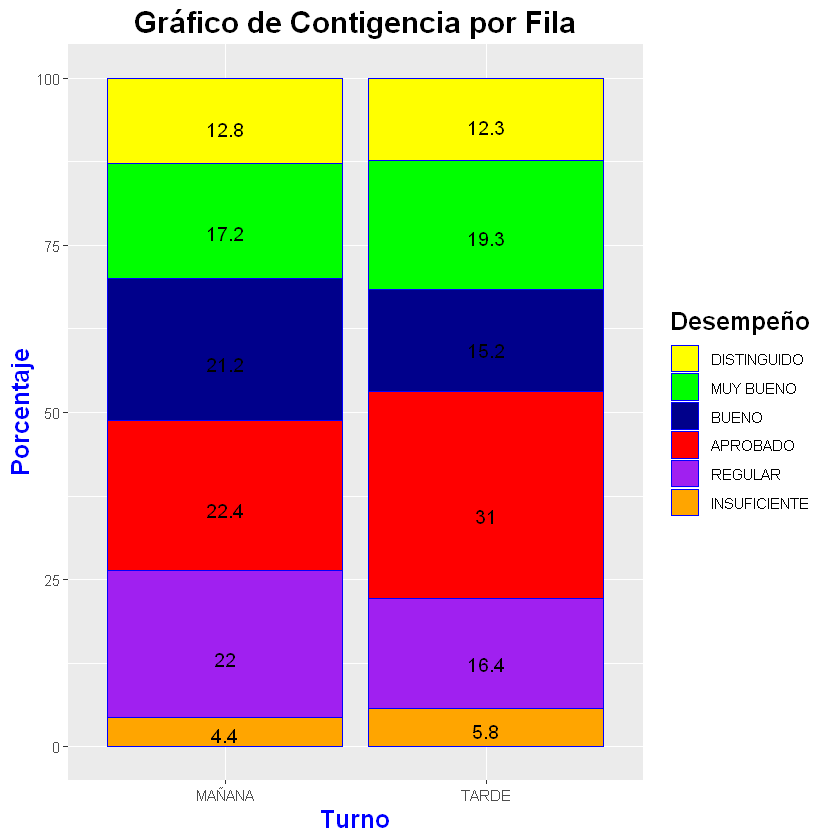

In [200]:
ggplot(data = datos, aes(x = Turno, y = Porcentaje, fill = Desempeño)) +
  geom_bar(stat = "identity", colour = "blue") +
  scale_fill_manual(values = c("yellow", "green", "darkblue", "red", "purple", "orange")) +
  geom_text(aes(label = Porcentaje), position = position_stack(vjust = 0.4), size = 4, color = "black") +
  xlab("Turno") +
  ylab("Porcentaje") +
  ggtitle("Gráfico de Contigencia por Fila") +
  theme(axis.title = element_text(size = 15, color = "blue", face = "bold")) +
  theme(title = element_text(size = 15, color = "black", face = "bold")) +
  theme(plot.title = element_text(hjust = 0.5))

### Para la tabla de contingencia por filas podemos ver como se distribuyen los desempeños con respecto al turno. Por ejemplo, podemos observar que para el turno mañana el porcentaje de alumnos con nota igual o mayor a 6 es de 73,6%. En cambio, para el turno tarde el  el porcentaje de alumnos con nota igual o mayor a 6 es de 77,8%.

### Gráfico de la tabla de contingencia por columna

In [201]:
dataset_sec_mat_primero$Desempeño<-factor(dataset_sec_mat_primero$Desempeño,
                                          levels = c('DISTINGUIDO', 'MUY BUENO','BUENO', 'APROBADO', 'REGULAR', 'INSUFICIENTE' )) #prestar atención a que hay que ordenar contrario a barplot

tabla_variables_fila<-round(prop.table( table(dataset_sec_mat_primero$turno, dataset_sec_mat_primero$Desempeño),2)*100,1) 

datos = data.frame(tabla_variables_fila)
colnames(datos) <- c("Turno", "Desempeño", "Porcentaje")
datos

Turno,Desempeño,Porcentaje
MAÑANA,DISTINGUIDO,61.5
TARDE,DISTINGUIDO,38.5
MAÑANA,MUY BUENO,57.7
TARDE,MUY BUENO,42.3
MAÑANA,BUENO,68.1
TARDE,BUENO,31.9
MAÑANA,APROBADO,52.5
TARDE,APROBADO,47.5
MAÑANA,REGULAR,67.3
TARDE,REGULAR,32.7


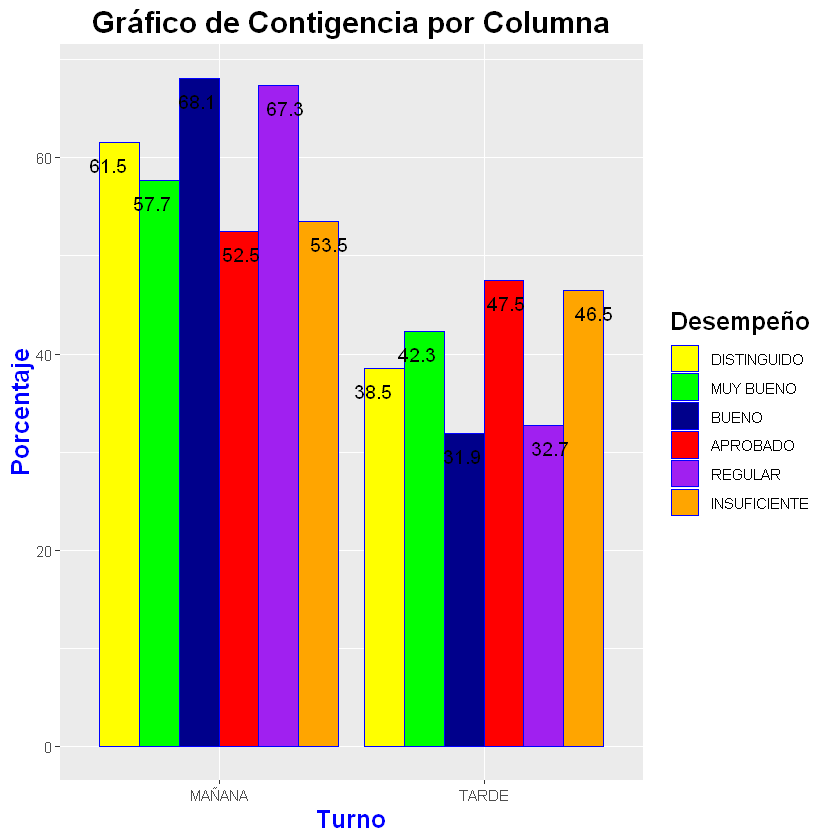

In [202]:
#horizontal coord_flip()
ggplot(data=datos,aes(x=Turno,y=Porcentaje,fill=Desempeño))+
  geom_bar(stat="identity",colour="blue",position="dodge")+
  scale_fill_manual(values=c("yellow","green", "darkblue", "red", "purple", "orange"))+
 geom_text(aes(label=Porcentaje),hjust=0.5, vjust=2, position = position_dodge(width = 1),size = 4, color = "Black")+
   xlab("Turno")+
  ylab("Porcentaje")+
 ggtitle("Gráfico de Contigencia por Columna") + 
 theme(axis.title = element_text(size = 15, color = "blue", face = "bold"))+
 theme(title = element_text(size = 15, color = "black", face = "bold"))+
  theme(plot.title = element_text(hjust = 0.5)) #centra titulo

#### Para la tabla de continguencia por columnas podemos ver como se distribuyen los turnos con respecto al desempeño

### Planteamos como hipotesis nula que el desempeño no esta asociado al turno

#### Pasamos a calcular la prueba estadística chi-cuadrado

In [203]:
library(DescTools)
chi_m1 <- chisq.test(dataset_sec_mat_primero$turno, dataset_sec_mat_primero$Desempeño)
chi_m1


Registered S3 method overwritten by 'DescTools':
  method         from 
  reorder.factor gdata

Attaching package: 'DescTools'

The following object is masked from 'package:sjmisc':

    %nin%




	Pearson's Chi-squared test

data:  dataset_sec_mat_primero$turno and dataset_sec_mat_primero$Desempeño
X-squared = 14.659, df = 5, p-value = 0.01193


In [204]:
chi_m1$observed


                             
dataset_sec_mat_primero$turno DISTINGUIDO MUY BUENO BUENO APROBADO REGULAR
                       MAÑANA          67        90   111      117     115
                       TARDE           42        66    52      106      56
                             
dataset_sec_mat_primero$turno INSUFICIENTE
                       MAÑANA           23
                       TARDE            20

In [205]:
round(chi_m1$expected,0)


,DISTINGUIDO,MUY BUENO,BUENO,APROBADO,REGULAR,INSUFICIENTE
MAÑANA,66,94,99,135,103,26
TARDE,43,62,64,88,68,17


#### Para el turno mañana generalmente los valores observados superan a los valores esperados

In [206]:
round(chi_m1$residuals, 1)


                             
dataset_sec_mat_primero$turno DISTINGUIDO MUY BUENO BUENO APROBADO REGULAR
                       MAÑANA         0.1      -0.4   1.3     -1.5     1.1
                       TARDE         -0.2       0.6  -1.6      1.9    -1.4
                             
dataset_sec_mat_primero$turno INSUFICIENTE
                       MAÑANA         -0.6
                       TARDE           0.7

In [207]:
round(chi_m1$stdres,1)

                             
dataset_sec_mat_primero$turno DISTINGUIDO MUY BUENO BUENO APROBADO REGULAR
                       MAÑANA         0.2      -0.8   2.2     -2.8     2.0
                       TARDE         -0.2       0.8  -2.2      2.8    -2.0
                             
dataset_sec_mat_primero$turno INSUFICIENTE
                       MAÑANA         -1.0
                       TARDE           1.0

In [208]:
library("DescTools")
CramerV(dataset_sec_mat_primero$turno, dataset_sec_mat_primero$Desempeño)

[1] 0.1301779

In [209]:
ContCoef(dataset_sec_mat_primero$turno, dataset_sec_mat_primero$Desempeño, correct = TRUE)

[1] 0.182559

#### Como el P-valor del test chi-cuadrado es menor a 0,05 hay evidencia suficiente para rechazar la hipotesis nula. Medimos la fuerza de asociación con el coeficiente de contingencia corregido la cual nos dio un valor que se considera leve.

## Desempeño de Primer Año de Lengua Secundaria con Sector.

In [210]:
dataset_prueba_2 <- filter(dataset_nova_3,asignatura == "LENGUA Y LITERATURA"  & Modalidad  == "Secundaria"  & AñoCursado == 1)
ftable(dataset_prueba_2$EsPrivada,dataset_prueba_2$Desempeño)

       APROBADO BUENO DISTINGUIDO INSUFICIENTE MUY BUENO REGULAR
                                                                
FALSE       192   145          84           28       107     164
TRUE         10    34          34            0        44       7

## Como encontramos frecuencias nulas desestimamos el analisis del desempeño de primer año en la asignatura lengua y literatura segmentado por sector ya que no cumple con las condiciones del test chi-cuadrado

## Desempeño de Primer Año de Matemática Secundaria con Desempeño de Primer año de Lengua Secundaria.

In [211]:
dataset_prueba_3 <- filter(dataset_nova_3,asignatura %in% c("LENGUA Y LITERATURA","MATEMATICA") & Modalidad  == "Secundaria"  & AñoCursado == 1)
ftable(dataset_prueba_3$asignatura,dataset_prueba_3$Desempeño)

                     APROBADO BUENO DISTINGUIDO INSUFICIENTE MUY BUENO REGULAR
                                                                              
LENGUA Y LITERATURA       202   179         118           28       151     171
MATEMATICA                236   166         111           43       157     171

In [212]:
tabla_len_mat <- dataset_prueba_3 %>% 
    dplyr::select(asignatura,Desempeño)
    
head(tabla_len_mat,5)

Adding missing grouping variables: `Documento`


Documento,asignatura,Desempeño
34680594,LENGUA Y LITERATURA,REGULAR
34680594,MATEMATICA,REGULAR
46082290,LENGUA Y LITERATURA,REGULAR
46082290,MATEMATICA,APROBADO
46520307,LENGUA Y LITERATURA,APROBADO


### Tabla de contingencia total, de filas y columnas

In [213]:
CrossTable(dataset_prueba_3$asignatura, dataset_prueba_3$Desempeño, digits=1,prop.chisq = FALSE,format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|-------------------------|

Total Observations in Table:  1733 

                            | dataset_prueba_3$Desempeño 
dataset_prueba_3$asignatura |     APROBADO  |        BUENO  |  DISTINGUIDO  | INSUFICIENTE  |    MUY BUENO  |      REGULAR  |    Row Total | 
----------------------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|
        LENGUA Y LITERATURA |         202  |         179  |         118  |          28  |         151  |         171  |         849  | 
                            |        23.8% |        21.1% |        13.9% |         3.3% |        17.8% |        20.1% |        49.0% | 
                            |        46.1% |        51.9% |        51.5% |        39.4% |        49.0% |        50.0% |              | 
                            |    

#### Gráfico de barras apiladas de la tabla de contingencia por fila

In [214]:
tabla_len_mat$Desempeño<-factor(tabla_len_mat$Desempeño,
                                          levels = c('DISTINGUIDO', 'MUY BUENO','BUENO', 'APROBADO', 'REGULAR', 'INSUFICIENTE' )) #prestar atención a que hay que ordenar contrario a barplot

tabla_variables_fila<-round(prop.table( table(tabla_len_mat$asignatura, tabla_len_mat$Desempeño),1)*100,1) 

datos = data.frame(tabla_variables_fila)
colnames(datos) <- c("Asignatura", "Desempeño", "Porcentaje")
datos

Asignatura,Desempeño,Porcentaje
LENGUA Y LITERATURA,DISTINGUIDO,13.9
MATEMATICA,DISTINGUIDO,12.6
LENGUA Y LITERATURA,MUY BUENO,17.8
MATEMATICA,MUY BUENO,17.8
LENGUA Y LITERATURA,BUENO,21.1
MATEMATICA,BUENO,18.8
LENGUA Y LITERATURA,APROBADO,23.8
MATEMATICA,APROBADO,26.7
LENGUA Y LITERATURA,REGULAR,20.1
MATEMATICA,REGULAR,19.3


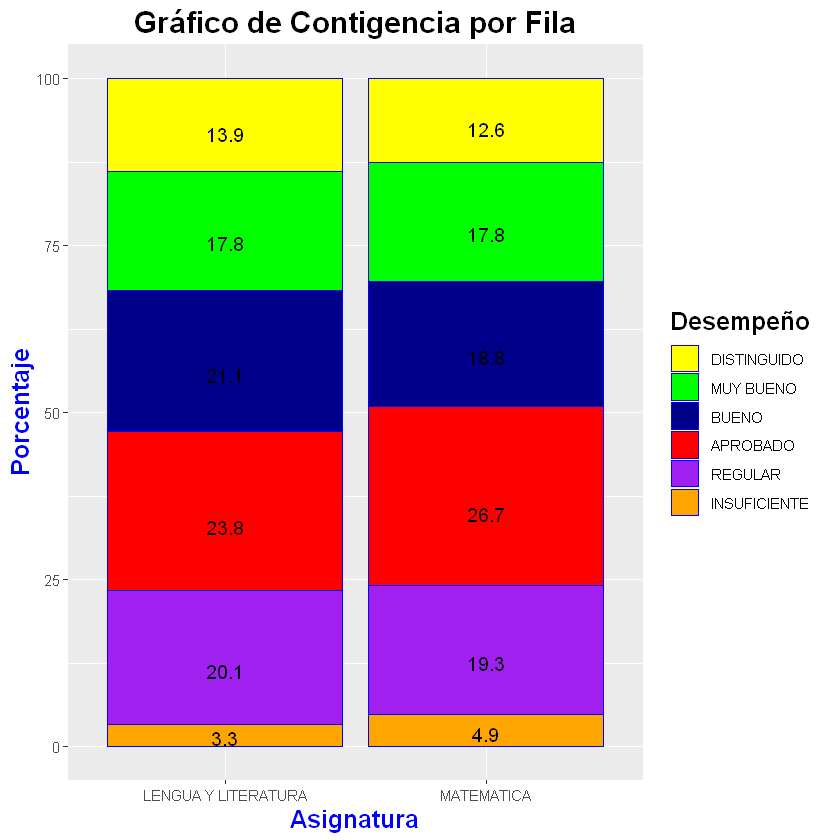

In [215]:
ggplot(data = datos, aes(x = Asignatura, y = Porcentaje, fill = Desempeño)) +
  geom_bar(stat = "identity", colour = "blue") +
  scale_fill_manual(values = c("yellow", "green", "darkblue", "red", "purple", "orange")) +
  geom_text(aes(label = Porcentaje), position = position_stack(vjust = 0.4), size = 4, color = "black") +
  xlab("Asignatura") +
  ylab("Porcentaje") +
  ggtitle("Gráfico de Contigencia por Fila") +
  theme(axis.title = element_text(size = 15, color = "blue", face = "bold")) +
  theme(title = element_text(size = 15, color = "black", face = "bold")) +
  theme(plot.title = element_text(hjust = 0.5))

#### Para la tabla de contingencia por filas podemos ver como se distribuyen los desempeños con respecto a cada materia.

### Gráfico de la tabla de contingencia por columna

In [216]:
tabla_len_mat$Desempeño<-factor(tabla_len_mat$Desempeño,
                                          levels = c('DISTINGUIDO', 'MUY BUENO','BUENO', 'APROBADO', 'REGULAR', 'INSUFICIENTE' )) #prestar atención a que hay que ordenar contrario a barplot

tabla_variables_fila<-round(prop.table( table(tabla_len_mat$asignatura, tabla_len_mat$Desempeño),2)*100,1) 

datos = data.frame(tabla_variables_fila)
colnames(datos) <- c("Asignatura", "Desempeño", "Porcentaje")
datos

Asignatura,Desempeño,Porcentaje
LENGUA Y LITERATURA,DISTINGUIDO,51.5
MATEMATICA,DISTINGUIDO,48.5
LENGUA Y LITERATURA,MUY BUENO,49.0
MATEMATICA,MUY BUENO,51.0
LENGUA Y LITERATURA,BUENO,51.9
MATEMATICA,BUENO,48.1
LENGUA Y LITERATURA,APROBADO,46.1
MATEMATICA,APROBADO,53.9
LENGUA Y LITERATURA,REGULAR,50.0
MATEMATICA,REGULAR,50.0


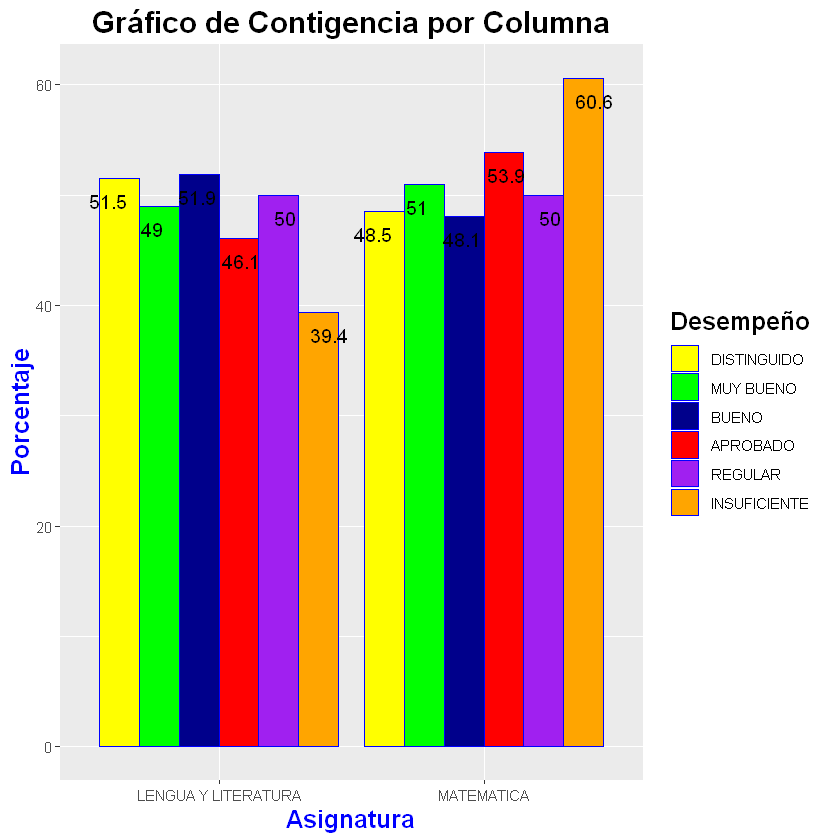

In [217]:
#horizontal coord_flip()
ggplot(data=datos,aes(x=Asignatura,y=Porcentaje,fill=Desempeño))+
  geom_bar(stat="identity",colour="blue",position="dodge")+
  scale_fill_manual(values=c("yellow","green", "darkblue", "red", "purple", "orange"))+
 geom_text(aes(label=Porcentaje),hjust=0.5, vjust=2, position = position_dodge(width = 1),size = 4, color = "Black")+
   xlab("Asignatura")+
  ylab("Porcentaje")+
 ggtitle("Gráfico de Contigencia por Columna") + 
 theme(axis.title = element_text(size = 15, color = "blue", face = "bold"))+
 theme(title = element_text(size = 15, color = "black", face = "bold"))+
  theme(plot.title = element_text(hjust = 0.5)) #centra titulo

#### Para la tabla de continguencia por columnas podemos ver como se distribuyen las materias con respecto al desempeño

### Planteamos como hipótesis nula que el desempeño no está asociado a las asignaturas

### Test Chi-cuadrado

In [218]:
chi_m2 <- chisq.test(tabla_len_mat$asignatura, tabla_len_mat$Desempeño)
chi_m2


	Pearson's Chi-squared test

data:  tabla_len_mat$asignatura and tabla_len_mat$Desempeño
X-squared = 5.9245, df = 5, p-value = 0.3136


#### Podemos notar que el p-value es mayor a 0.31, por lo que no hay evidencia suficiente para rechazar H0. Decimos que el desempeño no está asociado con las asignaturas

In [219]:
chi_m2$observed

                        tabla_len_mat$Desempeño
tabla_len_mat$asignatura DISTINGUIDO MUY BUENO BUENO APROBADO REGULAR
     LENGUA Y LITERATURA         118       151   179      202     171
     MATEMATICA                  111       157   166      236     171
                        tabla_len_mat$Desempeño
tabla_len_mat$asignatura INSUFICIENTE
     LENGUA Y LITERATURA           28
     MATEMATICA                    43

In [220]:
round(chi_m2$expected,0)

,DISTINGUIDO,MUY BUENO,BUENO,APROBADO,REGULAR,INSUFICIENTE
LENGUA Y LITERATURA,112,151,169,215,168,35
MATEMATICA,117,157,176,223,174,36


#### El p-value obtenido anteriormente en el test se condice justamente con los valores esperados, no notamos una diferencia muy significante entre lo observado y lo esperado.

In [221]:
round(chi_m2$residuals, 1)

                        tabla_len_mat$Desempeño
tabla_len_mat$asignatura DISTINGUIDO MUY BUENO BUENO APROBADO REGULAR
     LENGUA Y LITERATURA         0.5       0.0   0.8     -0.9     0.3
     MATEMATICA                 -0.5       0.0  -0.8      0.8    -0.3
                        tabla_len_mat$Desempeño
tabla_len_mat$asignatura INSUFICIENTE
     LENGUA Y LITERATURA         -1.2
     MATEMATICA                   1.1

In [222]:
round(chi_m2$stdres,1)

                        tabla_len_mat$Desempeño
tabla_len_mat$asignatura DISTINGUIDO MUY BUENO BUENO APROBADO REGULAR
     LENGUA Y LITERATURA         0.8       0.0   1.2     -1.4     0.4
     MATEMATICA                 -0.8       0.0  -1.2      1.4    -0.4
                        tabla_len_mat$Desempeño
tabla_len_mat$asignatura INSUFICIENTE
     LENGUA Y LITERATURA         -1.6
     MATEMATICA                   1.6

#### Todos los valores de la tabla de residuales corregidos están entre -1.96 y 1.96, por lo que decimos que son independientes

### Ejercicio 3

### Aprobar Matemática de primer año depende de la escuela donde uno asista

In [223]:
dataset_prueba_4 <- filter(dataset_nova_3,asignatura == "MATEMATICA"  & Modalidad  == "Secundaria"  & AñoCursado == 1)
ftable(dataset_prueba_4$EsPrivada,dataset_prueba_4$CondicionFinal)

       APROBADO DESAPROBADO
                           
FALSE       539         216
TRUE        110          19

In [224]:
tabla_mat_con <- dataset_prueba_4 %>% 
    dplyr::select(EsPrivada,CondicionFinal)
    
head(tabla_mat_con,5)

Adding missing grouping variables: `Documento`


Documento,EsPrivada,CondicionFinal
34680594,FALSE,DESAPROBADO
46082290,FALSE,APROBADO
46520307,FALSE,DESAPROBADO
46520314,FALSE,DESAPROBADO
46778660,FALSE,DESAPROBADO


### Tabla de contingencia total, de filas y columnas

In [225]:
CrossTable(dataset_prueba_4$EsPrivada, dataset_prueba_4$CondicionFinal, digits=1,prop.chisq = FALSE,format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|-------------------------|

Total Observations in Table:  884 

                           | dataset_prueba_4$CondicionFinal 
dataset_prueba_4$EsPrivada |    APROBADO  | DESAPROBADO  |   Row Total | 
---------------------------|-------------|-------------|-------------|
                     FALSE |        539  |        216  |        755  | 
                           |       71.4% |       28.6% |       85.4% | 
                           |       83.1% |       91.9% |             | 
                           |       61.0% |       24.4% |             | 
---------------------------|-------------|-------------|-------------|
                      TRUE |        110  |         19  |        129  | 
                           |       85.3% |       14.7% |       14.6% | 
                           |       16.9% |        8.1% |           

### Gráfico de la tabla de contingencia por fila

In [226]:
tabla_mat_con$CondicionFinal <- factor(tabla_mat_con$CondicionFinal,
                                          levels = c('APROBADO', 'DESAPROBADO' )) #prestar atención a que hay que ordenar contrario a barplot

tabla_variables_fila<-round(prop.table( table(tabla_mat_con$EsPrivada, tabla_mat_con$CondicionFinal),1)*100,1) 

datos = data.frame(tabla_variables_fila)
colnames(datos) <- c("EsPrivada", "CondicionFinal", "Porcentaje")
datos

EsPrivada,CondicionFinal,Porcentaje
FALSE,APROBADO,71.4
TRUE,APROBADO,85.3
FALSE,DESAPROBADO,28.6
TRUE,DESAPROBADO,14.7


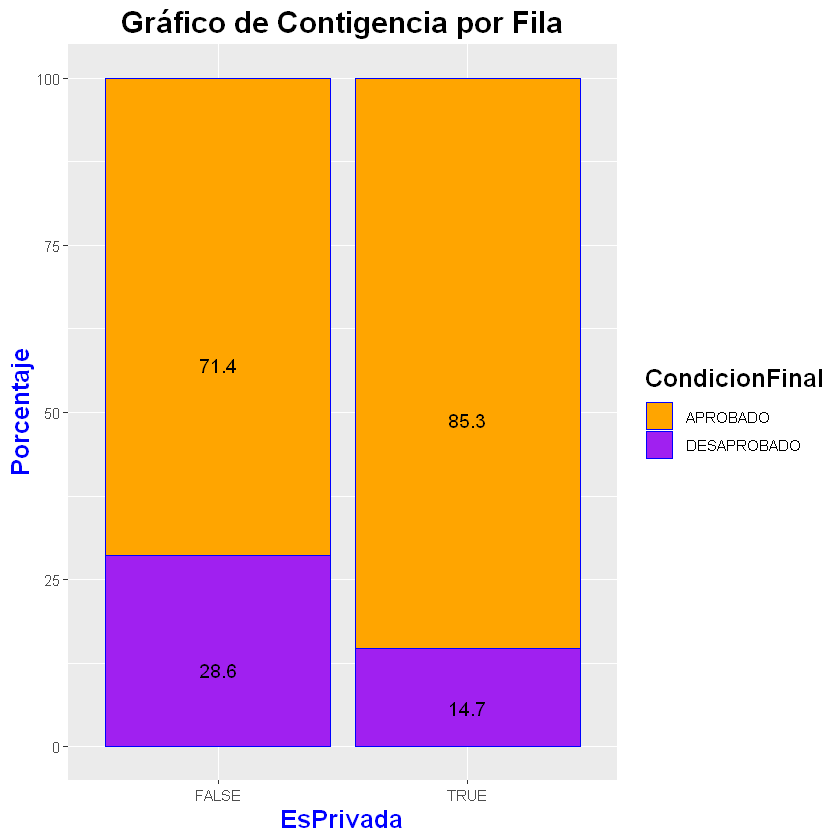

In [227]:
ggplot(data = datos, aes(x = EsPrivada, y = Porcentaje, fill = CondicionFinal)) +
  geom_bar(stat = "identity", colour = "blue") +
  scale_fill_manual(values = c("orange", "purple")) +
  geom_text(aes(label = Porcentaje), position = position_stack(vjust = 0.4), size = 4, color = "black") +
  xlab("EsPrivada") +
  ylab("Porcentaje") +
  ggtitle("Gráfico de Contigencia por Fila") +
  theme(axis.title = element_text(size = 15, color = "blue", face = "bold")) +
  theme(title = element_text(size = 15, color = "black", face = "bold")) +
  theme(plot.title = element_text(hjust = 0.5))

### Para la tabla de contingencia por filas podemos ver como se distribuyen las condiciones finales con respecto a si la escuela es privada o no. 

### Gráfico de la tabla de contingencia por columna

In [228]:
tabla_variables_fila<-round(prop.table( table(tabla_mat_con$EsPrivada, tabla_mat_con$CondicionFinal),2)*100,1) 

datos = data.frame(tabla_variables_fila)
colnames(datos) <- c("EsPrivada", "CondicionFinal", "Porcentaje")
datos

EsPrivada,CondicionFinal,Porcentaje
FALSE,APROBADO,83.1
TRUE,APROBADO,16.9
FALSE,DESAPROBADO,91.9
TRUE,DESAPROBADO,8.1


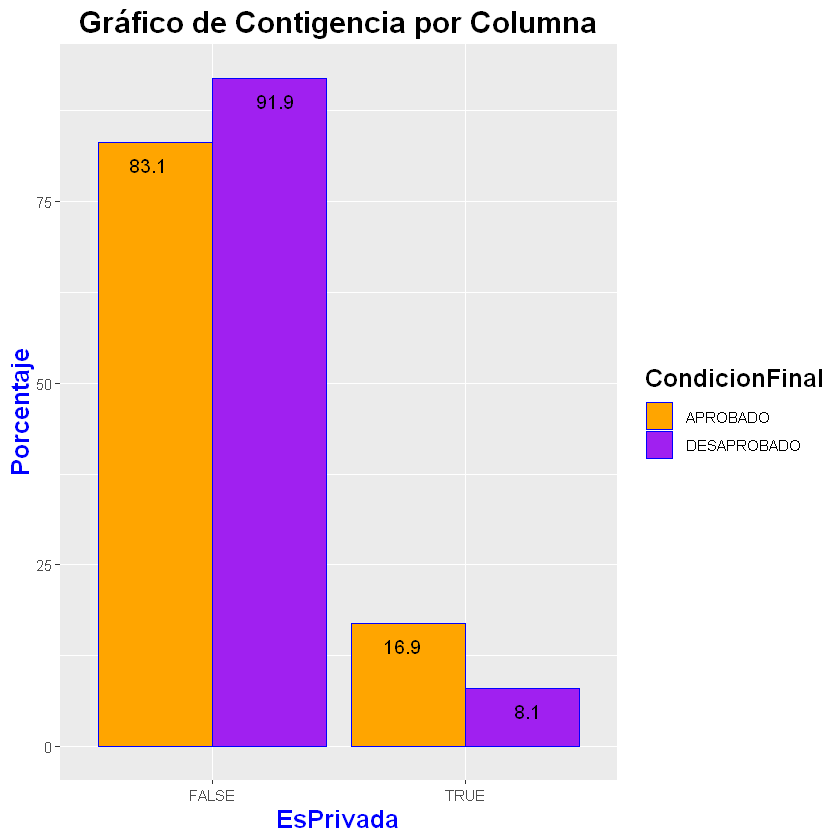

In [229]:
#horizontal coord_flip()
ggplot(data=datos,aes(x=EsPrivada,y=Porcentaje,fill=CondicionFinal))+
  geom_bar(stat="identity",colour="blue",position="dodge")+
  scale_fill_manual(values=c("orange", "purple"))+
 geom_text(aes(label=Porcentaje),hjust=0.5, vjust=2, position = position_dodge(width = 1),size = 4, color = "Black")+
   xlab("EsPrivada")+
  ylab("Porcentaje")+
 ggtitle("Gráfico de Contigencia por Columna") + 
 theme(axis.title = element_text(size = 15, color = "blue", face = "bold"))+
 theme(title = element_text(size = 15, color = "black", face = "bold"))+
  theme(plot.title = element_text(hjust = 0.5)) #centra titulo

### Para la tabla de contingencia por columnas podemos ver como se distribuye el sector con respecto a la condición final.

### Planteamos como hipótesis nula que la condición final para la asignatura de Matemática de primer año no está asociado a si el alumno va a una escuela privada o no.

### Test Chi-cuadrado

In [230]:
chi_m3 <- chisq.test(tabla_mat_con$EsPrivada, tabla_mat_con$CondicionFinal)
chi_m3


	Pearson's Chi-squared test with Yates' continuity correction

data:  tabla_mat_con$EsPrivada and tabla_mat_con$CondicionFinal
X-squared = 10.177, df = 1, p-value = 0.001422


#### Observamos un p-value menor a 0.05, por lo que rechazamos la hipótesis nula.

In [231]:
chi_m3$observed

                       tabla_mat_con$CondicionFinal
tabla_mat_con$EsPrivada APROBADO DESAPROBADO
                  FALSE      539         216
                  TRUE       110          19

In [232]:
round(chi_m3$expected,0)

,APROBADO,DESAPROBADO
FALSE,554,201
TRUE,95,34


#### Se esperan menos aprobados que los observados para las escuelas privadas, a su vez que más desaprobados en las escuelas públicas.

In [233]:
round(chi_m3$residuals, 1)

                       tabla_mat_con$CondicionFinal
tabla_mat_con$EsPrivada APROBADO DESAPROBADO
                  FALSE     -0.6         1.1
                  TRUE       1.6        -2.6

In [234]:
round(chi_m3$stdres,1)

                       tabla_mat_con$CondicionFinal
tabla_mat_con$EsPrivada APROBADO DESAPROBADO
                  FALSE     -3.3         3.3
                  TRUE       3.3        -3.3

In [235]:
CramerV(tabla_mat_con$EsPrivada, tabla_mat_con$CondicionFinal)

[1] 0.1109226

In [236]:
ContCoef(tabla_mat_con$EsPrivada, tabla_mat_con$CondicionFinal, correct = TRUE)

[1] 0.155912

#### Notamos una asociación muy leve haciendo el test de Cramer.

### Test de proporciones

In [237]:
tabla_mat_totales <- dataset_prueba_4 %>% ungroup() %>% dplyr::select(CondicionFinal, EsPrivada) %>% table()

tabla_mat_tot <- cbind(tabla_mat_totales, "Total" = margin.table(tabla_mat_totales, 1))
tabla_mat_tot <- rbind(tabla_mat_tot, "Total" = margin.table(tabla_mat_tot, 2))
tabla_mat_tot


,FALSE,TRUE,Total
APROBADO,539,110,649
DESAPROBADO,216,19,235
Total,755,129,884


In [238]:
prop.test(x=c(539, 110), n=c(755, 129), p=NULL, alternative="two.sided", conf.level = 0.95, correct=FALSE)


	2-sample test for equality of proportions without continuity
	correction

data:  c(539, 110) out of c(755, 129)
X-squared = 10.877, df = 1, p-value = 0.0009739
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.20793774 -0.06967405
sample estimates:
   prop 1    prop 2 
0.7139073 0.8527132 


In [239]:
razones_condicionales <- round(tabla_mat_tot[1,] / tabla_mat_tot[2,], 1)
razones_condicionales

tabla_mat_tot <- rbind(tabla_mat_tot, razones_condicionales)
tabla_mat_tot

FALSE  TRUE Total 
  2.5   5.8   2.8

,FALSE,TRUE,Total
APROBADO,539.0,110.0,649.0
DESAPROBADO,216.0,19.0,235.0
Total,755.0,129.0,884.0
razones_condicionales,2.5,5.8,2.8


#### Para cada 2 aprobados en escuela pública, tenemos un desaprobado.
#### Para cada 5 aprobados en escuela privada, tenemos un desaprobado.

## Planteamos la siguiente hipotesis:
### Hay asociación en la variable mejoraT entre las escuelas secundaria publicas y privadas en la asignatura lengua y literatura para todos los años.

In [240]:
dataset_prueba_5 <- filter(dataset_nova_3,asignatura == "LENGUA Y LITERATURA"  & Modalidad  == "Secundaria"  )
ftable(dataset_prueba_5$EsPrivada,dataset_prueba_5$MejoriaT)

       EMPEORO IGUAL MEJORO
                           
FALSE     1408   993   1118
TRUE       107   185    232

In [241]:
tabla_mejora <- dataset_prueba_5 %>% 
    dplyr::select(EsPrivada,MejoriaT)
    
head(tabla_mejora,5)

Adding missing grouping variables: `Documento`


Documento,EsPrivada,MejoriaT
28360274,FALSE,MEJORO
34680594,FALSE,IGUAL
35298264,FALSE,MEJORO
37307968,FALSE,EMPEORO
37420608,FALSE,MEJORO


## Tabla de contingencia total, de filas y columnas

In [242]:
CrossTable(dataset_prueba_5$EsPrivada, dataset_prueba_5$MejoriaT, digits=1,prop.chisq = FALSE,format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|-------------------------|

Total Observations in Table:  4043 

                           | dataset_prueba_5$MejoriaT 
dataset_prueba_5$EsPrivada |  EMPEORO  |    IGUAL  |   MEJORO  | Row Total | 
---------------------------|-----------|-----------|-----------|-----------|
                     FALSE |     1408  |      993  |     1118  |     3519  | 
                           |     40.0% |     28.2% |     31.8% |     87.0% | 
                           |     92.9% |     84.3% |     82.8% |           | 
                           |     34.8% |     24.6% |     27.7% |           | 
---------------------------|-----------|-----------|-----------|-----------|
                      TRUE |      107  |      185  |      232  |      524  | 
                           |     20.4% |     35.3% |     44.3% |     13.0% | 
                    

### Gráfico de la tabla de contingencia por fila

In [243]:
tabla_mejora$MejoriaT <- factor(tabla_mejora$MejoriaT,
                                          levels = c('EMPEORO', 'IGUAL','MEJORO' )) #prestar atención a que hay que ordenar contrario a barplot

tabla_variables_fila<-round(prop.table( table(tabla_mejora$EsPrivada, tabla_mejora$MejoriaT),1)*100,1) 

datos = data.frame(tabla_variables_fila)
colnames(datos) <- c("EsPrivada", "MejoriaT", "Porcentaje")
datos

EsPrivada,MejoriaT,Porcentaje
FALSE,EMPEORO,40.0
TRUE,EMPEORO,20.4
FALSE,IGUAL,28.2
TRUE,IGUAL,35.3
FALSE,MEJORO,31.8
TRUE,MEJORO,44.3


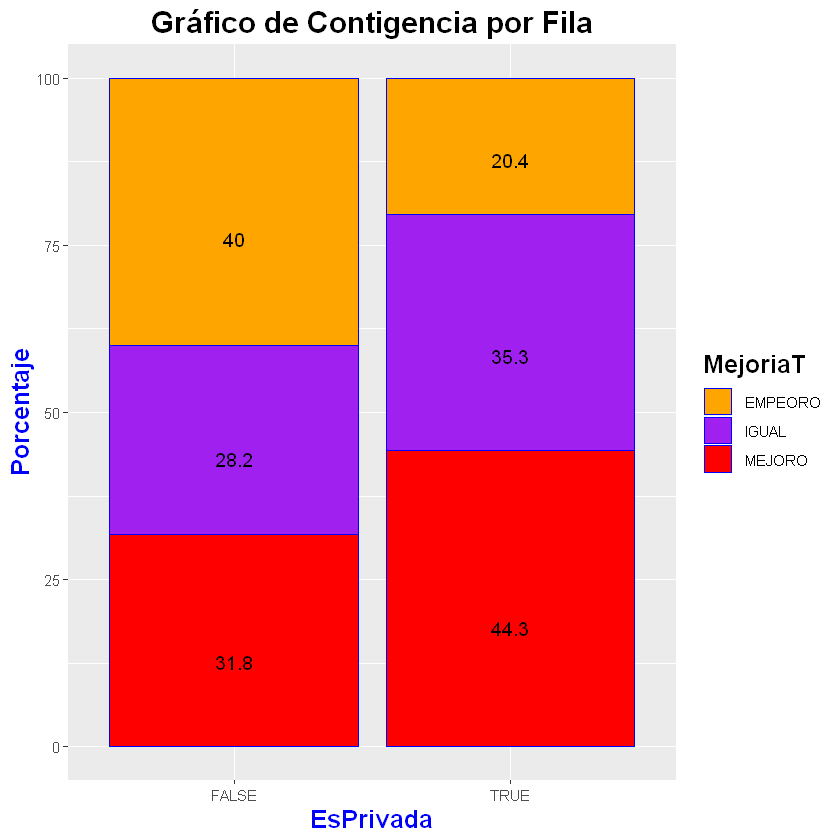

In [244]:
ggplot(data = datos, aes(x = EsPrivada, y = Porcentaje, fill = MejoriaT)) +
  geom_bar(stat = "identity", colour = "blue") +
  scale_fill_manual(values = c("orange", "purple","red")) +
  geom_text(aes(label = Porcentaje), position = position_stack(vjust = 0.4), size = 4, color = "black") +
  xlab("EsPrivada") +
  ylab("Porcentaje") +
  ggtitle("Gráfico de Contigencia por Fila") +
  theme(axis.title = element_text(size = 15, color = "blue", face = "bold")) +
  theme(title = element_text(size = 15, color = "black", face = "bold")) +
  theme(plot.title = element_text(hjust = 0.5))

### Gráfico de la tabla de contingencia por columna

In [245]:
tabla_mejora$MejoriaT <- factor(tabla_mejora$MejoriaT,
                                          levels = c('EMPEORO', 'IGUAL','MEJORO' )) #prestar atención a que hay que ordenar contrario a barplot

tabla_variables_fila<-round(prop.table( table(tabla_mejora$EsPrivada, tabla_mejora$MejoriaT),2)*100,1) 

datos = data.frame(tabla_variables_fila)
colnames(datos) <- c("EsPrivada", "MejoriaT", "Porcentaje")
datos

EsPrivada,MejoriaT,Porcentaje
FALSE,EMPEORO,92.9
TRUE,EMPEORO,7.1
FALSE,IGUAL,84.3
TRUE,IGUAL,15.7
FALSE,MEJORO,82.8
TRUE,MEJORO,17.2


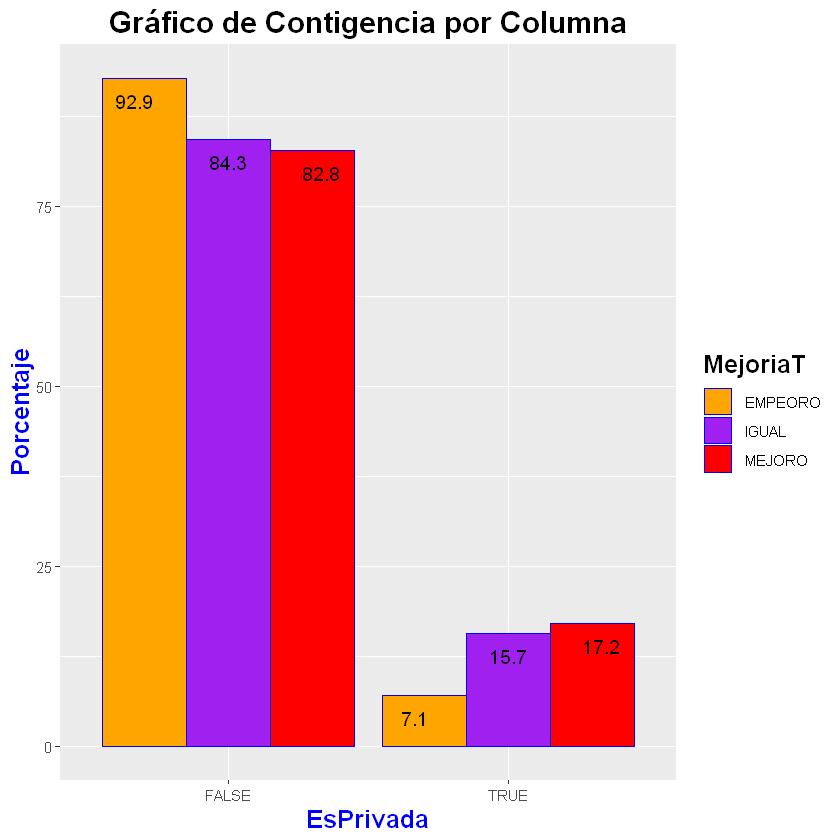

In [246]:
#horizontal coord_flip()
ggplot(data=datos,aes(x=EsPrivada,y=Porcentaje,fill=MejoriaT))+
  geom_bar(stat="identity",colour="blue",position="dodge")+
  scale_fill_manual(values=c("orange", "purple","red"))+
 geom_text(aes(label=Porcentaje),hjust=0.5, vjust=2, position = position_dodge(width = 1),size = 4, color = "Black")+
   xlab("EsPrivada")+
  ylab("Porcentaje")+
 ggtitle("Gráfico de Contigencia por Columna") + 
 theme(axis.title = element_text(size = 15, color = "blue", face = "bold"))+
 theme(title = element_text(size = 15, color = "black", face = "bold"))+
  theme(plot.title = element_text(hjust = 0.5)) #centra titulo

### Test Chi-cuadrado

In [247]:
chi_m5 <- chisq.test(tabla_mejora$EsPrivada, tabla_mejora$MejoriaT)
chi_m5


	Pearson's Chi-squared test

data:  tabla_mejora$EsPrivada and tabla_mejora$MejoriaT
X-squared = 75.936, df = 2, p-value < 2.2e-16


In [248]:
chi_m5$observed

                      tabla_mejora$MejoriaT
tabla_mejora$EsPrivada EMPEORO IGUAL MEJORO
                 FALSE    1408   993   1118
                 TRUE      107   185    232

In [249]:
round(chi_m5$expected,0)

,EMPEORO,IGUAL,MEJORO
FALSE,1319,1025,1175
TRUE,196,153,175


In [250]:
round(chi_m5$residuals, 1)

                      tabla_mejora$MejoriaT
tabla_mejora$EsPrivada EMPEORO IGUAL MEJORO
                 FALSE     2.5  -1.0   -1.7
                 TRUE     -6.4   2.6    4.3

In [251]:
round(chi_m5$stdres,1)

                      tabla_mejora$MejoriaT
tabla_mejora$EsPrivada EMPEORO IGUAL MEJORO
                 FALSE     8.6  -3.3   -5.7
                 TRUE     -8.6   3.3    5.7

In [252]:
CramerV(tabla_mejora$EsPrivada, tabla_mejora$MejoriaT)

[1] 0.137048

In [253]:
ContCoef(tabla_mejora$EsPrivada, tabla_mejora$MejoriaT, correct = TRUE)

[1] 0.1920203

# Guia 8

## 1) Realice un Box Plot comparativo que muestre las notas de matemática de los diferentes años de secundaria, diferenciados por sector. En caso de observar diferencias, realice un contraste que permita medir si las diferencias son significativas.

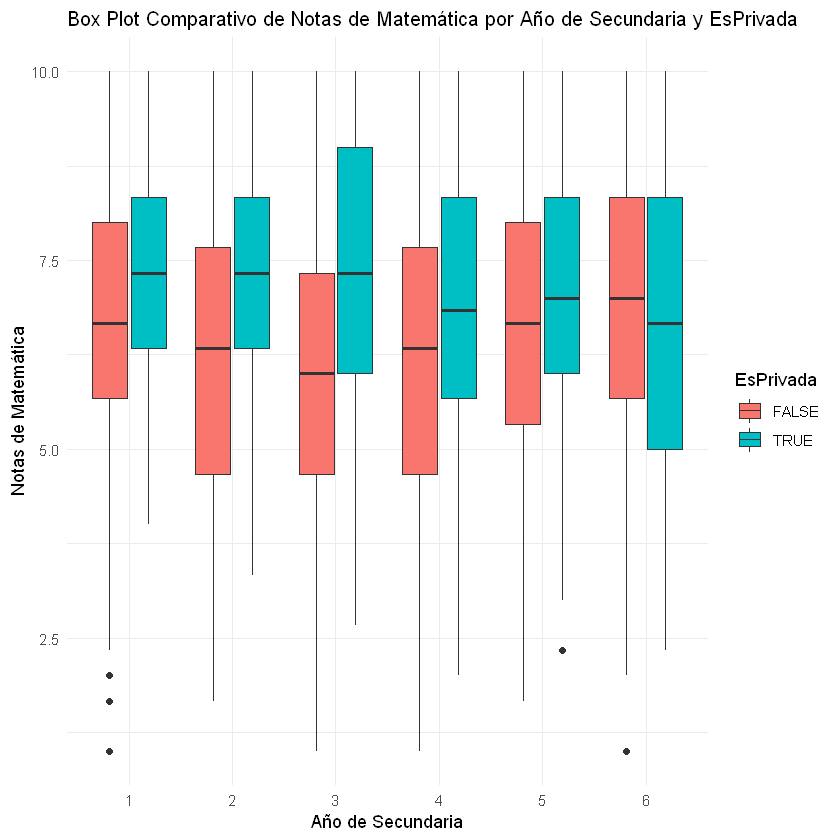

In [254]:
# Filtrar el dataset
bp_mat_secu <- filter(dataset_mas_limpio, asignatura == 'MATEMATICA' & Modalidad == 'Secundaria' & AñoCursado %in% c(1,2,3,4,5,6))

# Realizar el Box Plot comparativo
ggplot(bp_mat_secu, aes(x = factor(AñoCursado), y = Promedio, fill = EsPrivada)) +
  geom_boxplot() +
  xlab("Año de Secundaria") +
  ylab("Notas de Matemática") +
  ggtitle("Box Plot Comparativo de Notas de Matemática por Año de Secundaria y EsPrivada") +
  theme_minimal() + theme(plot.title = element_text(size = 12))

#### Observamos diferencias por lo que vamos arealizar un contraste

In [261]:
d <- filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad == "Secundaria")
for ( x in 1:6){
    m <- filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad == "Secundaria" & AñoCursado == x)
    print(paste0("Año: ",x))
    print(ftable(m$EsPrivada))
}

[1] "Año: 1"
 FALSE TRUE
           
   755  129
[1] "Año: 2"
 FALSE TRUE
           
   715  122
[1] "Año: 3"
 FALSE TRUE
           
   799  129
[1] "Año: 4"
 FALSE TRUE
           
  1262  148
[1] "Año: 5"
 FALSE TRUE
           
  1396  110
[1] "Año: 6"
 FALSE TRUE
           
  1316  117


In [258]:
# Tabla exploratoria para ver los tabla final a utilizar.
tabla_exp <- bp_mat_secu %>% group_by(asignatura) %>% summarise(mean = round(mean(promedios), 1),
                                                                median=round(median(promedios),1), datos = n())
print(tabla)

# A tibble: 3 x 4
  turnos    mean median datos
  <fct>    <dbl>  <dbl> <int>
1 COMPLETO   7.7    7.7    25
2 MAÑANA     7.9    8     411
3 TARDE      8.3    8.3   289


In [257]:
lillie.test(bp_mat_secu$Promedio)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  bp_mat_secu$Promedio
D = 0.060789, p-value < 2.2e-16


#### Como el p valor es menor a 0,05 no es normal. Tendremos que utilizar kruskal

In [259]:
kruskal.test(bp_mat_secu$promedios, bp_mat_secu$asignatura)

ERROR: Error in kruskal.test.default(bp_mat_secu$promedios, bp_mat_secu$asignatura): 'x' and 'g' must have the same length


### 2) Realice un gráfico de coordenadas paralelas que muestre las notas obtenidas por los estudiantes del turno mañana en las materias troncales de primer año de Secundaria. Luego conteste a) Existe algún patrón b) En el gráfico hay casos atípicos que se distancien del resto. c) Si se realiza un análisis de outliers, hay valores atípicos.

In [262]:
library(GGally)

dataset_filtrado_troncales <- dataset_mas_limpio %>%
  dplyr::filter(turno == "MAÑANA" & AñoCursado == 1 & Modalidad == 'Secundaria')


ftable(dataset_filtrado_troncales$asignatura)

a<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="BIOLOGIA"),EsPrivada,turno,CUE,Documento,Promedio)
b<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="GEOGRAFIA"),Documento,Promedio)
c<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="HISTORIA"),Documento,Promedio)
d<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="INGLÉS"),Documento,Promedio)
e<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="LENGUA Y LITERATURA"),Documento,Promedio)
f<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="MATEMATICA"),Documento,Promedio)
g<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="FISICA Y QUIMICA"),Documento,Promedio)
h<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="EDUCACION FISICA"),Documento,Promedio)
df_list <- list(a, b, c, d, e, f, g, h)
P_Notas_estudiantes_mañana<-base::Reduce(function(x, y) base::merge(x, y, by=c("Documento"), all.x = TRUE), df_list)
colnames(P_Notas_estudiantes_mañana)<-c("Documento","EsPrivada","turno","CUE","BIOLOGIA","GEOGRAFIA","HISTORIA","INGLÉS",
                                 "LENGUA Y LITERATURA","MATEMATICA","FISICA Y QUIMICA", "EDUCACION FISICA") 

P_Notas_estudiantes_mañana$Documento <- as.factor(P_Notas_estudiantes_mañana$Documento)
P_Notas_estudiantes_mañana$CUE <- as.factor(P_Notas_estudiantes_mañana$CUE)

GGally::ggparcoord(data = P_Notas_estudiantes_mañana,
           columns = 5:12,
           groupColumn = "Documento",
           showPoints = TRUE,
           alphaLines = 0.8, #TRANSPERENCIA LINEAS
           boxplot = FALSE, #DIBUJA BOXPLOT POR VARIABLE
           title = "Gráfico de coordenadas paralelas de las materias troncales para el turno mañana de Secundaria"
) + theme(legend.position = "none")

### Cada color representa un alumno, se le quitó la leyenda para una mejor lectura del gráfico.

### Podemos ver que en la asignatura "Fisica y Quimica" se presenta una cantidad considerable
### de valores bajos. No se percibe una fuerte presencia de outliers.

### turno tarde
dataset_filtrado_troncales <- dataset_mas_limpio %>%
  dplyr::filter(turno == "TARDE" & AñoCursado == 1 & Modalidad == 'Secundaria')

ftable(dataset_filtrado_troncales$asignatura)

a<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="BIOLOGIA"),EsPrivada,turno,CUE,Documento,Promedio)
b<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="GEOGRAFIA"),Documento,Promedio)
c<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="HISTORIA"),Documento,Promedio)
d<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="INGLÉS"),Documento,Promedio)
e<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="LENGUA Y LITERATURA"),Documento,Promedio)
f<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="MATEMATICA"),Documento,Promedio)
g<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="FISICA Y QUIMICA"),Documento,Promedio)
h<-dplyr::select(dplyr::filter(dataset_filtrado_troncales,asignatura=="EDUCACION FISICA"),Documento,Promedio)
df_list <- list(a, b, c, d, e, f, g, h)
P_Notas_estudiantes_tarde<-base::Reduce(function(x, y) base::merge(x, y, by=c("Documento"), all.x = TRUE), df_list)
colnames(P_Notas_estudiantes_tarde)<-c("Documento","EsPrivada","turno","CUE","BIOLOGIA","GEOGRAFIA","HISTORIA","INGLÉS",
                                        "LENGUA Y LITERATURA","MATEMATICA","FISICA Y QUIMICA", "EDUCACION FISICA") 

P_Notas_estudiantes_tarde$Documento <- as.factor(P_Notas_estudiantes_tarde$Documento)
P_Notas_estudiantes_tarde$CUE <- as.factor(P_Notas_estudiantes_tarde$CUE)

GGally::ggparcoord(data = P_Notas_estudiantes_tarde,
                   columns = 5:12,
                   groupColumn = "Documento",
                   showPoints = TRUE,
                   alphaLines = 0.8, #TRANSPERENCIA LINEAS
                   boxplot = FALSE, #DIBUJA BOXPLOT POR VARIABLE
                   title = "Gráfico de coordenadas paralelas de las materias troncales para el turno tarde de Secundaria"
) + theme(legend.position = "none")

#### En este gráfico podemos ver que las notas de inglés son las que menos outliers presentan.
#### Notamos una presencia de outliers en Historia, tanto positivos como negativos, así como también
#### en Biología. En Educación Física podemos ver outliers negativos.

ERROR: Error: package 'ggplot2' 3.1.1 is loaded, but >= 3.3.0 is required by 'GGally'
